# Advance Multiple Linear Regression
## Surprise Housing Case Study
### Problem Statement:
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

The company wants to know:

1) Which variables are significant in predicting the price of a house, and

2) How well those variables describe the price of a house.

3) Determine the optimal value of lambda for ridge and lasso regression

## Housing Price Prediction using Ridge and Lasso Regression

### The solution is divided into the following sections: 
- Data understanding
- Data exploring and cleaning
- Data preparation
- Model building and evaluation

## Step 1: Reading and Understanding the Data
Let us first import NumPy and Pandas and read the Housing dataset

In [3]:
# For analysis and numerical functions
import pandas as pd
import numpy as np

# For Vizualization
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

 # Supress Warnings
import warnings
warnings.filterwarnings(action='ignore')

In [4]:
# Read data to datframe
df_price_full=pd.read_csv("train.csv")
# Check the head of the dataset
df_price_full.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Inspect the various aspects of the dataframe

In [5]:
df_price_full.shape

(1460, 81)

In [6]:
df_price_full.info()


columns_info = pd.DataFrame({
    'Column Name': df_price_full.columns,
    'Data Type': df_price_full.dtypes
})

# Save the information to a CSV file
columns_info.to_csv('column_info.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
df_price_full.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


##  2) Data exploring and clensing

#### Duplicate rows check

In [62]:
duplicate_rows_price = df_price_full[df_price_full.duplicated()]
print("number of duplicate rows: ", duplicate_rows_price.shape)

number of duplicate rows:  (0, 81)


No duplicate rows

#### Handling missing values

In [8]:
print(df_price_full.isnull().sum())
temp = pd.DataFrame(df_price_full.isnull().sum())
#temp.to_csv("missingvaluee.csv")

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


Drooping columns which are mostly null

In [9]:
df_price = df_price_full.drop(['Alley', 'PoolQC',
'Fence',
'MiscFeature'                           
], axis=1)

constant_value = -1
df_price.fillna(constant_value, inplace=True)
missing_values = df_price.isna().sum()
print(missing_values)
#df_price.to_csv("missingvaluee_check.csv")
df_price.info()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 77, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 

In [10]:
## Dividing dataset into numerical and categorical columns for EDA

num_cols=["Id",
"LotFrontage",
"LotArea",
"MasVnrArea",
"BsmtFinSF1",
"BsmtFinSF2",
"BsmtUnfSF",
"TotalBsmtSF",
"1stFlrSF",
"2ndFlrSF",
"LowQualFinSF",
"GrLivArea",
"GarageArea",
"WoodDeckSF",
"OpenPorchSF",
"EnclosedPorch",
"3SsnPorch",
"ScreenPorch",
"PoolArea",
"SalePrice"          
]
cat_cols=["MSSubClass",
"MSZoning",
"Street",
"LotShape",
"LandContour",
"Utilities",
"LotConfig",
"LandSlope",
"Neighborhood",
"Condition1",
"Condition2",
"BldgType",
"HouseStyle",
"OverallQual",
"OverallCond",
"YearBuilt",
"YearRemodAdd",
"RoofStyle",
"RoofMatl",
"Exterior1st",
"Exterior2nd",
"MasVnrType",
"ExterQual",
"ExterCond",
"Foundation",
"BsmtQual",
"BsmtCond",
"BsmtExposure",
"BsmtFinType1",
"BsmtFinType2",
"Heating",
"HeatingQC",
"CentralAir",
"Electrical",
"BsmtFullBath",
"BsmtHalfBath",
"FullBath",
"HalfBath",
"BedroomAbvGr",
"KitchenAbvGr",
"KitchenQual",
"TotRmsAbvGrd",
"Functional",
"Fireplaces",
"FireplaceQu",
"GarageType",
"GarageFinish",
"GarageYrBlt",
"GarageCars",
"GarageQual",
"GarageCond",
"PavedDrive",
"MoSold",
"YrSold",
"SaleType",
"SaleCondition"
]

Plotting count plot to see counts of unique categorical values 

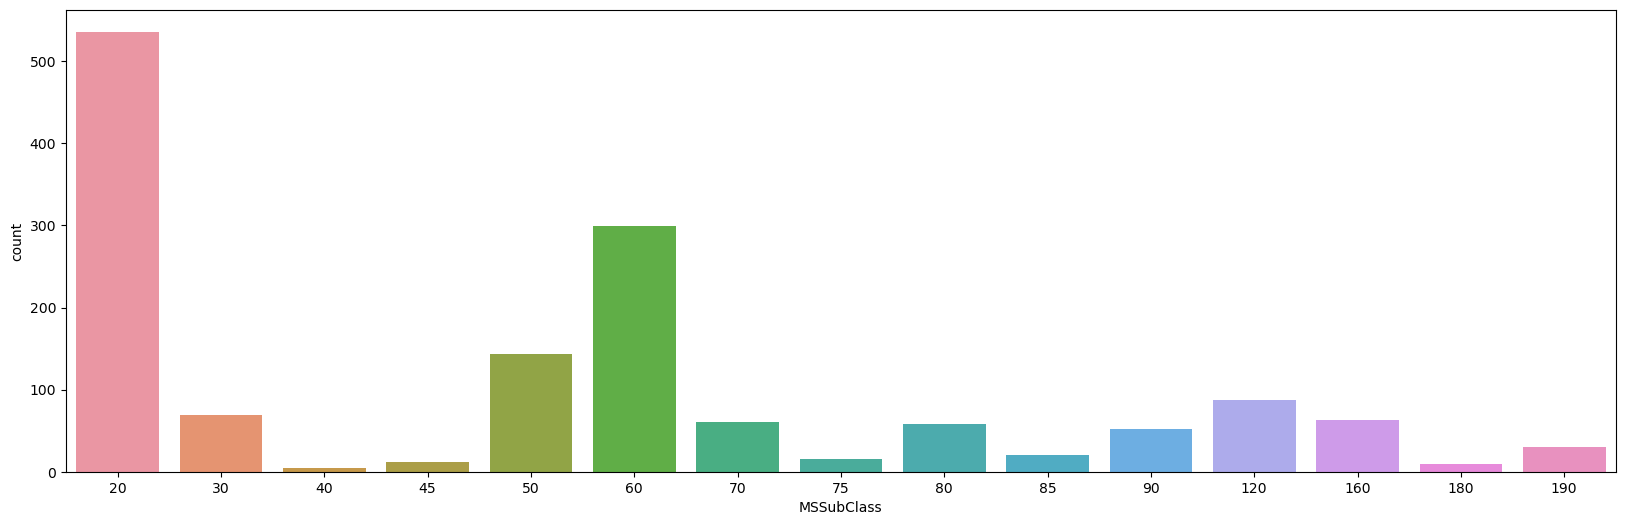

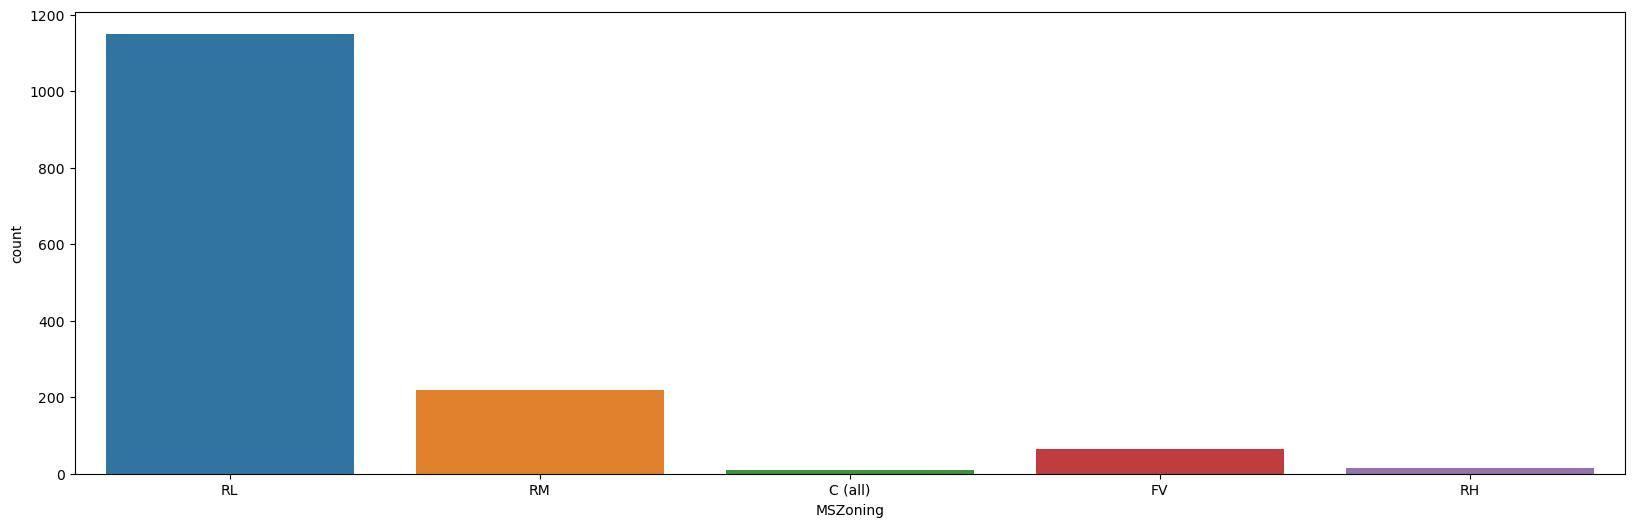

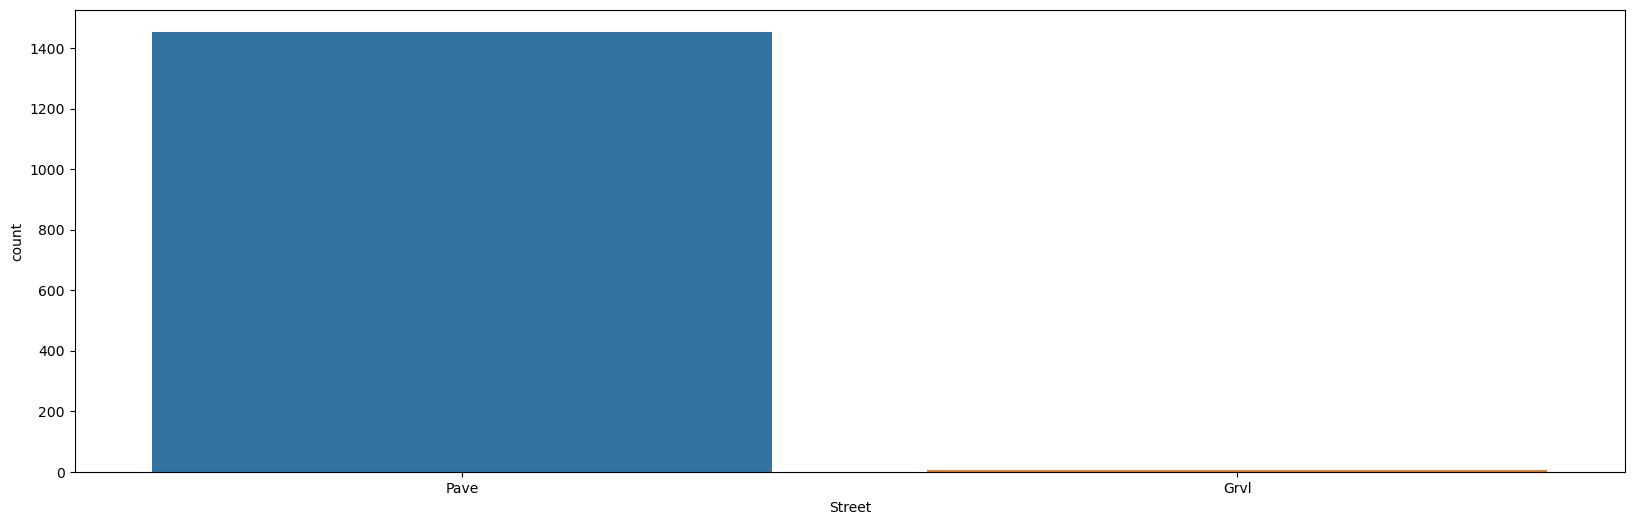

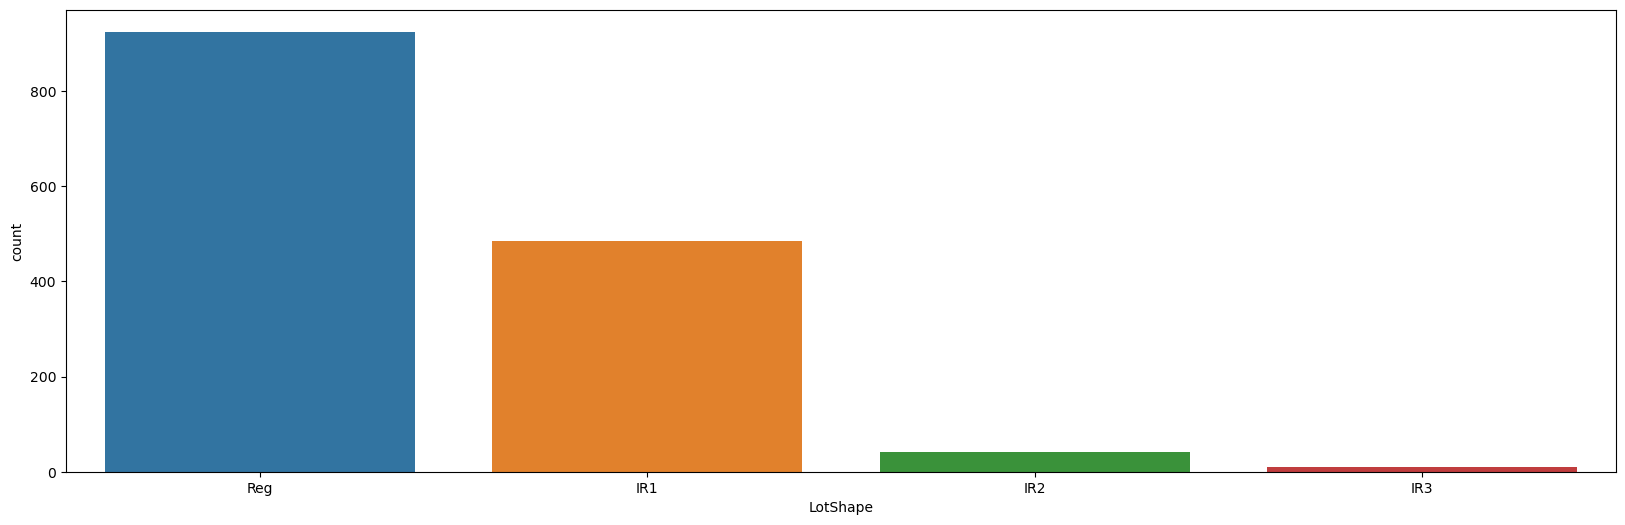

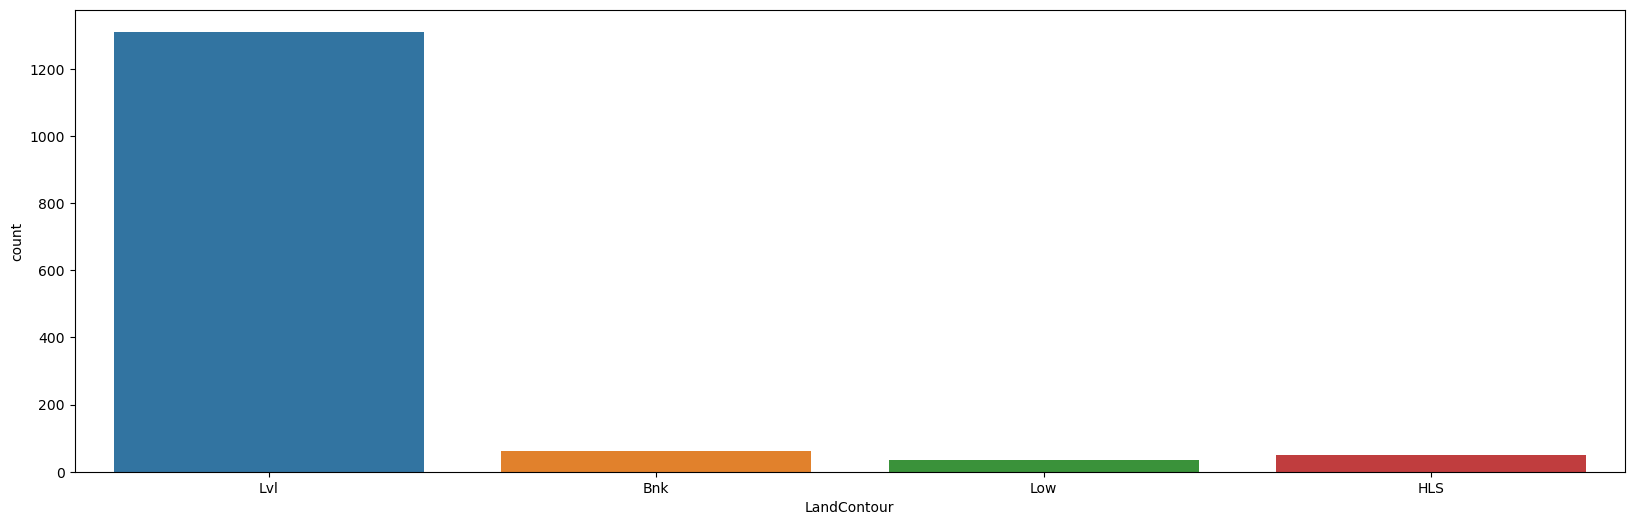

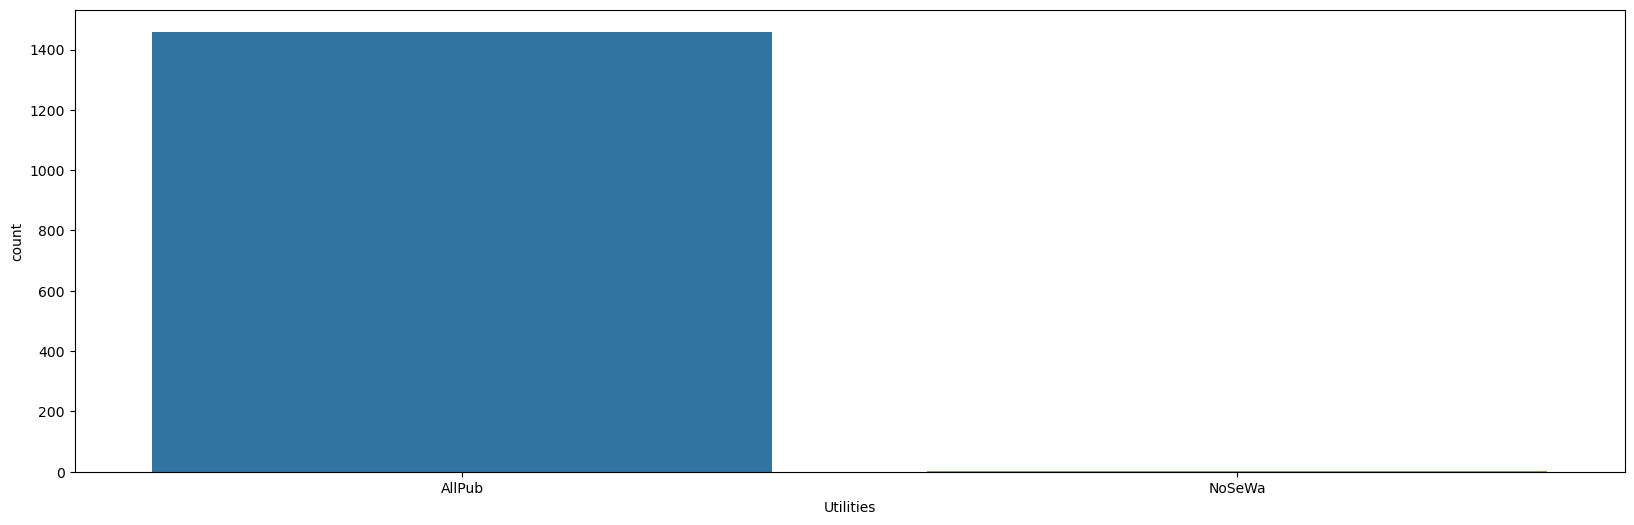

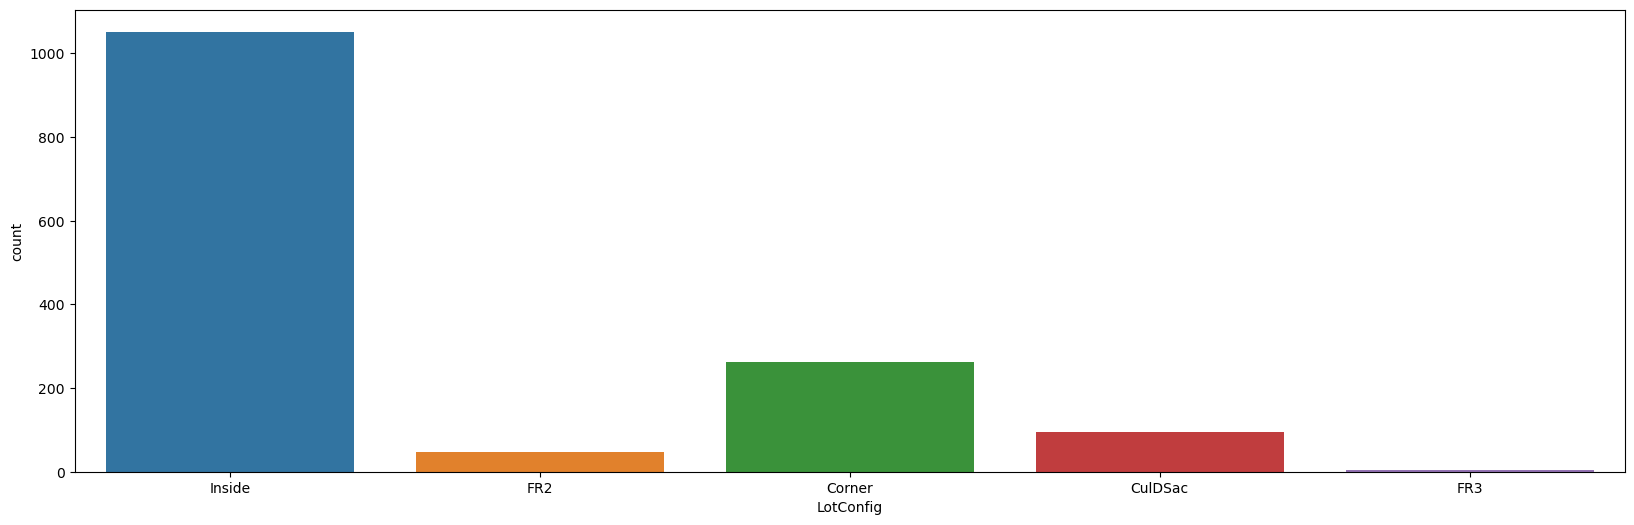

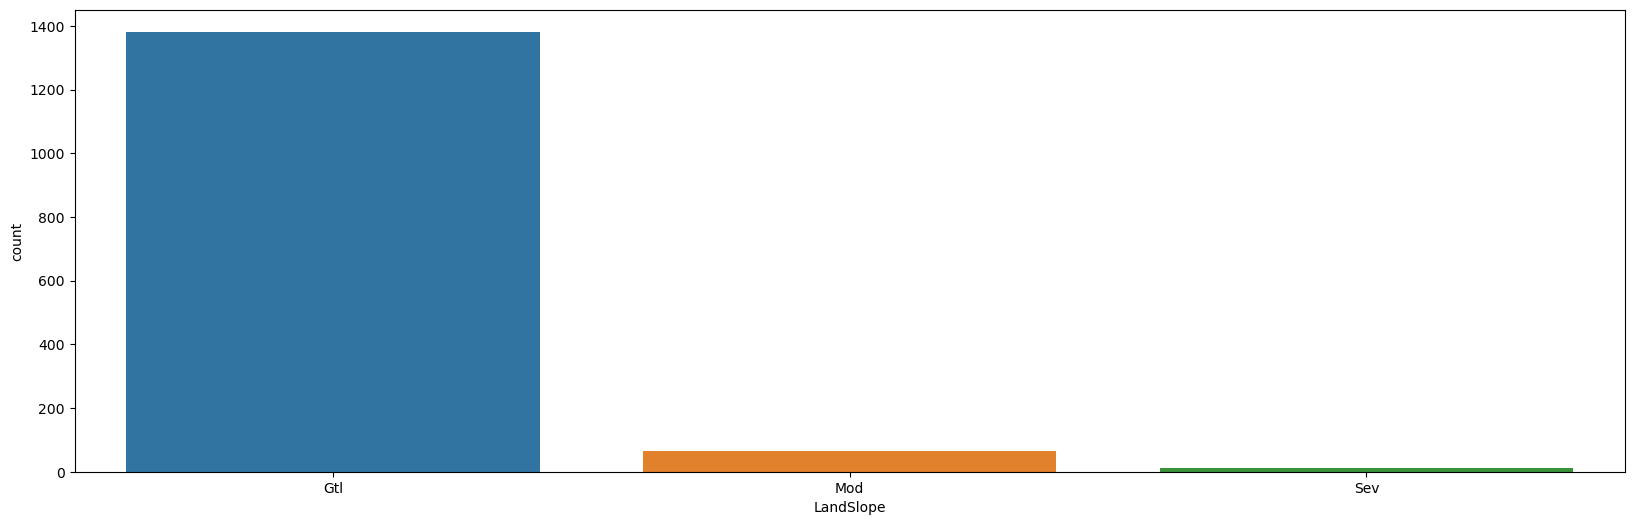

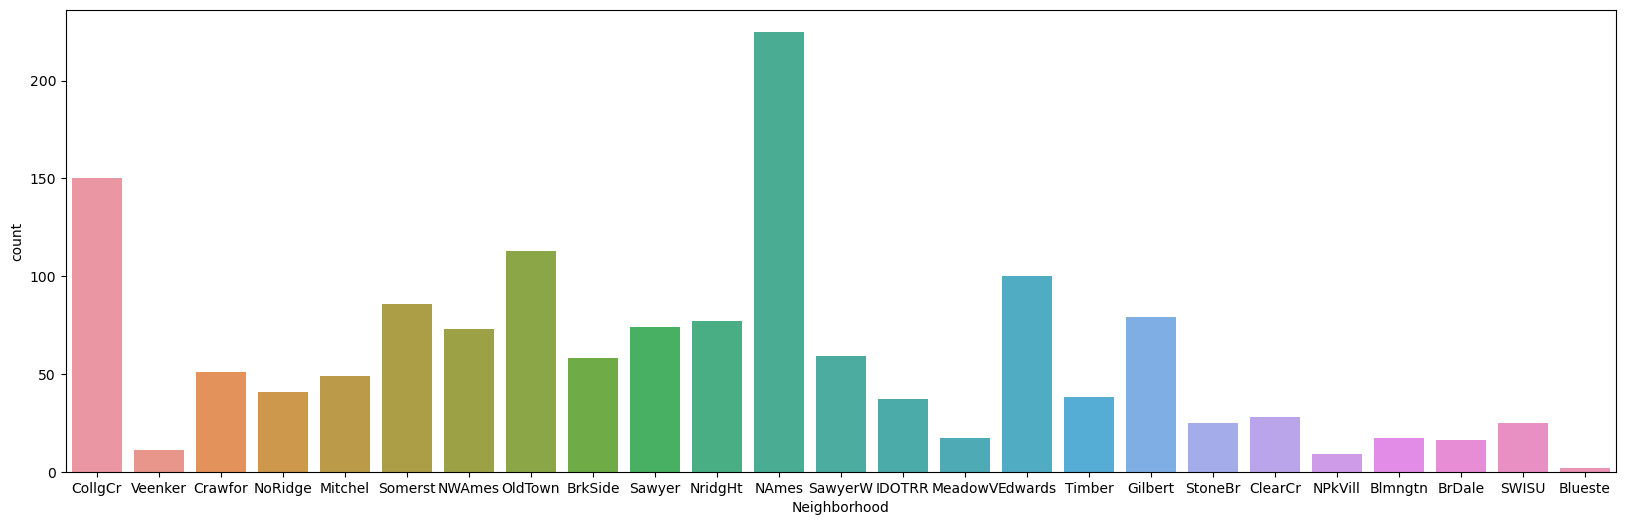

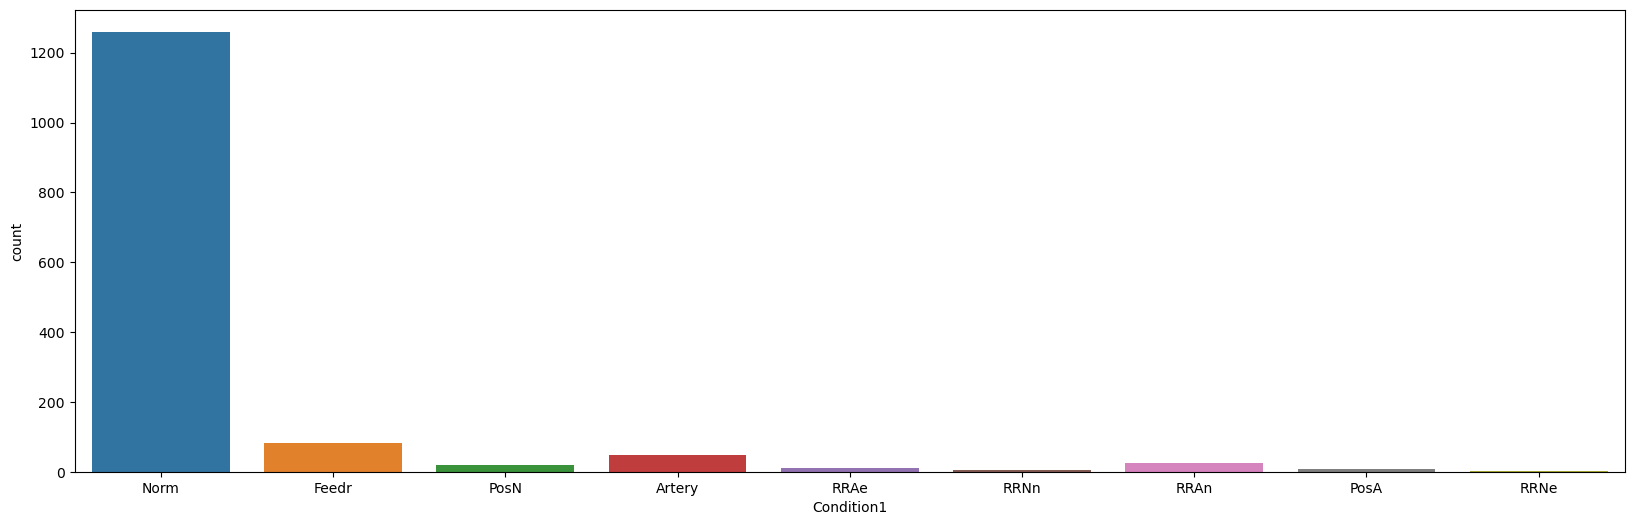

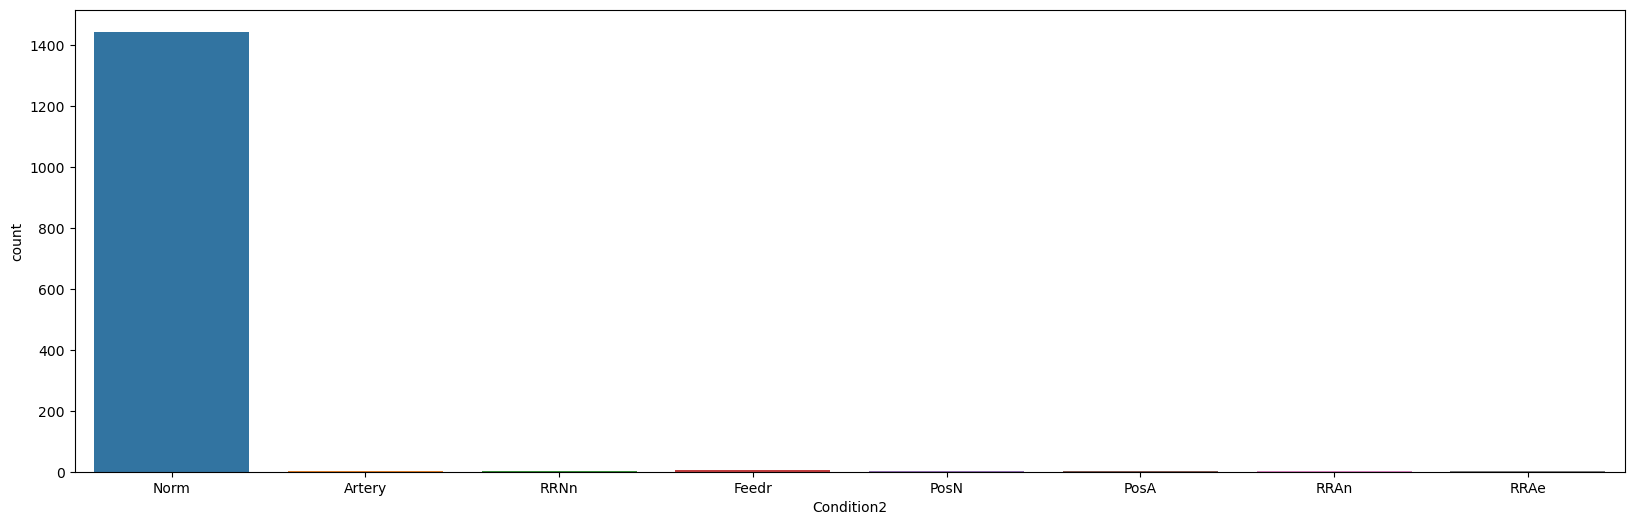

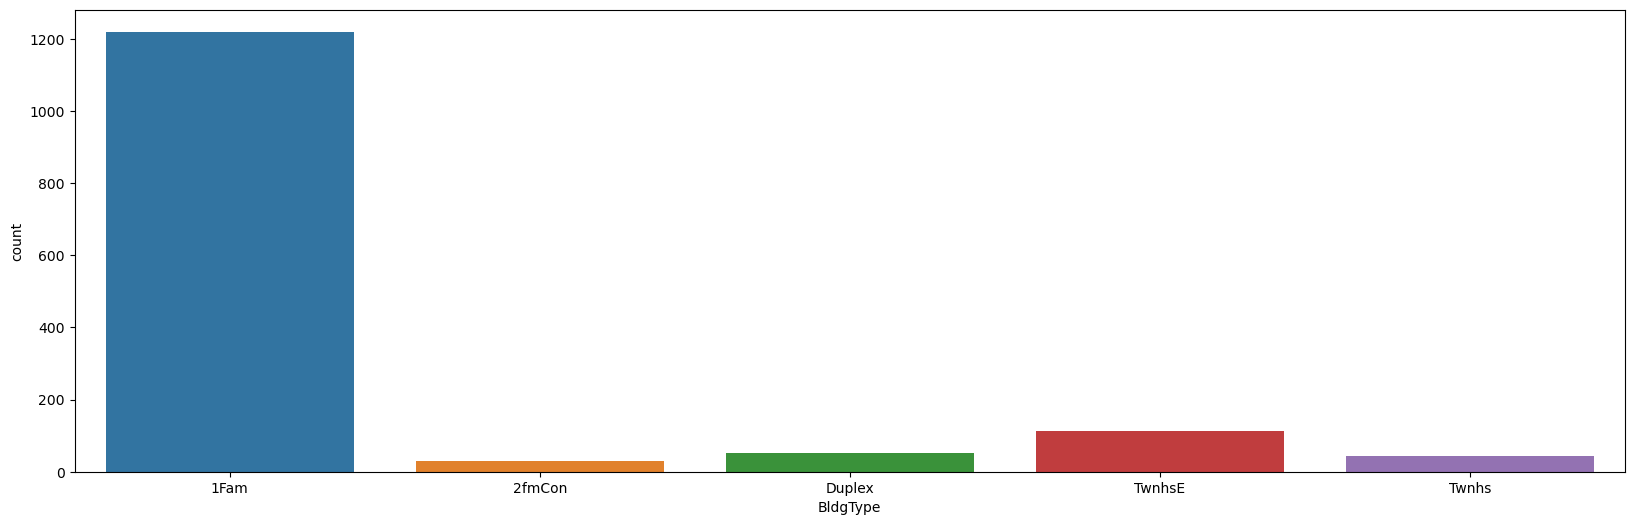

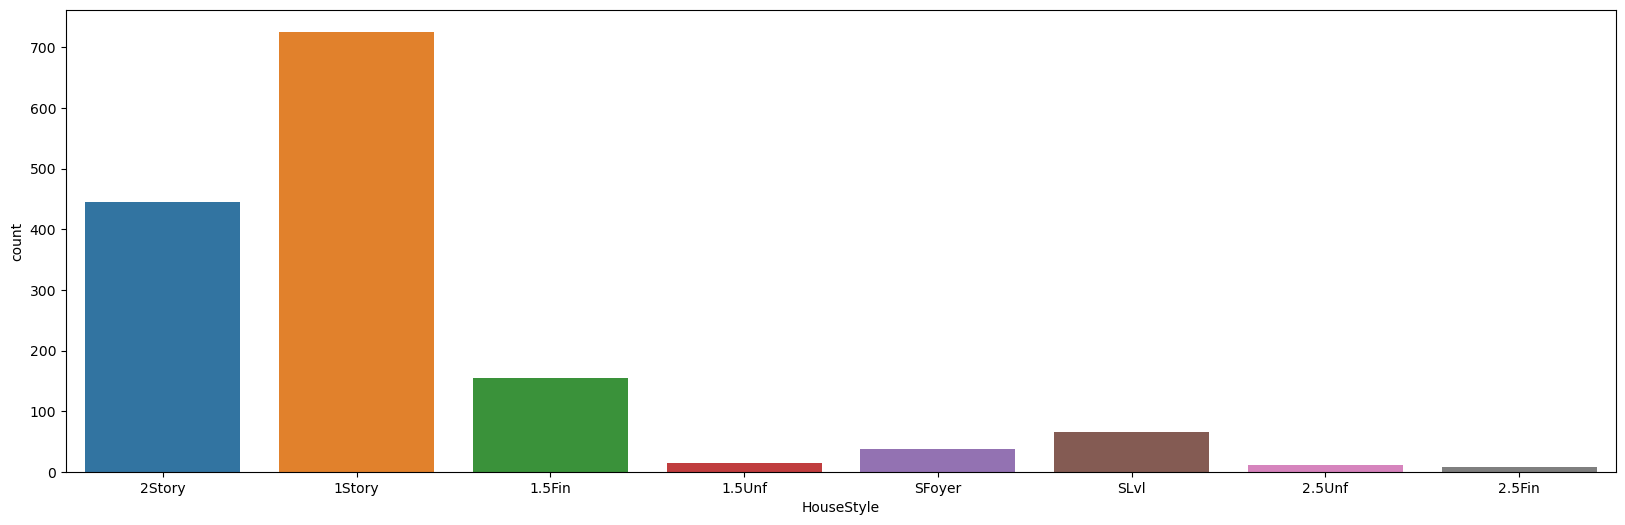

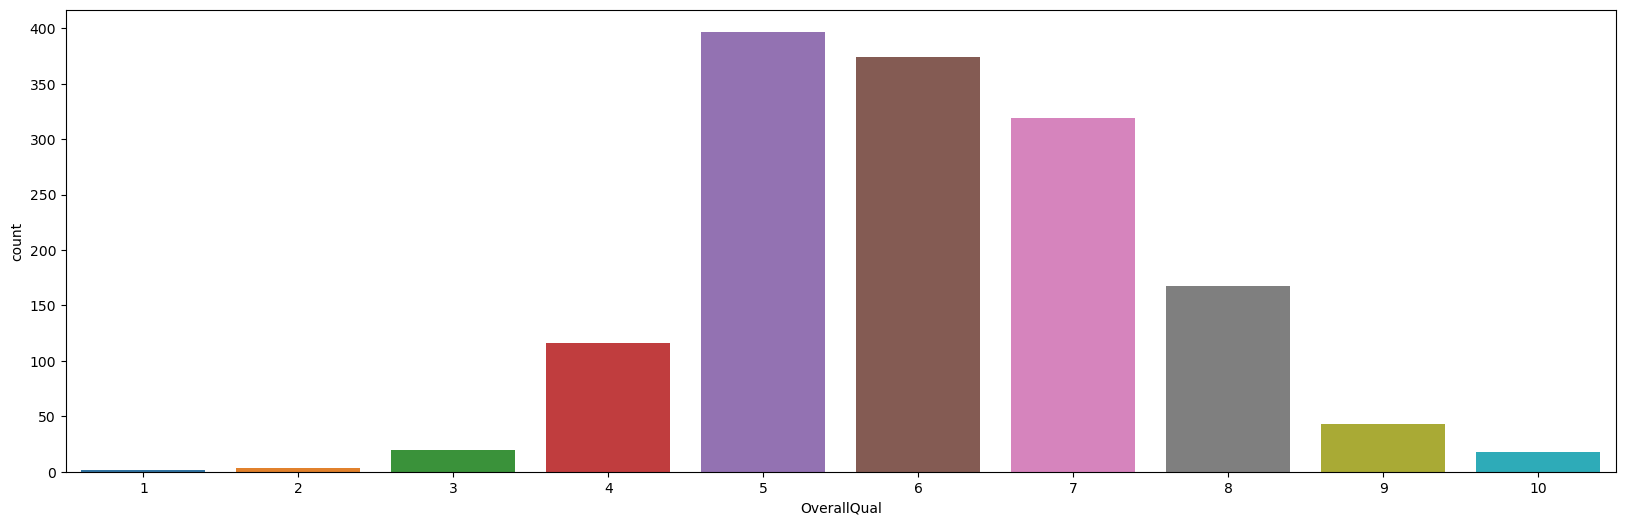

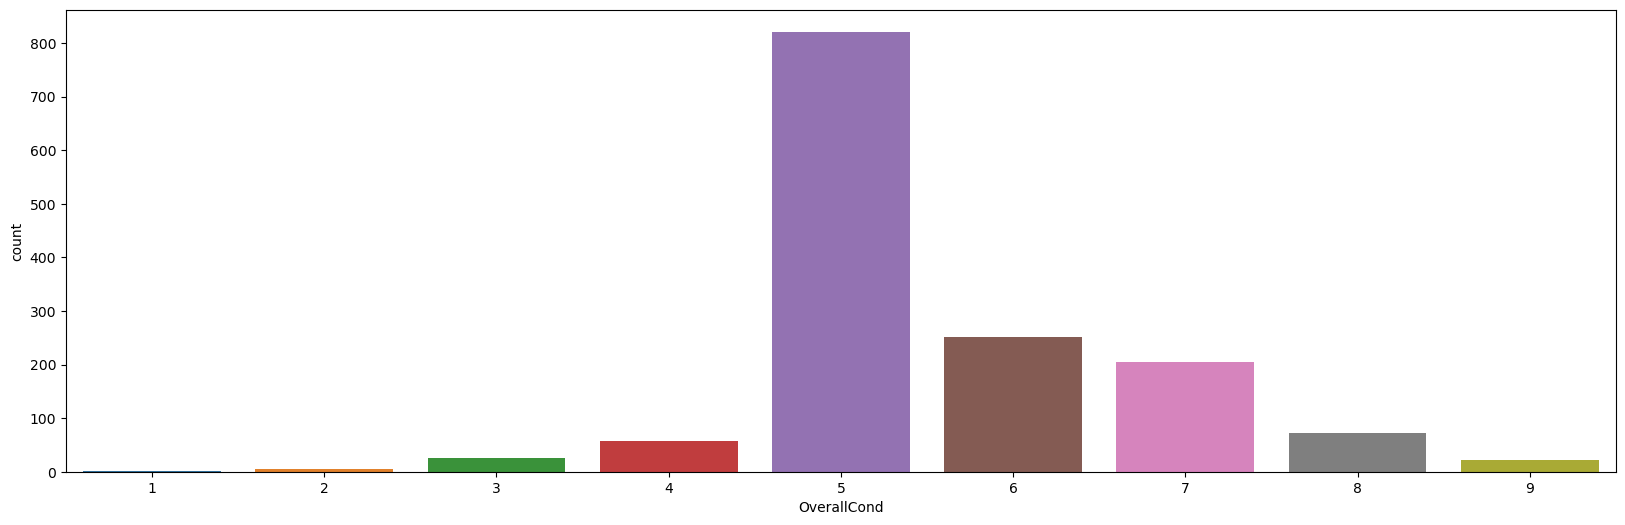

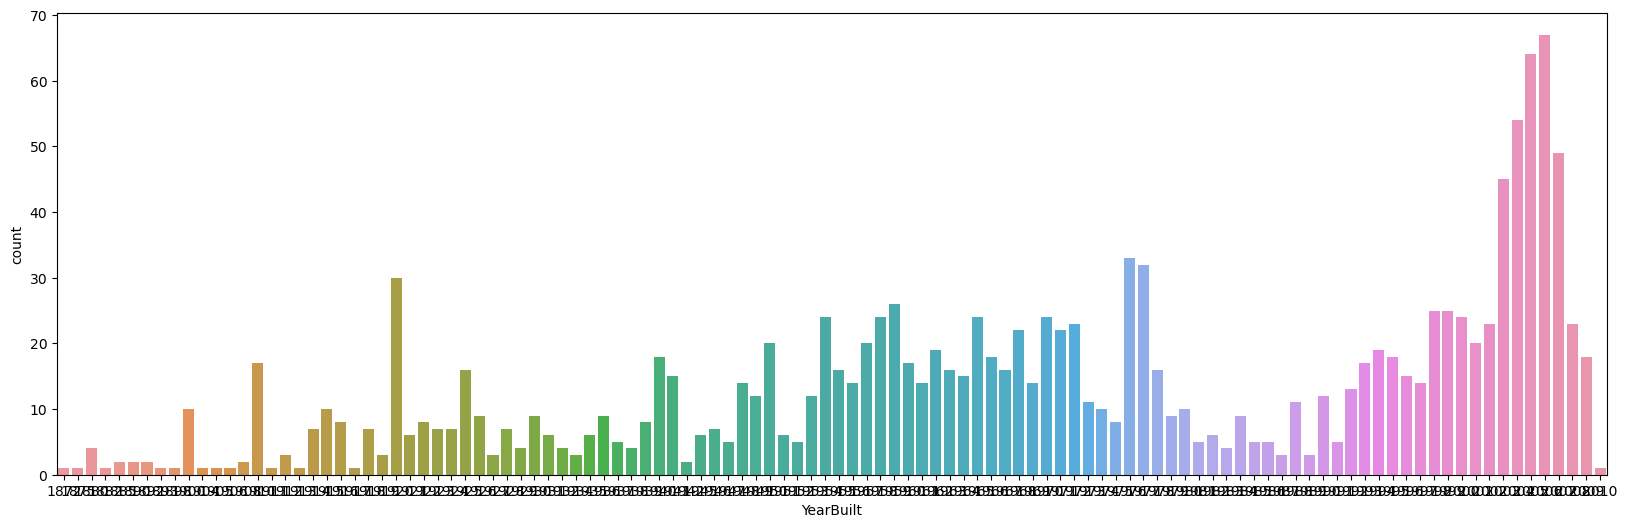

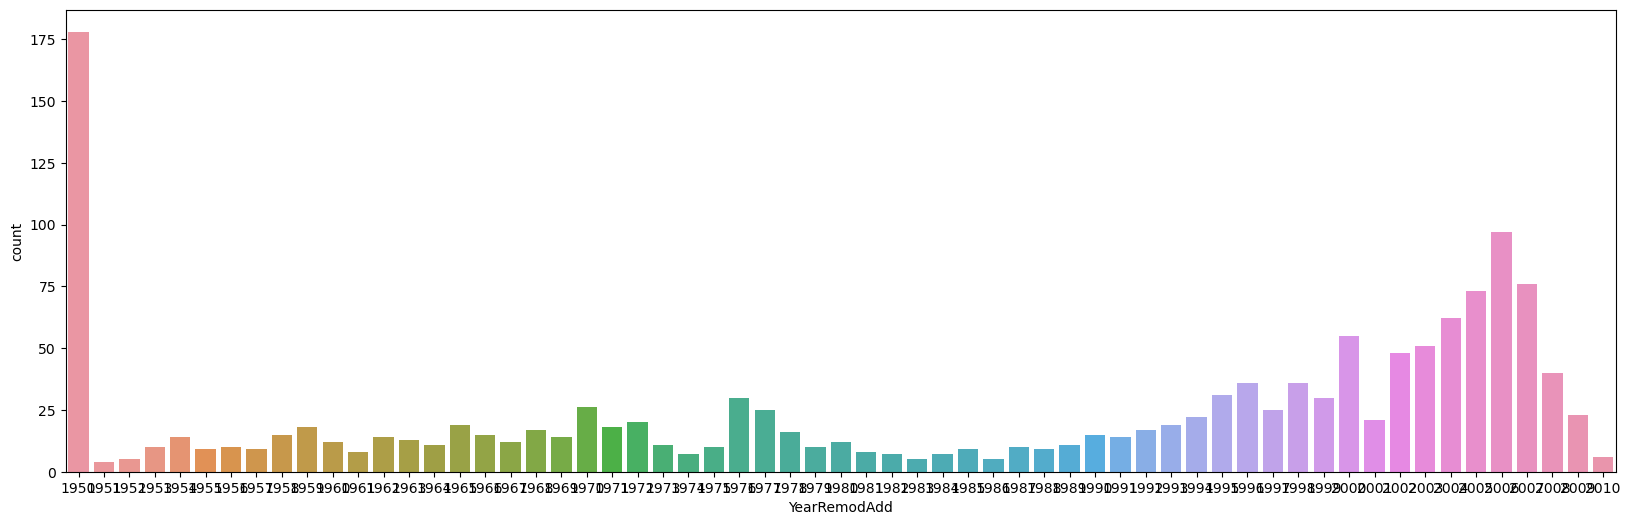

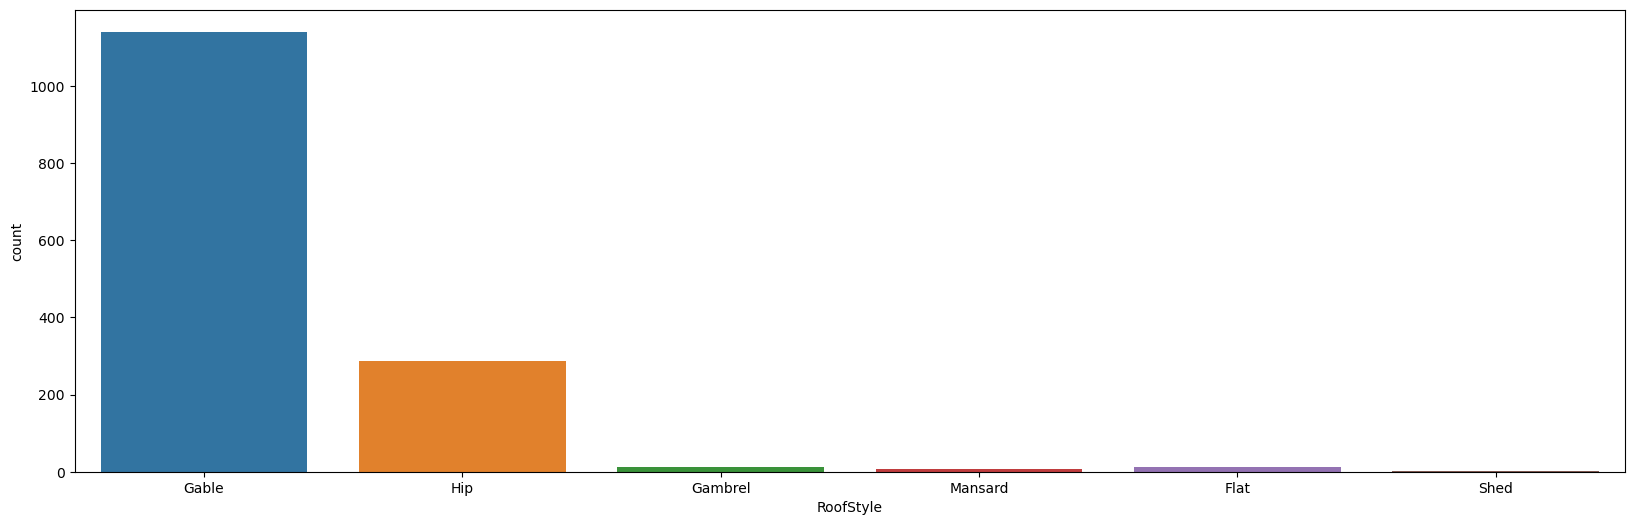

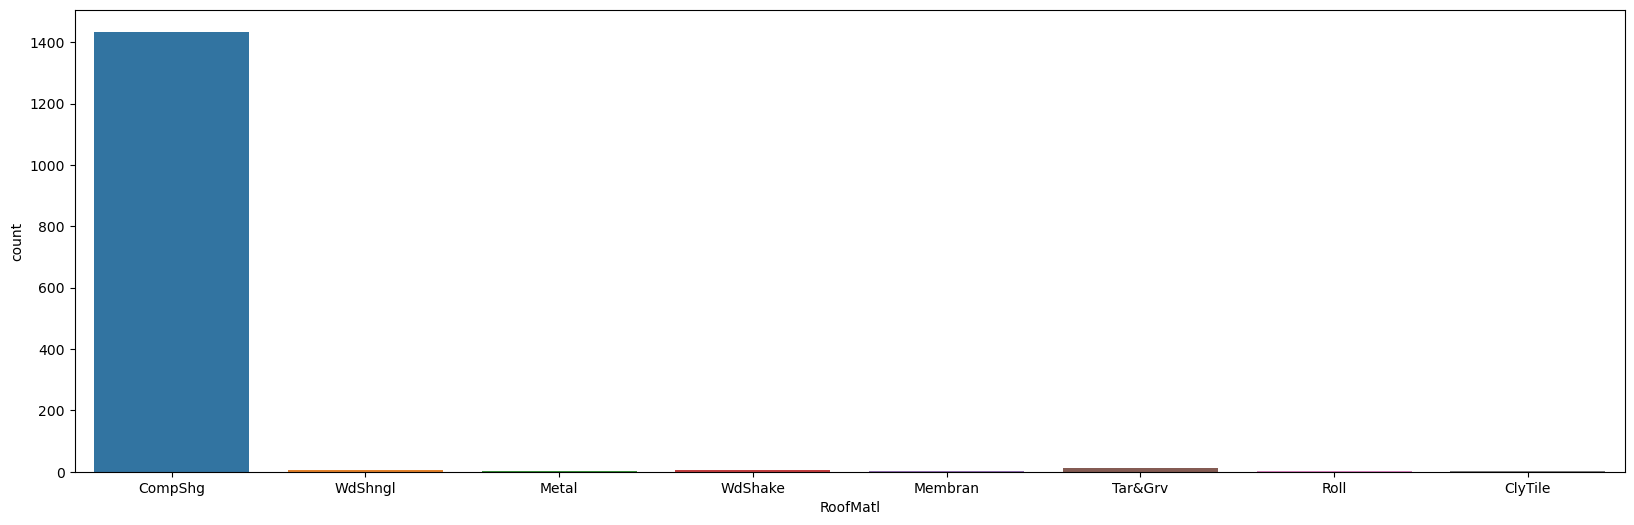

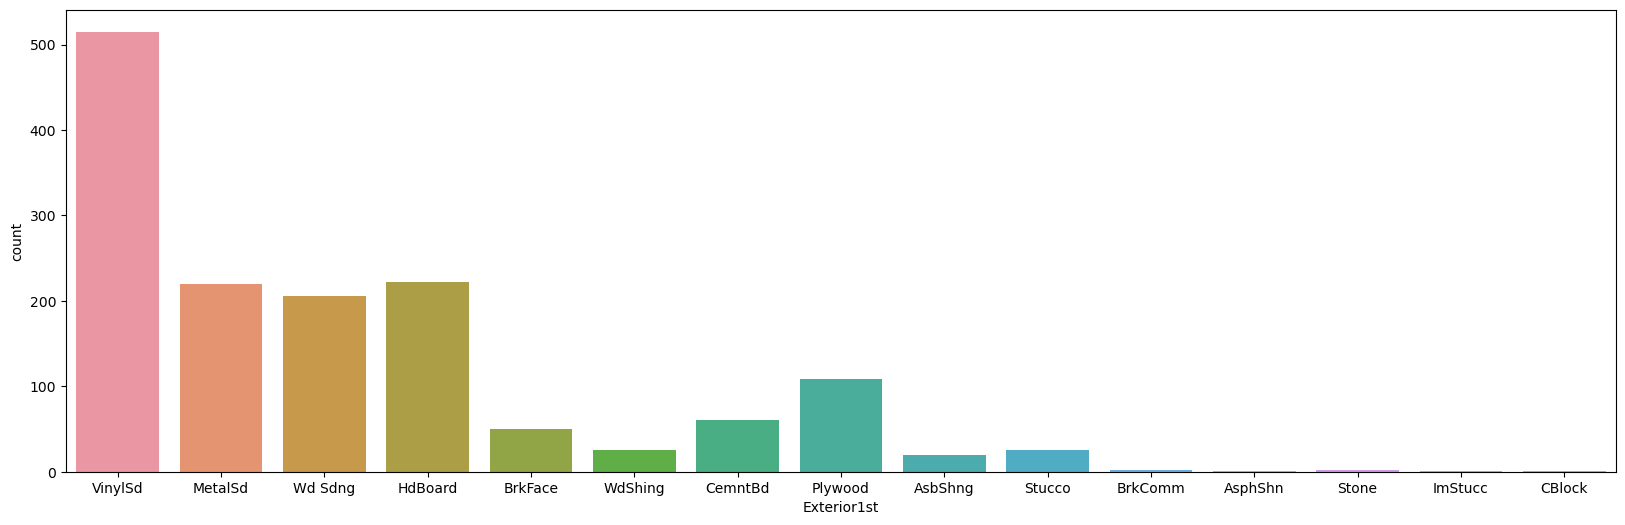

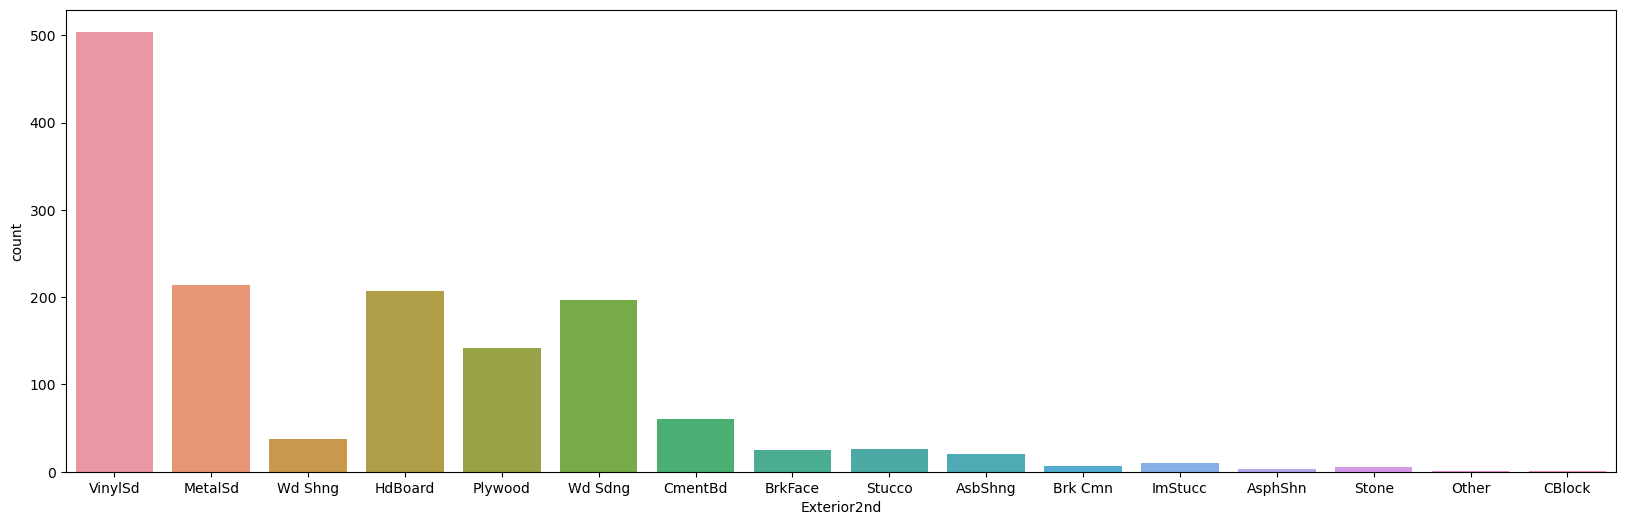

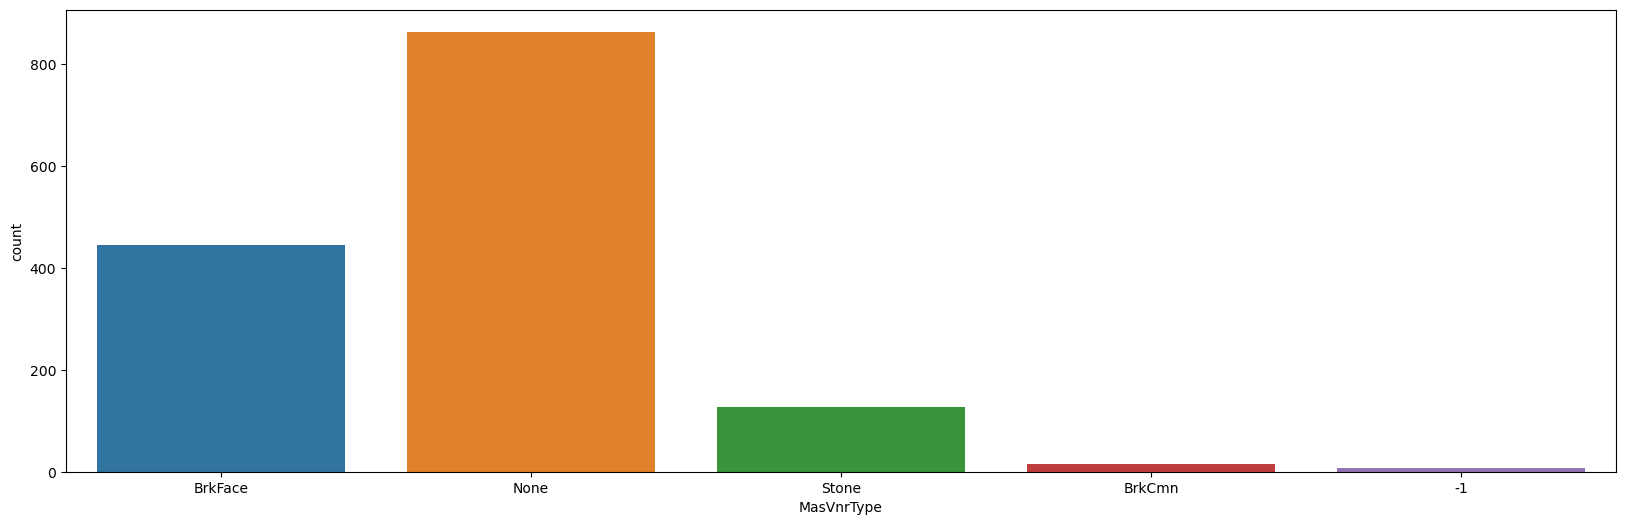

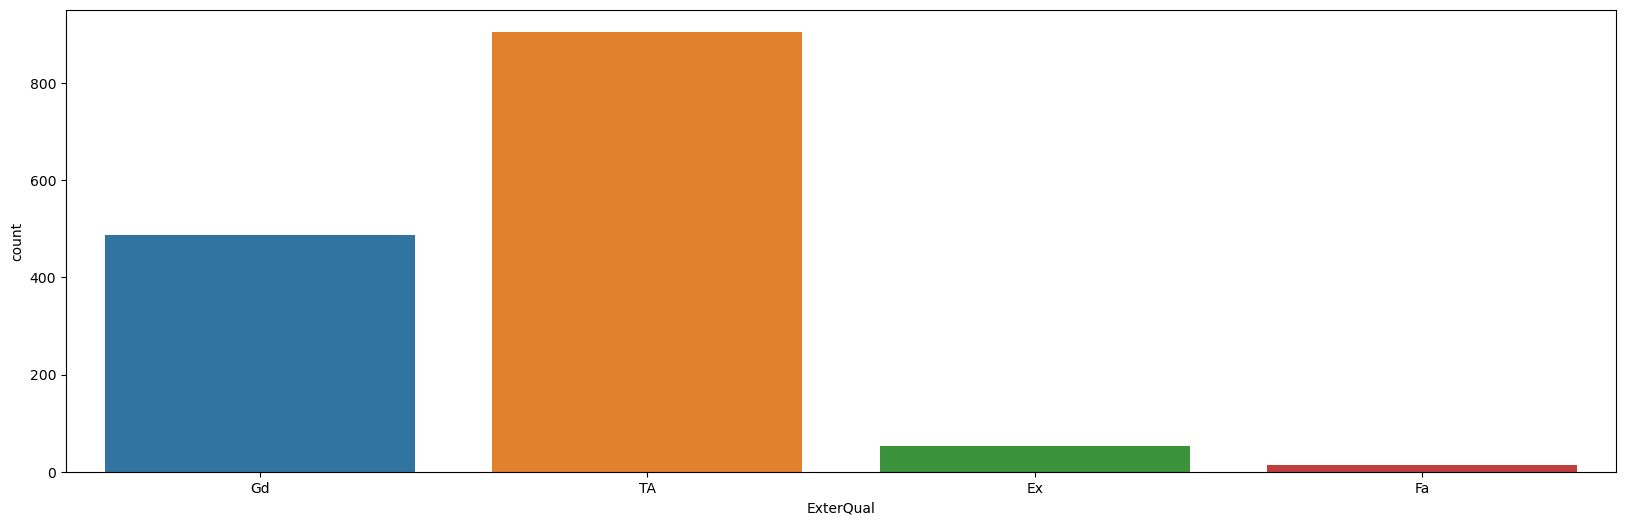

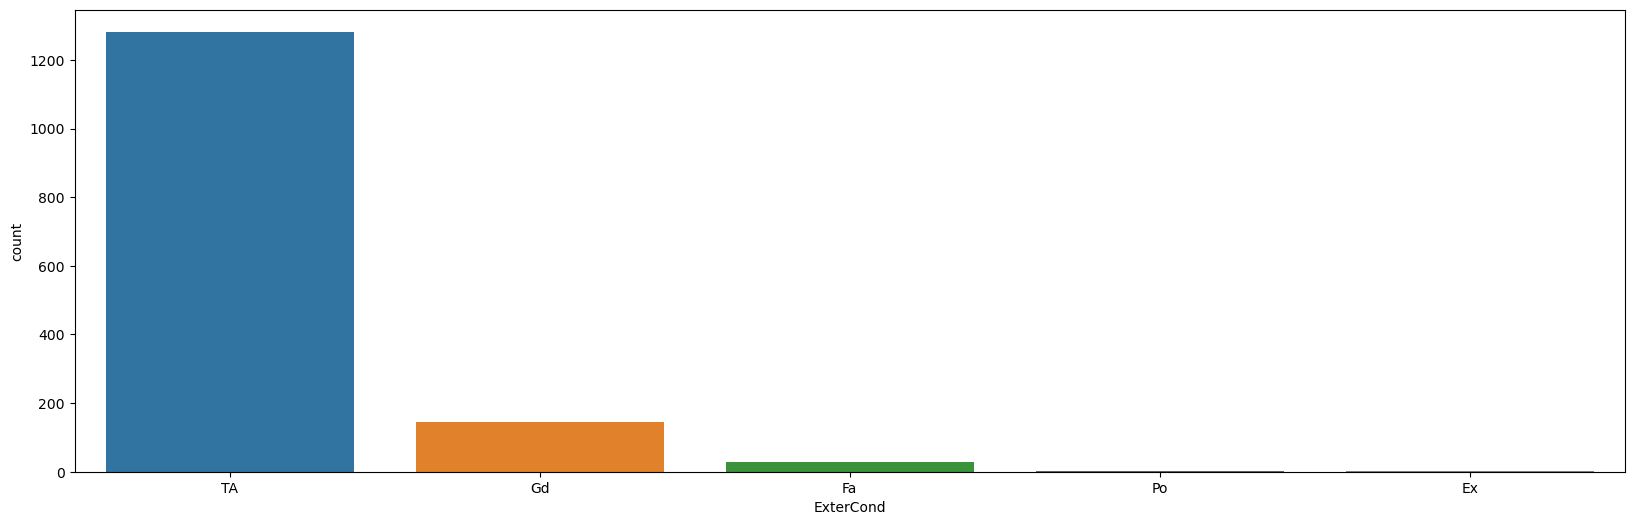

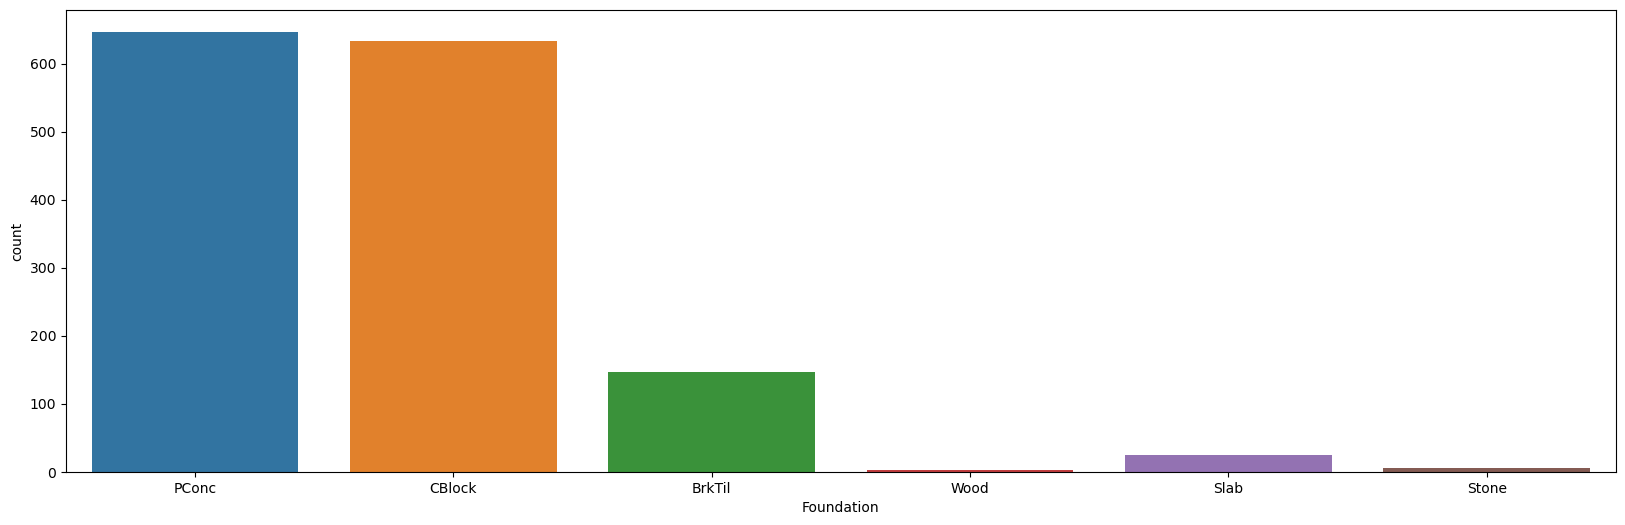

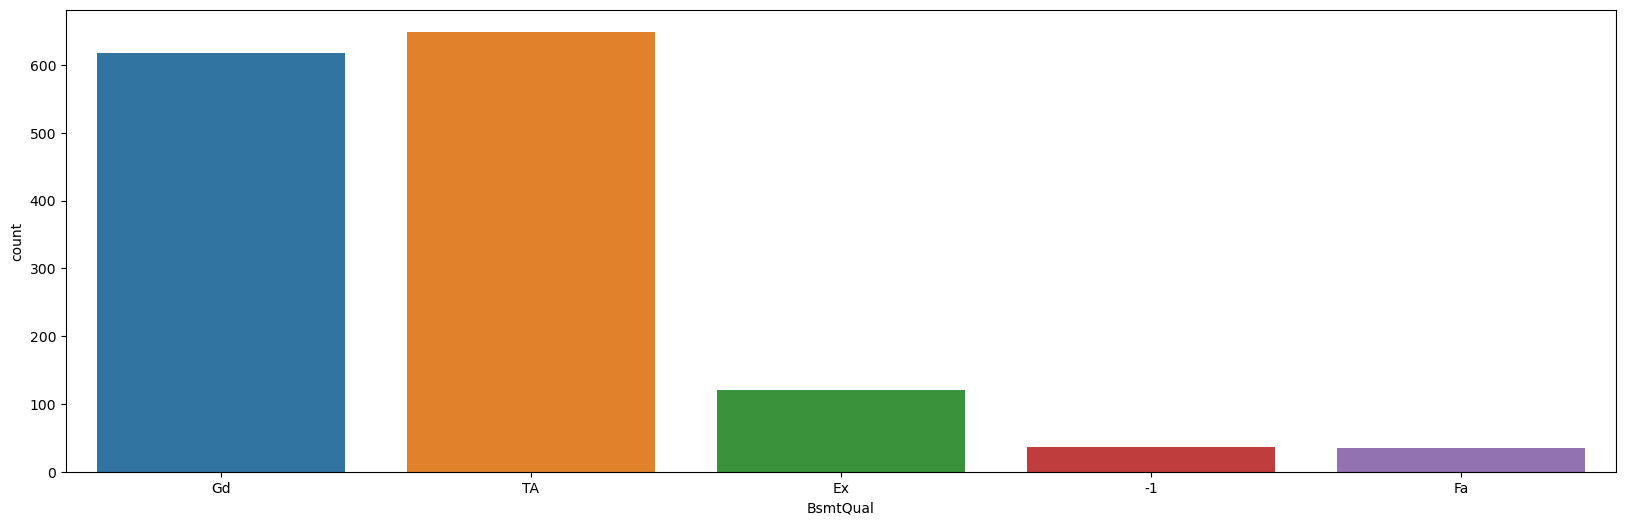

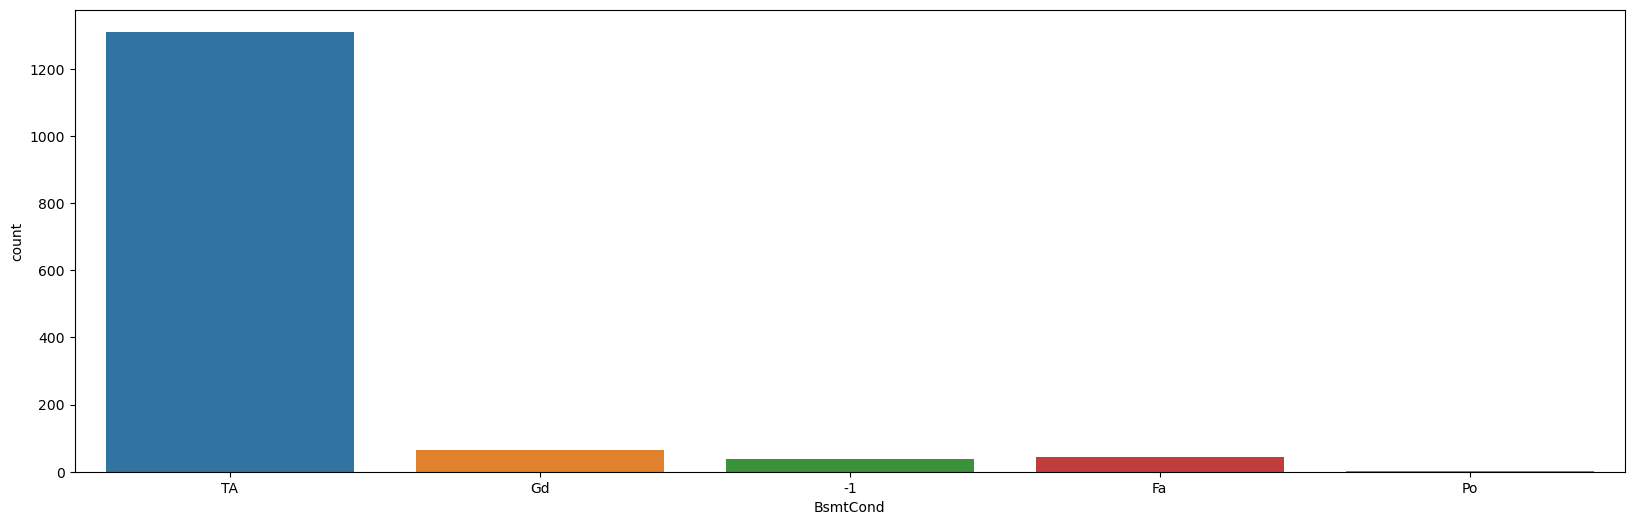

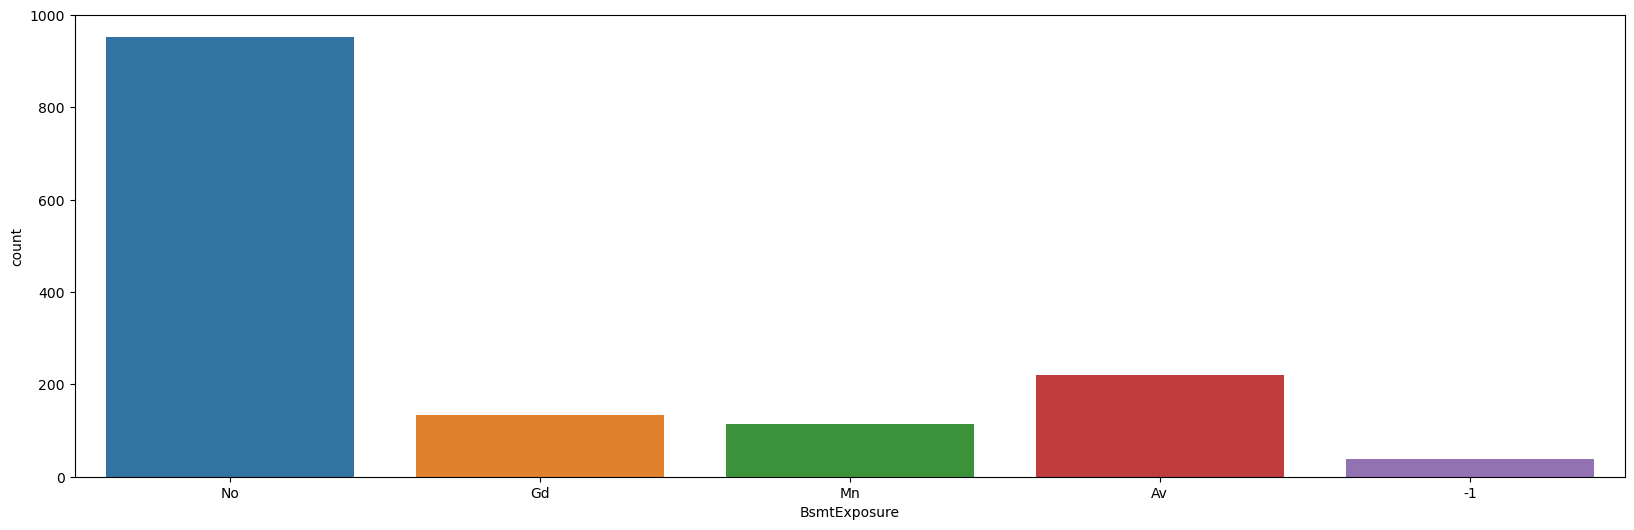

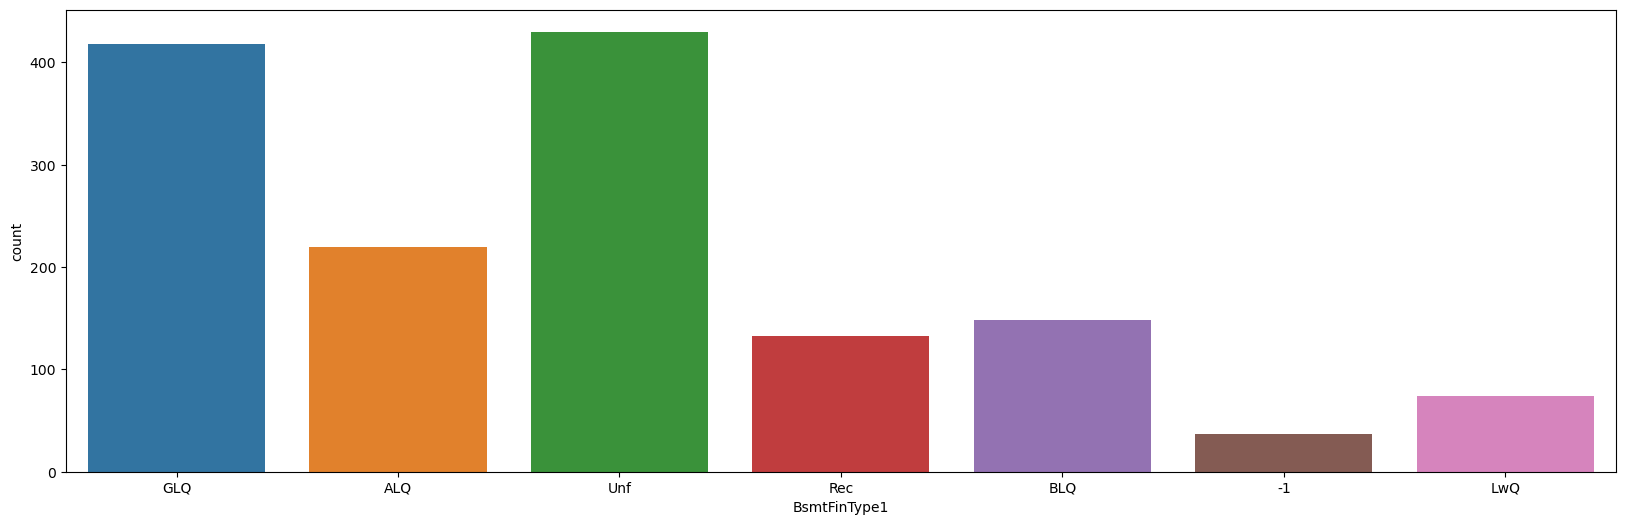

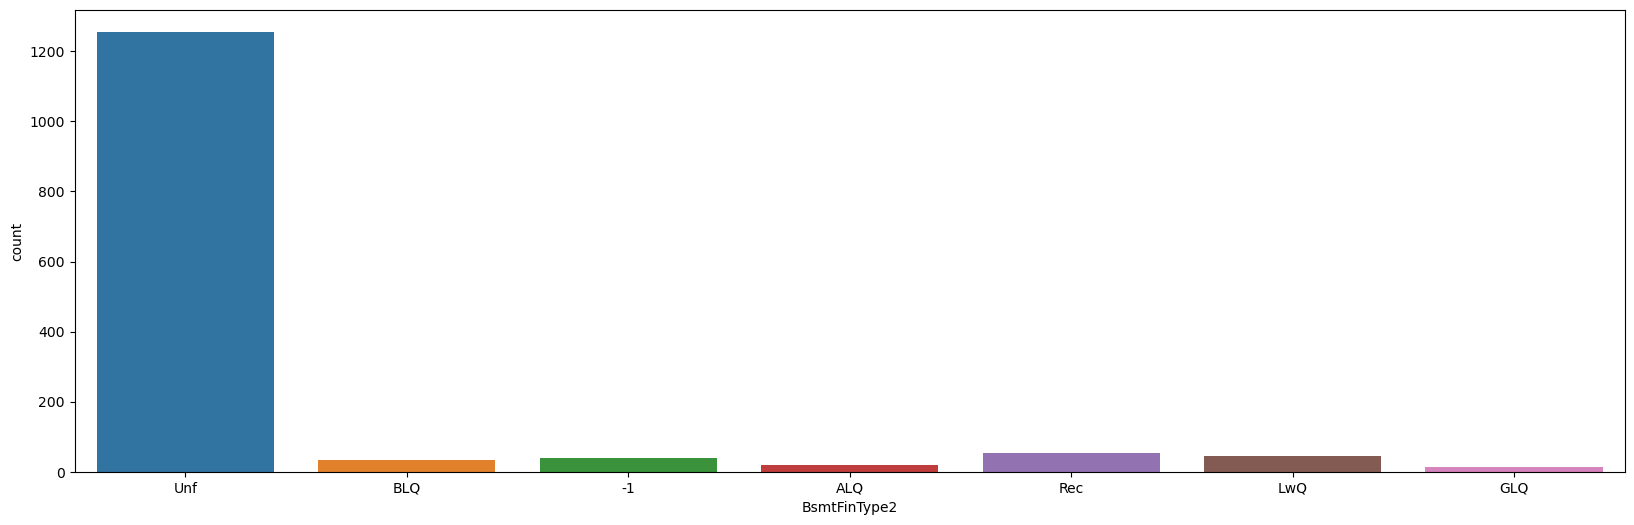

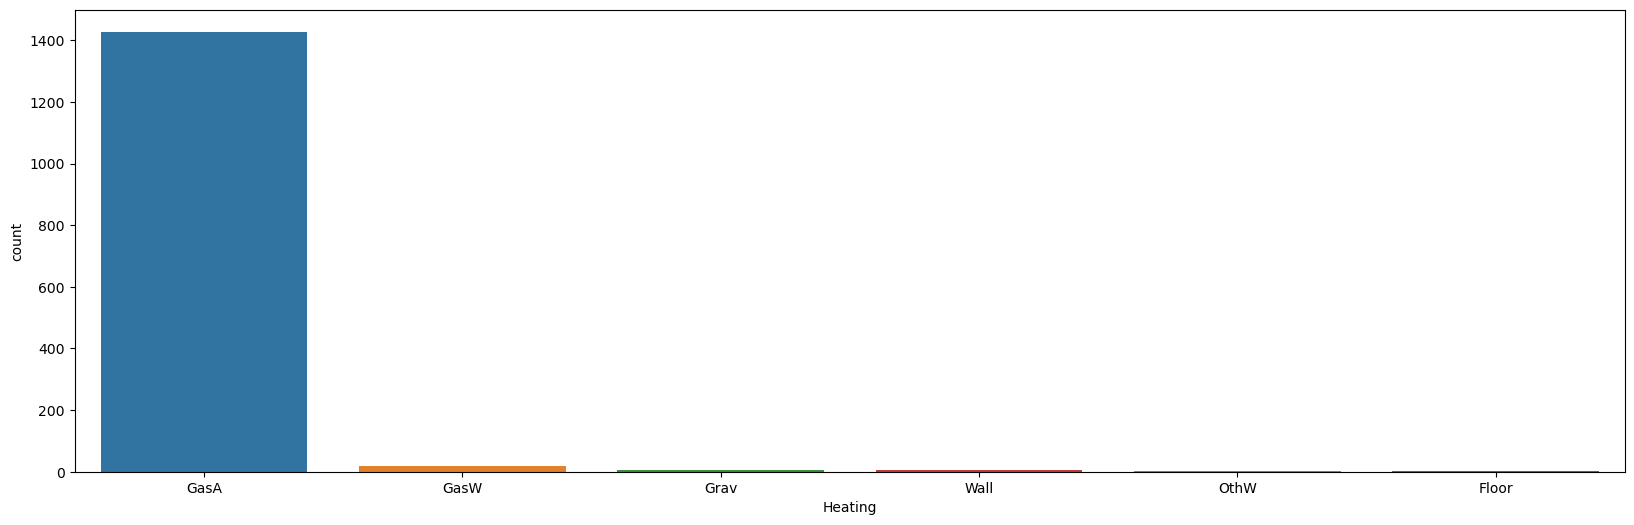

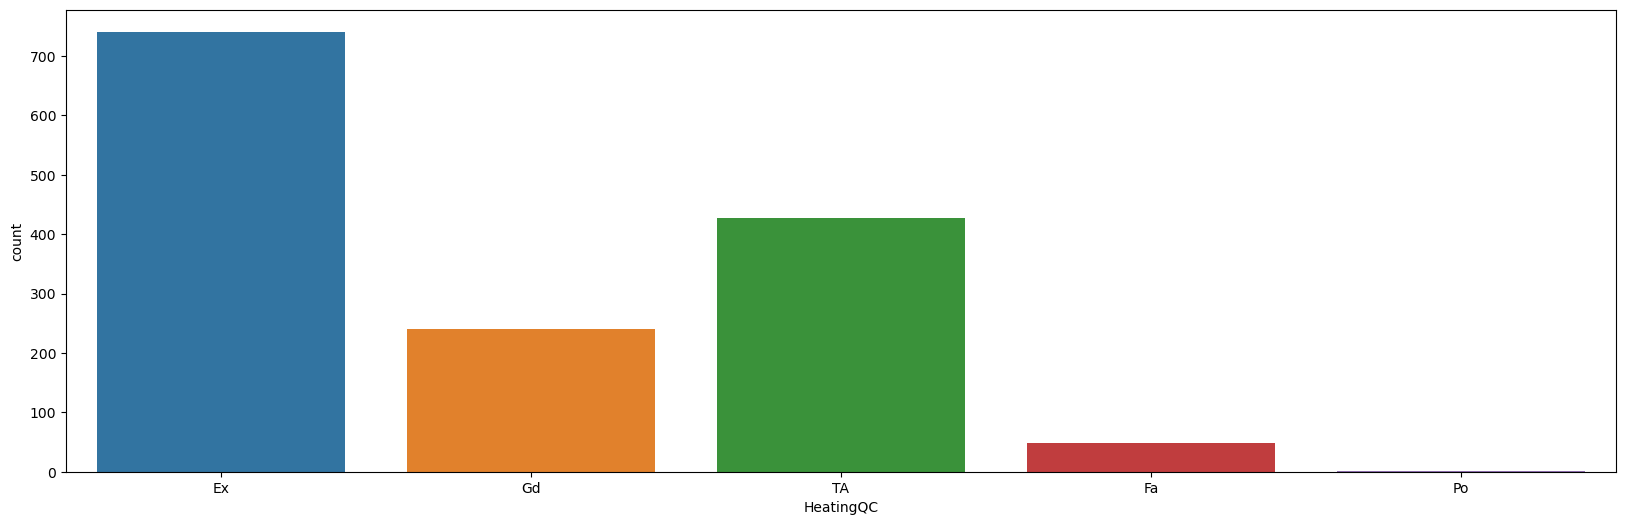

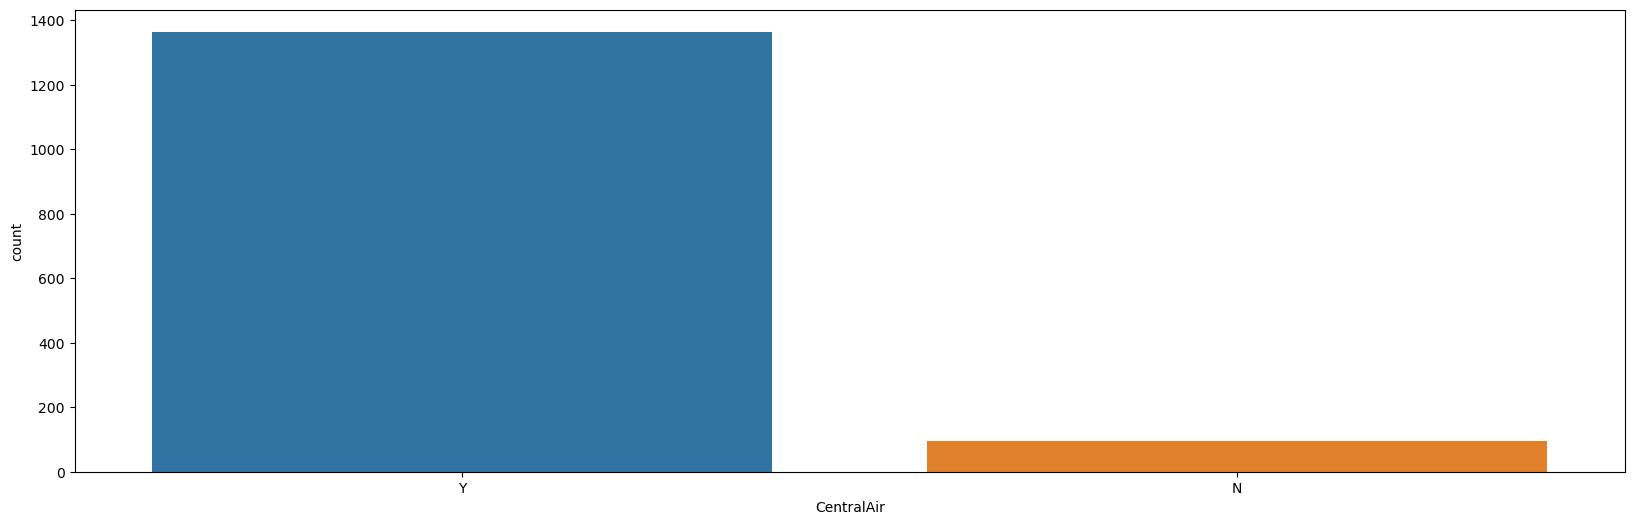

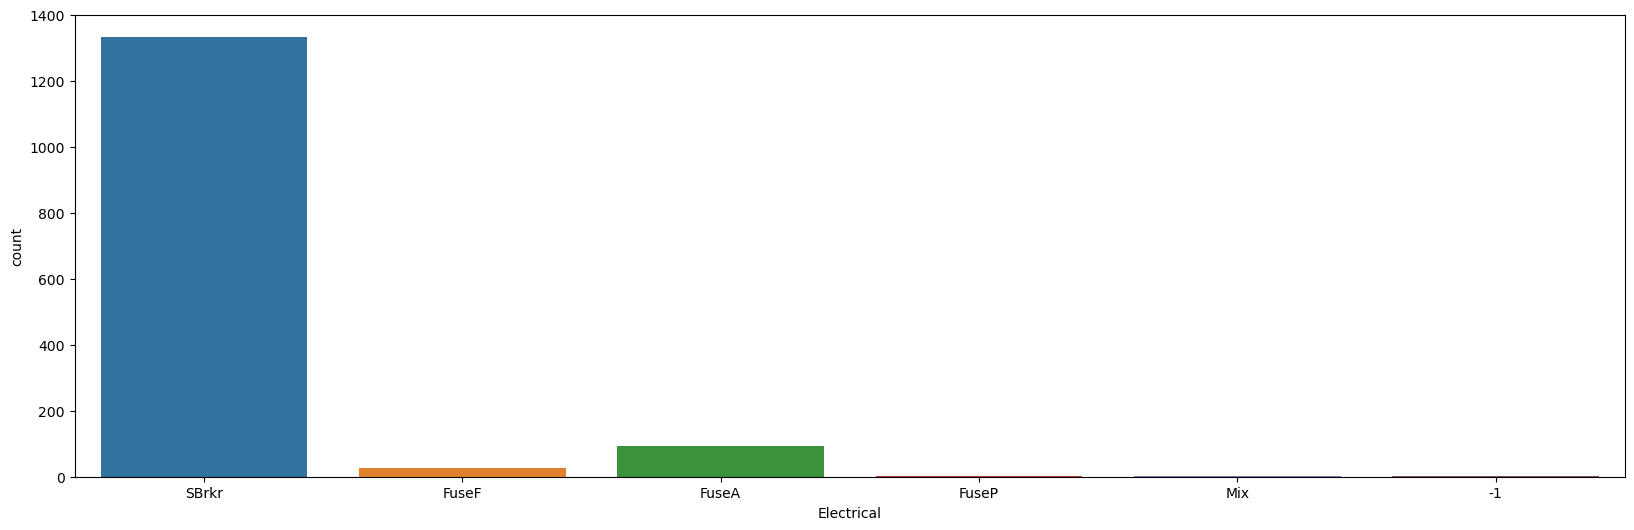

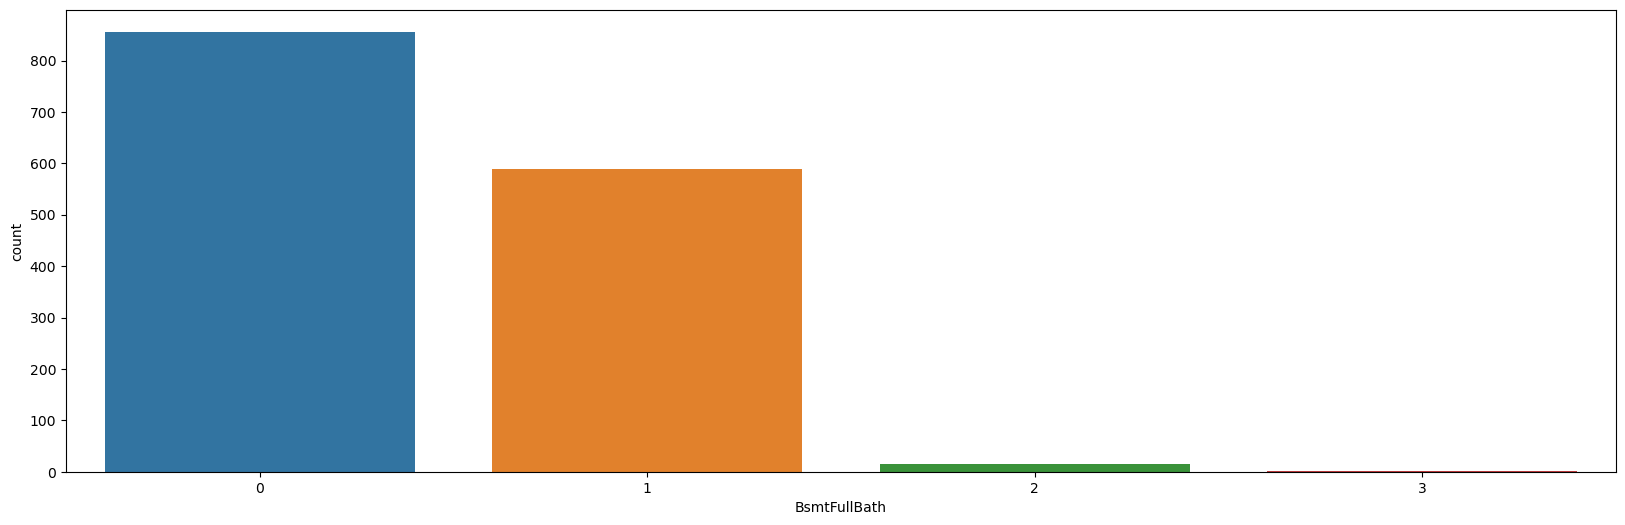

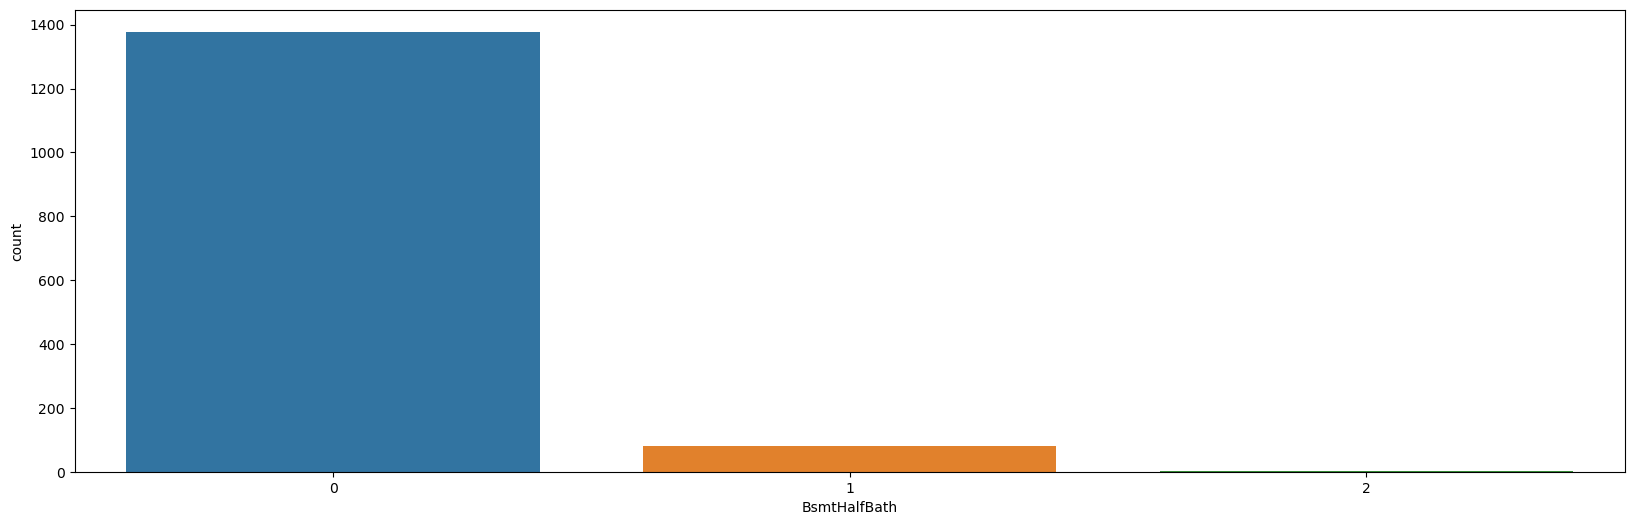

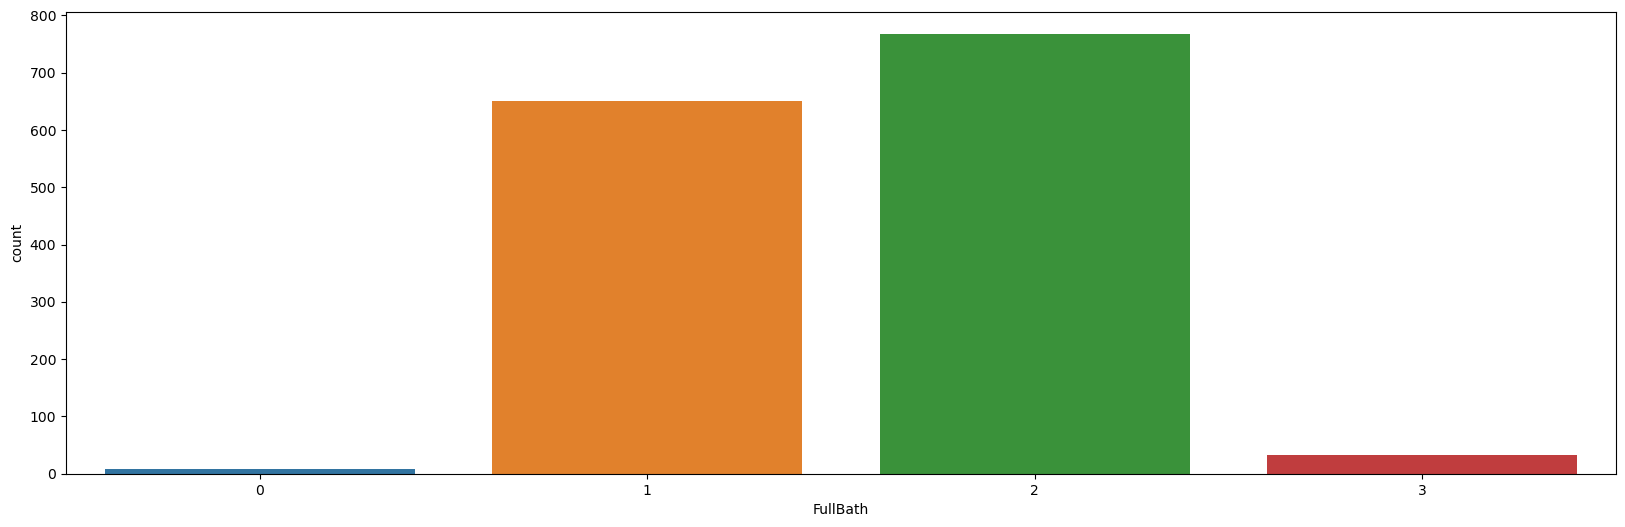

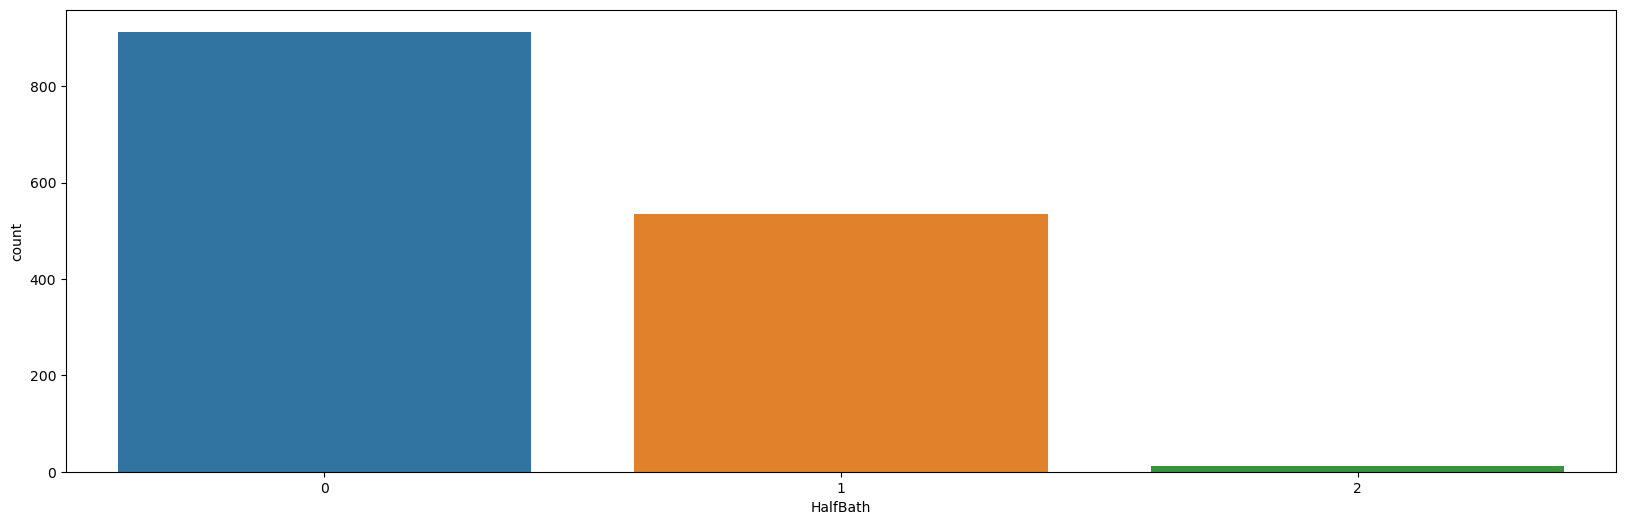

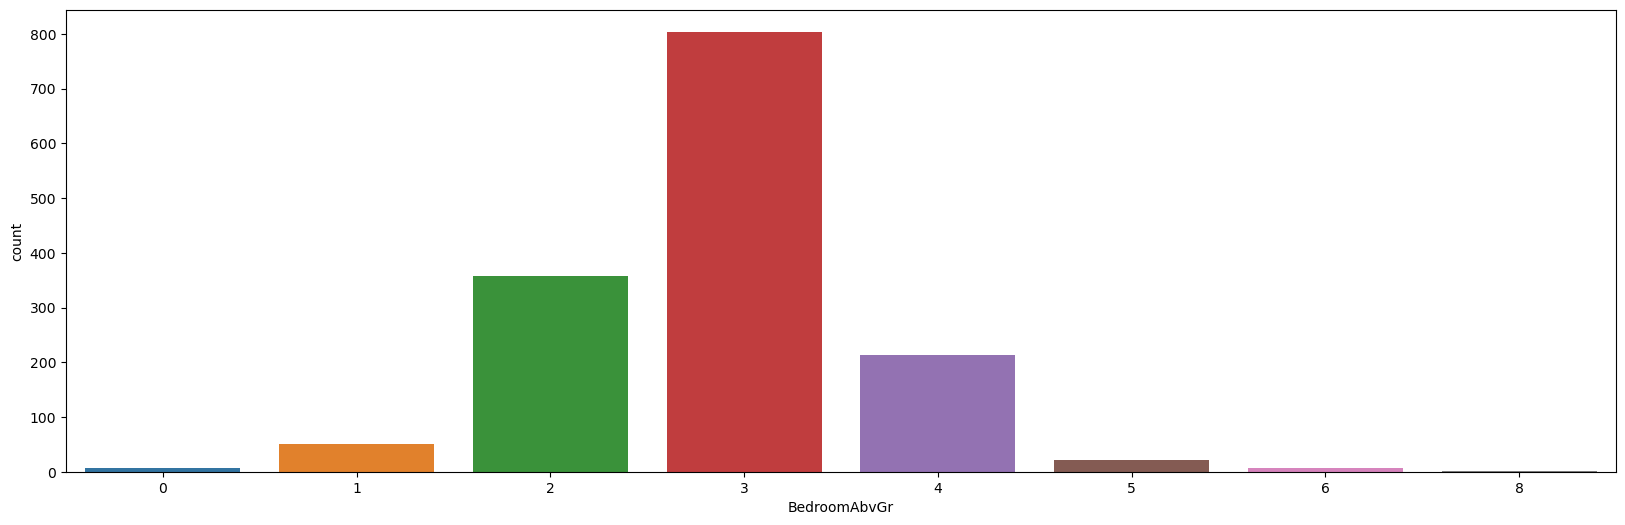

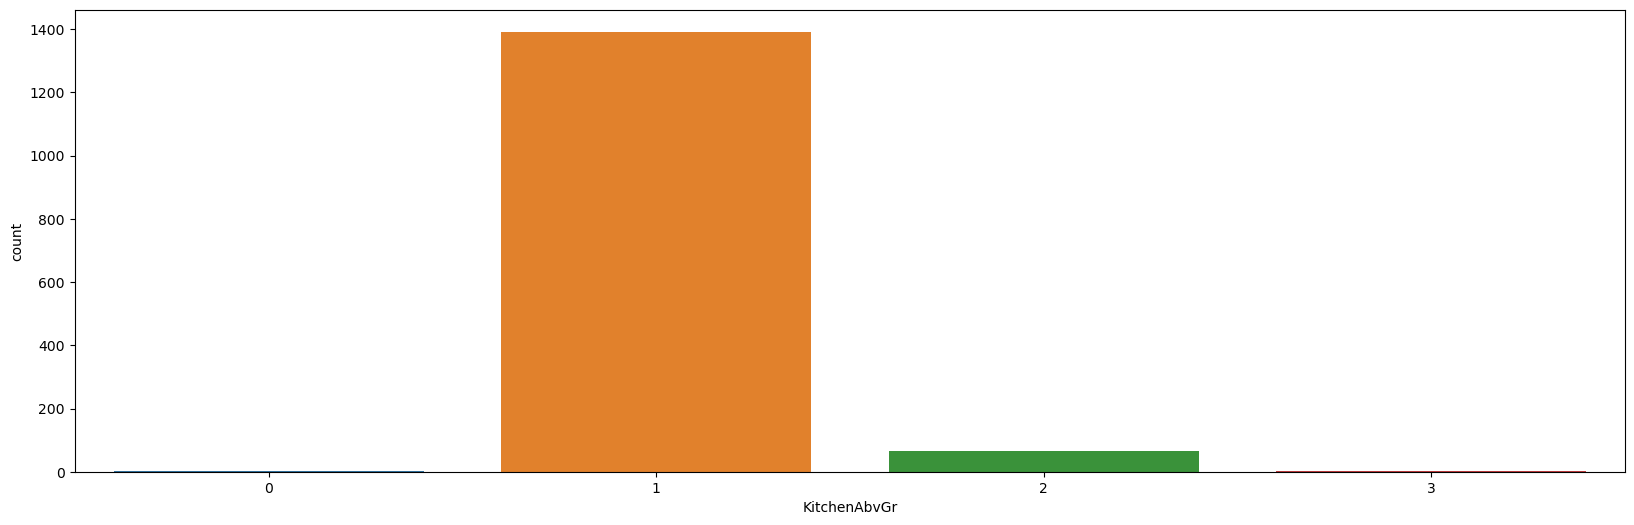

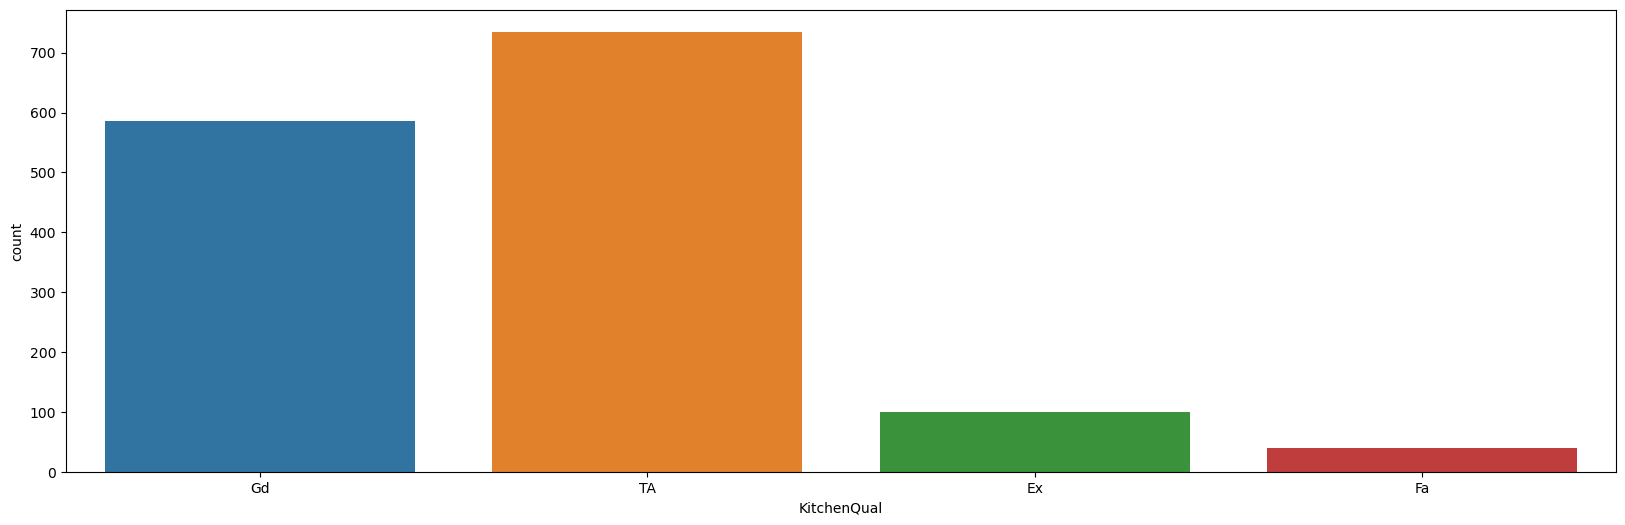

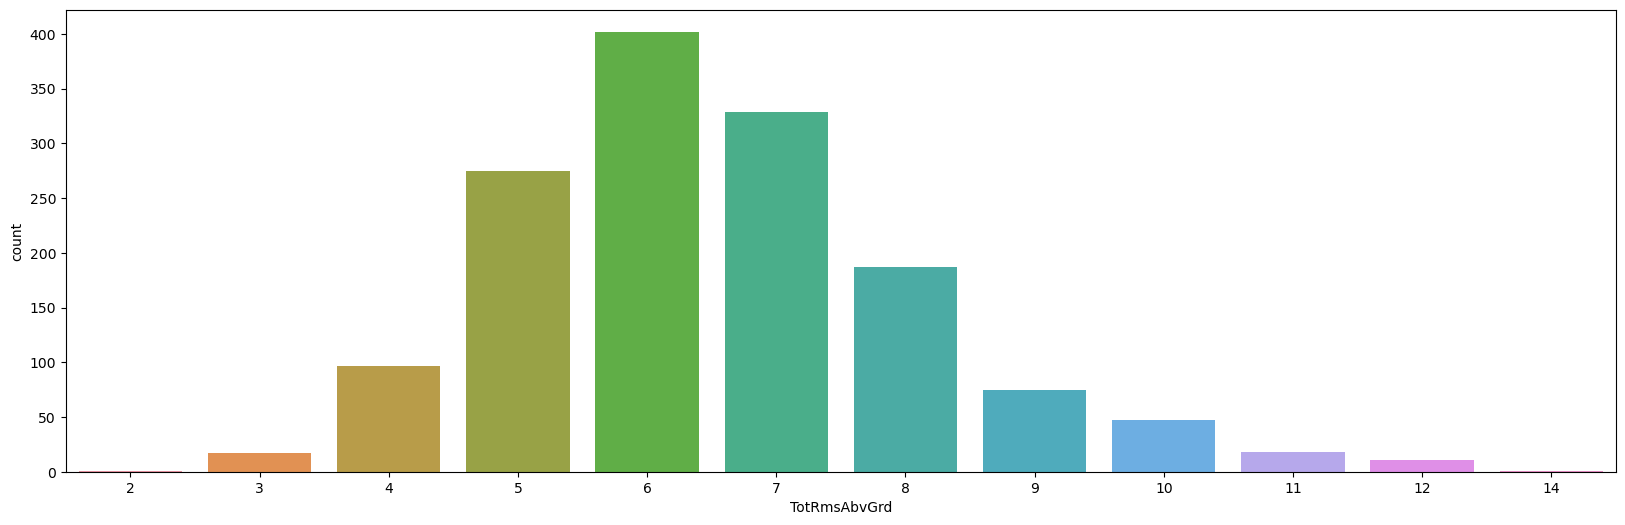

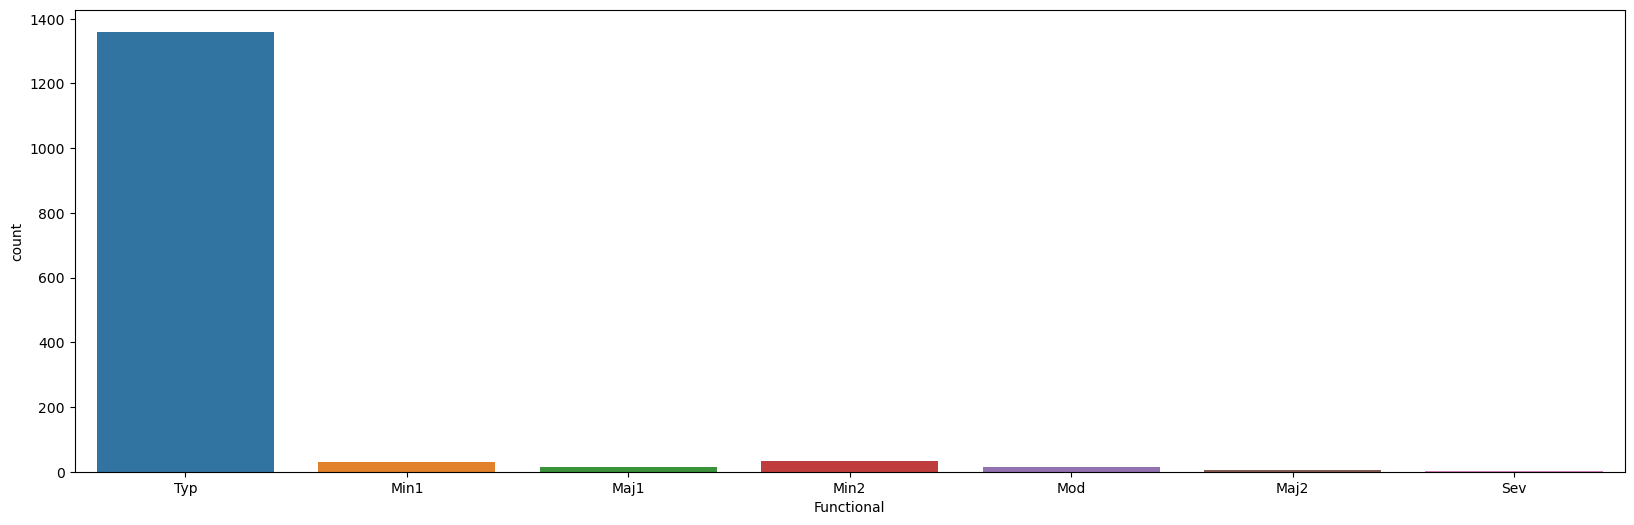

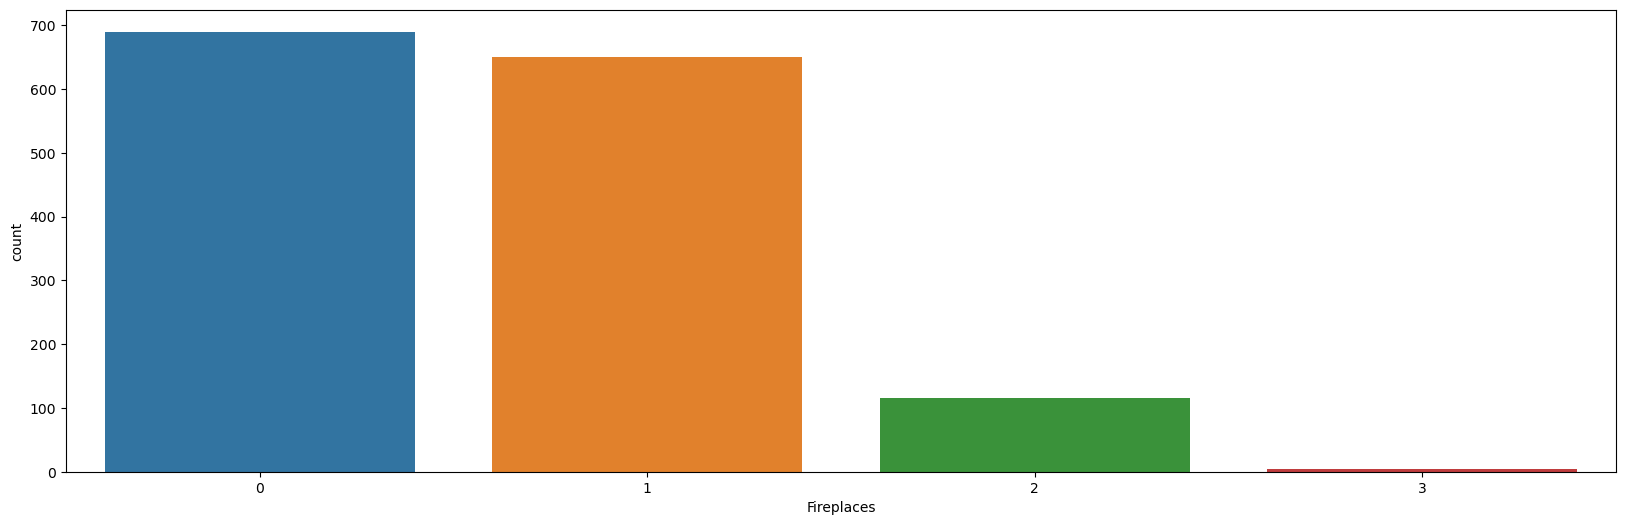

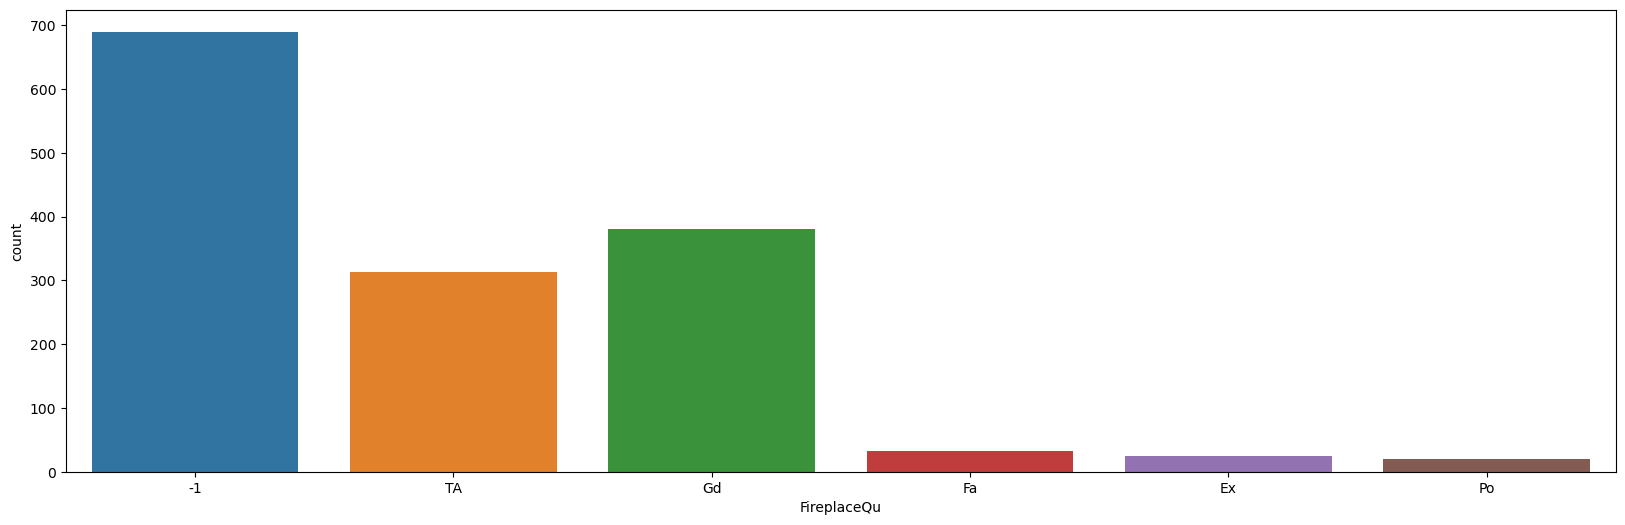

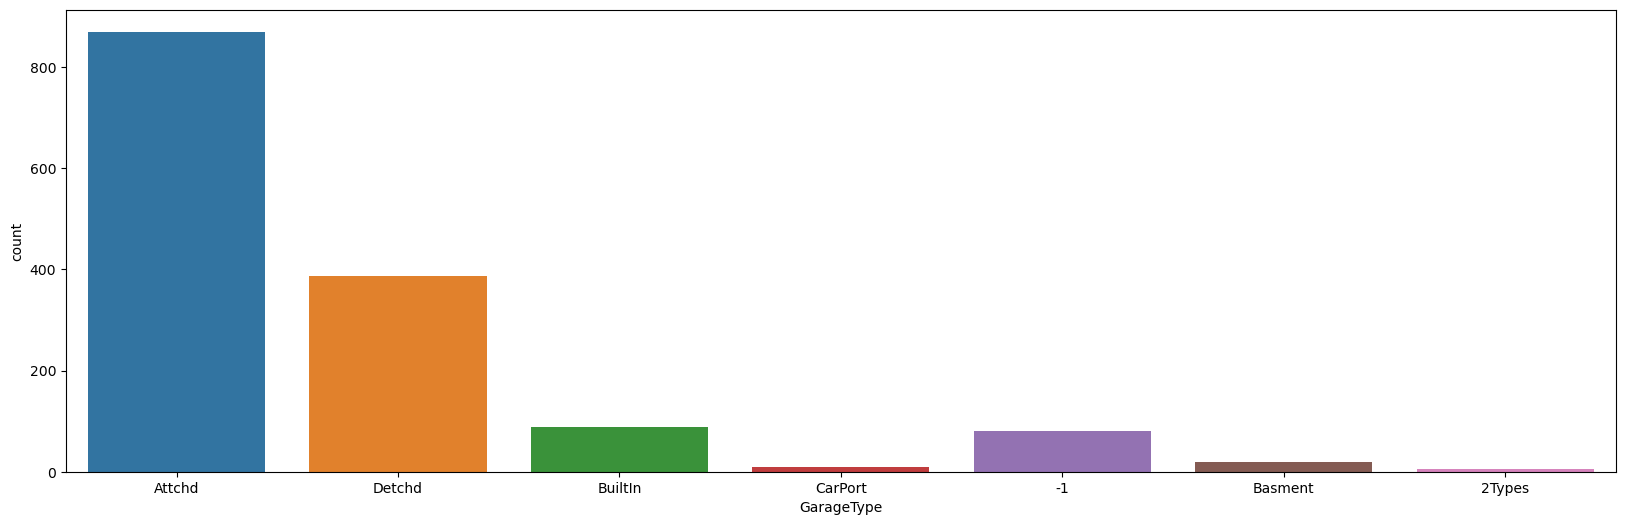

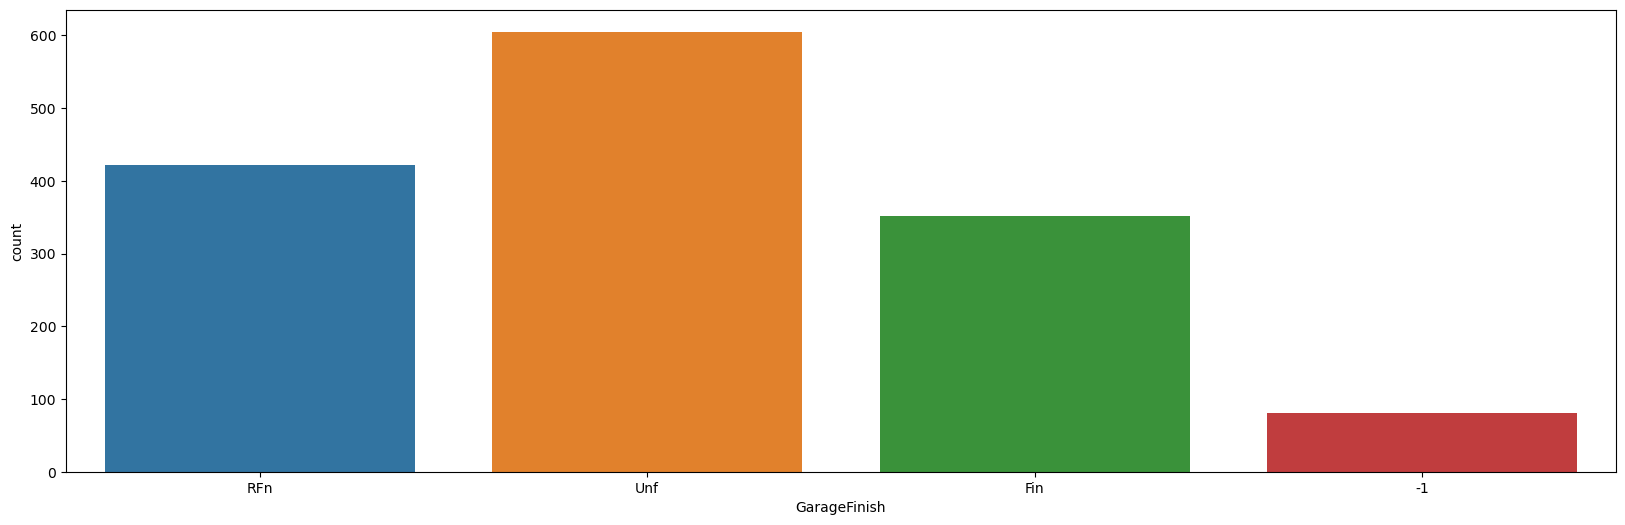

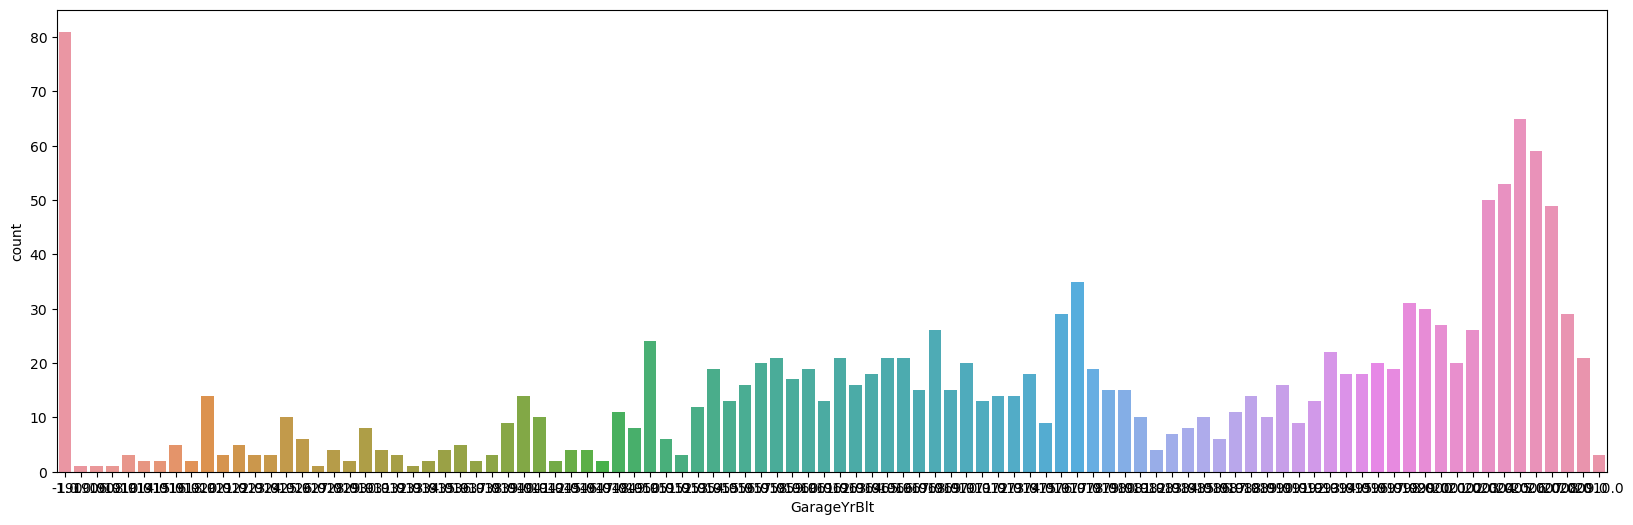

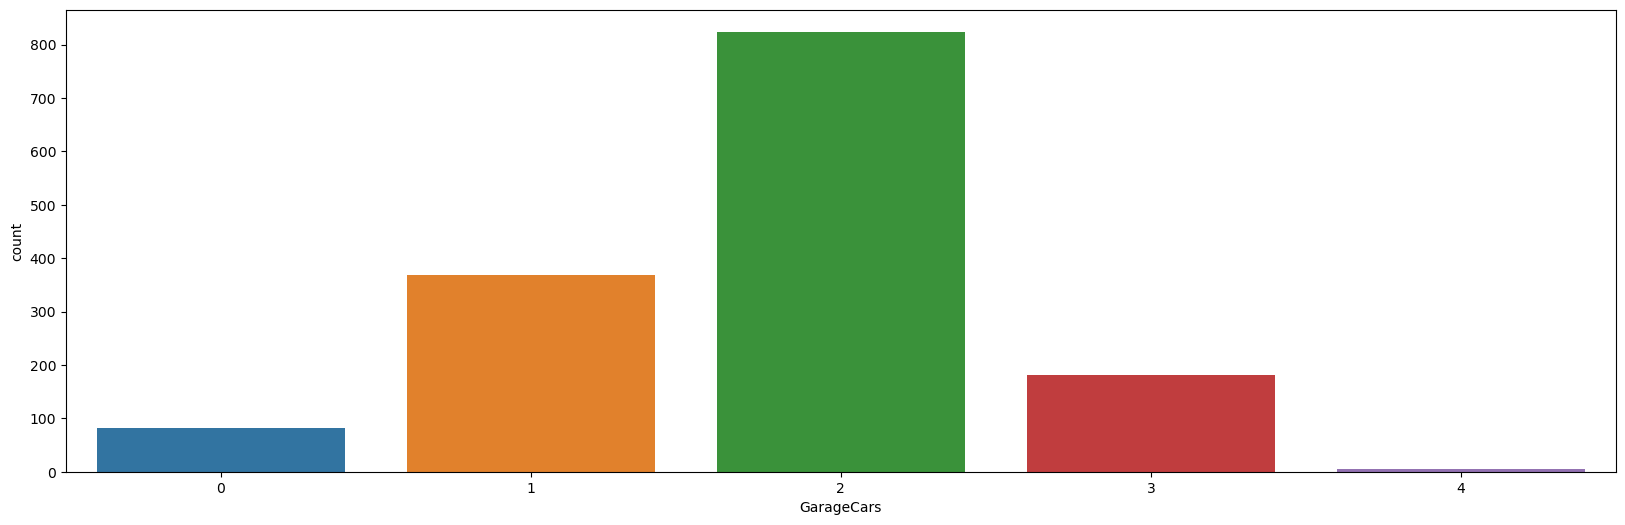

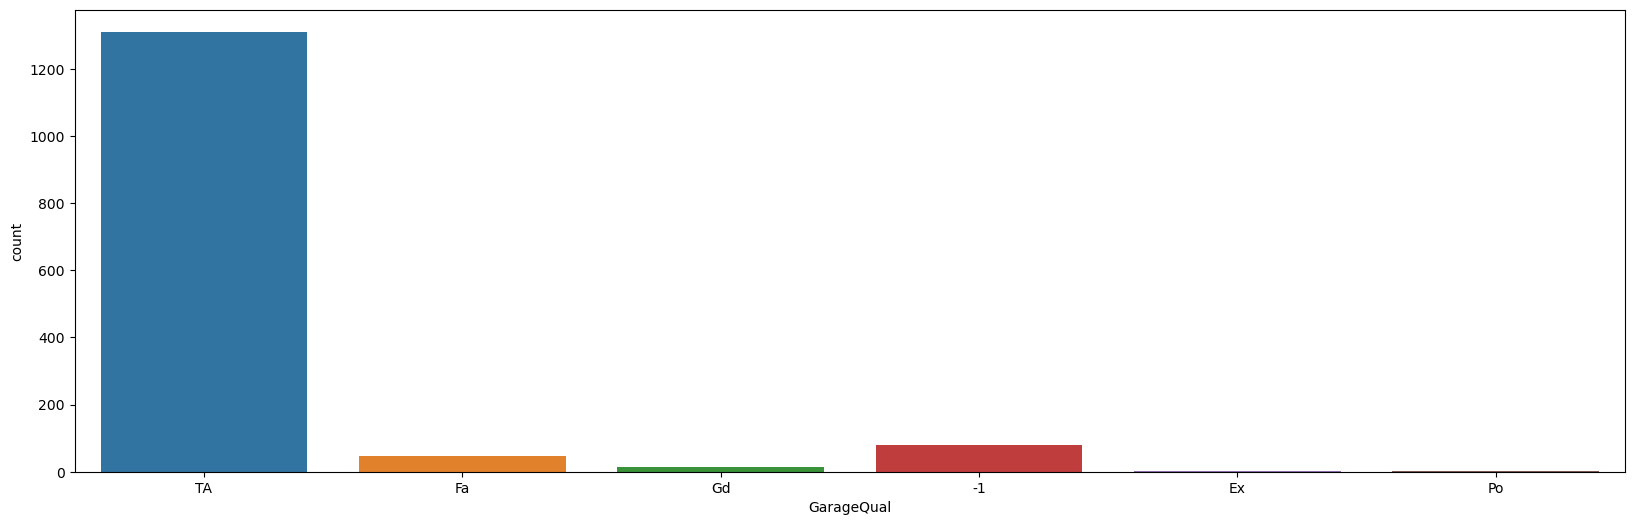

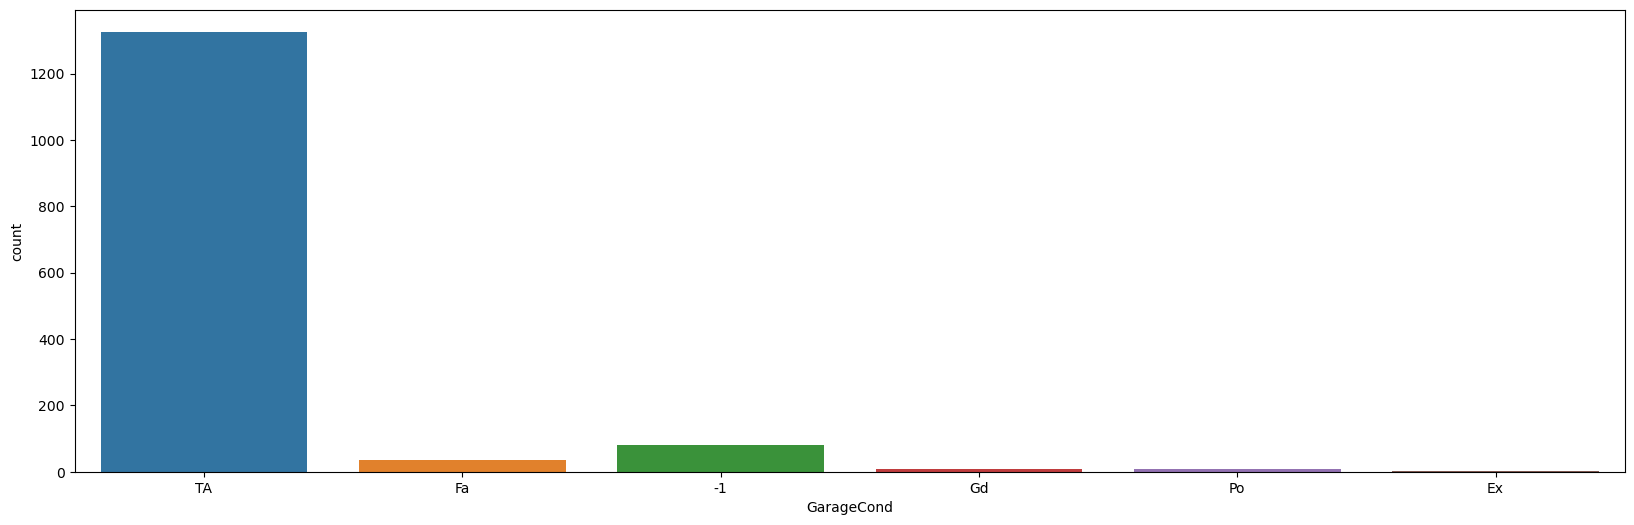

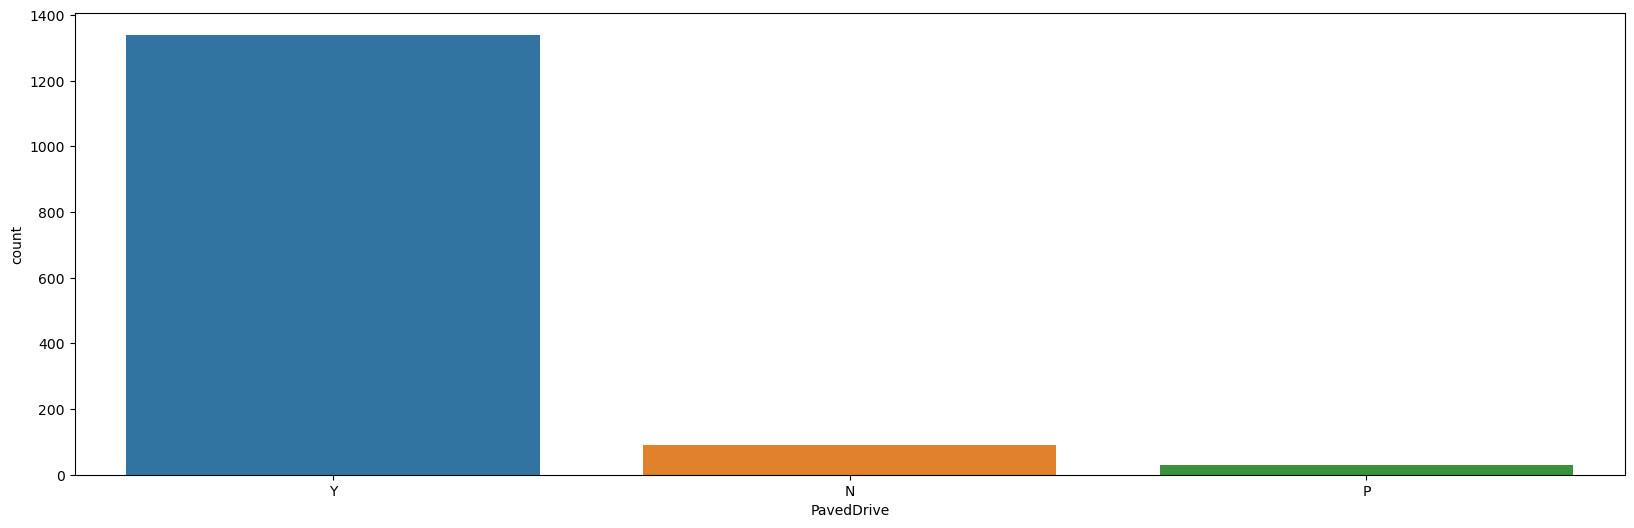

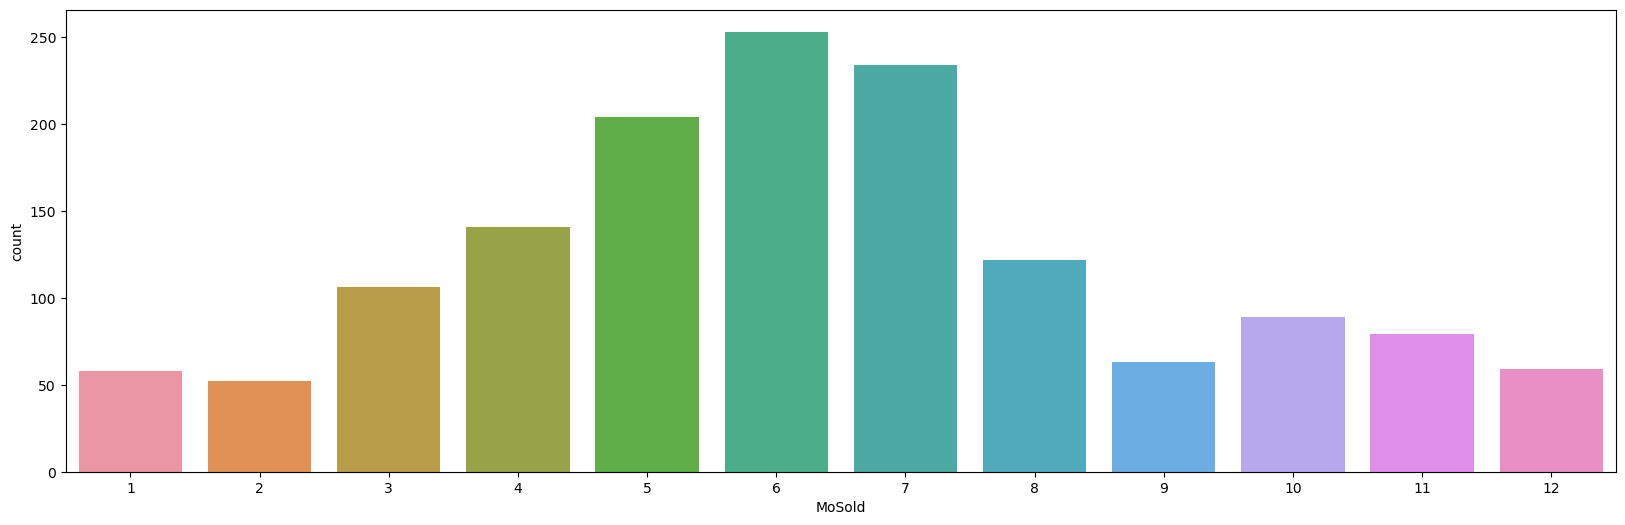

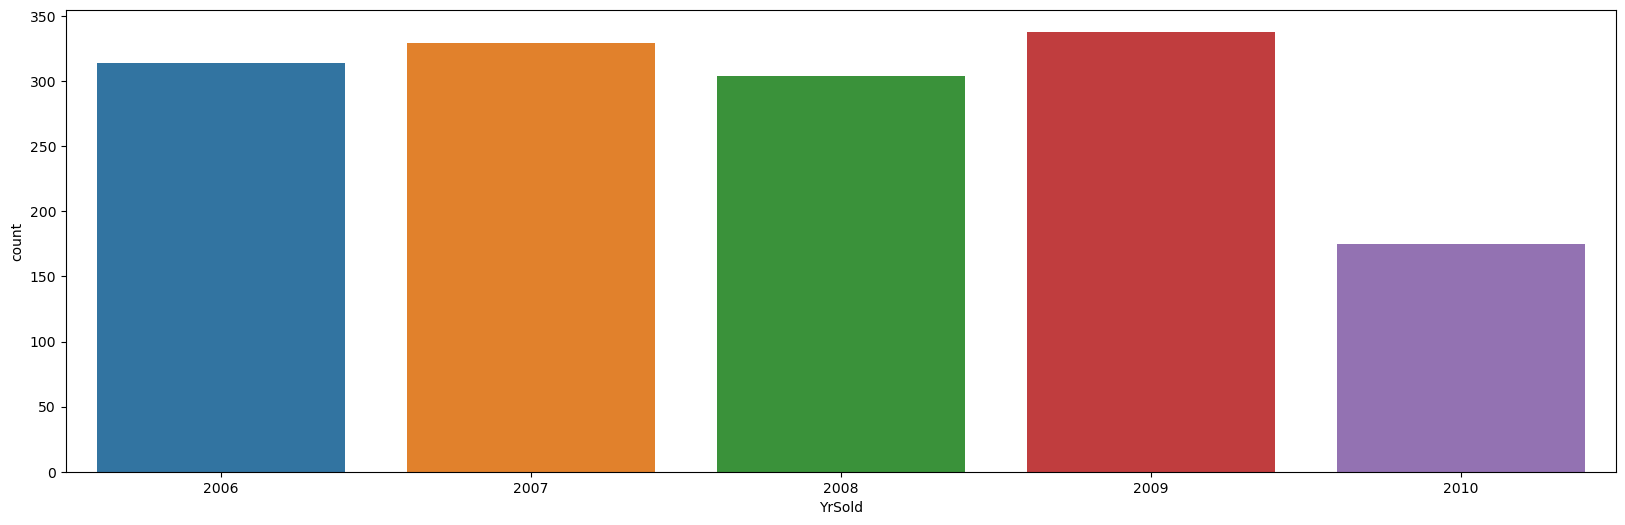

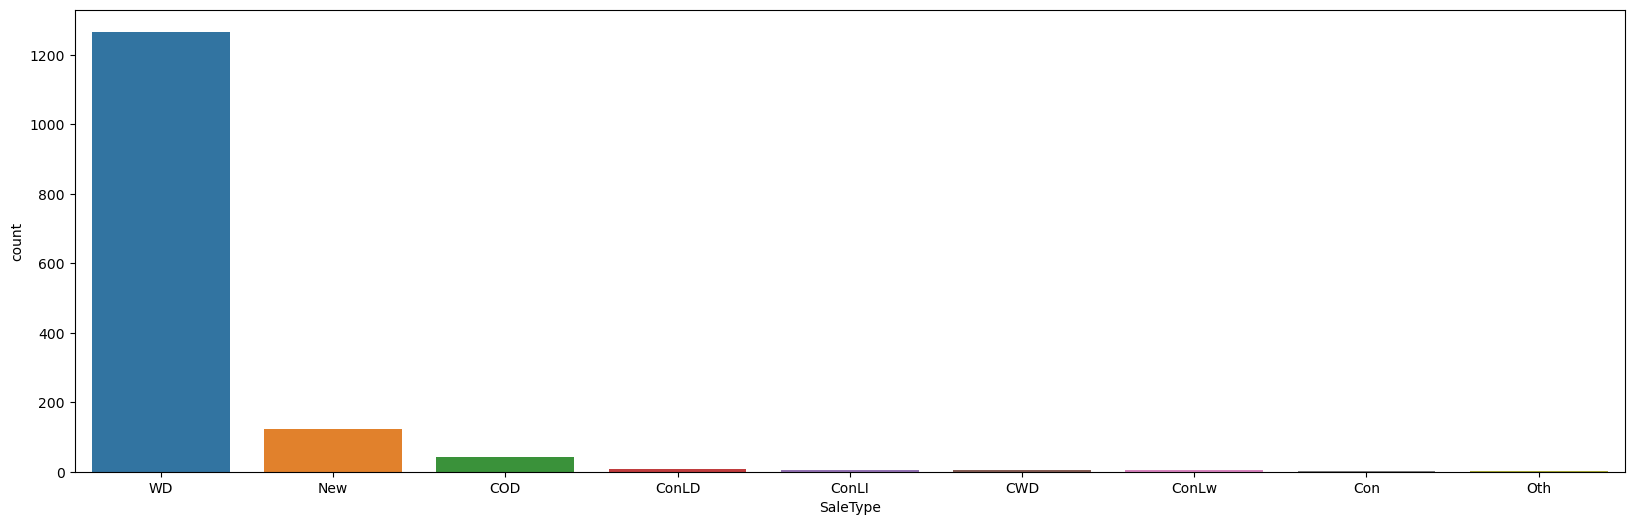

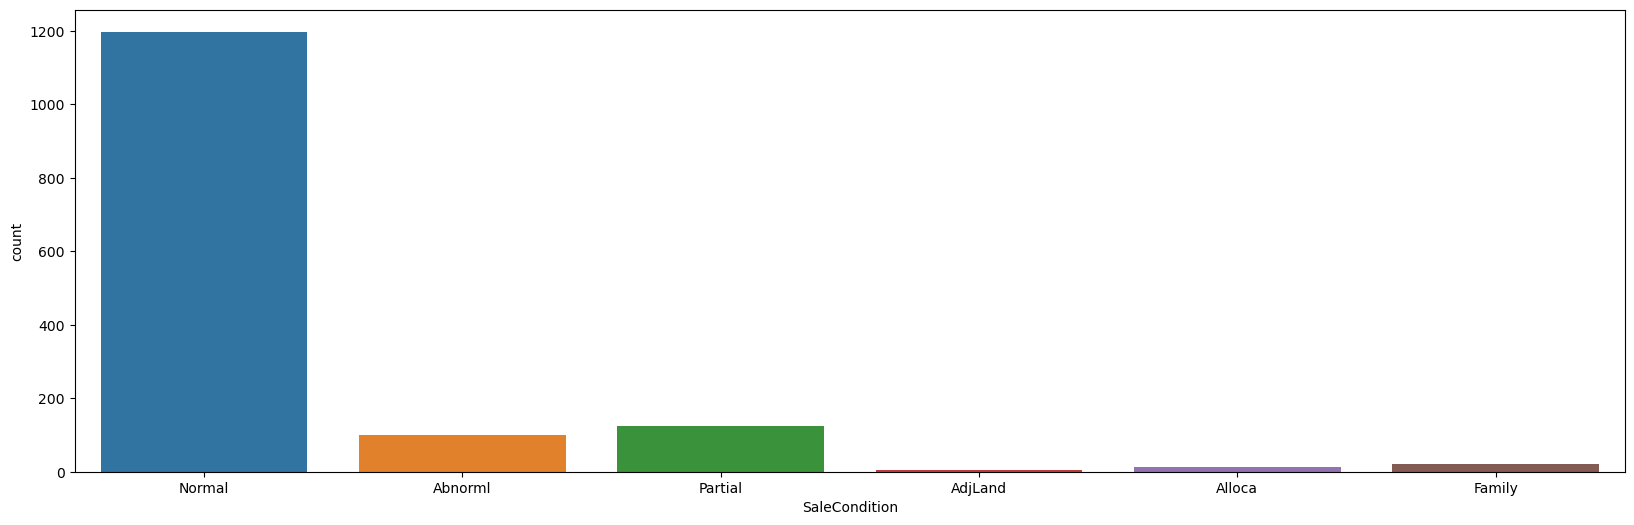

In [11]:
for i in cat_cols:
    # Set the figure size
    plt.figure(figsize=(20, 6))
    sns.countplot(x=df_price[i])
    plt.show()

#### Bivariate Analysis

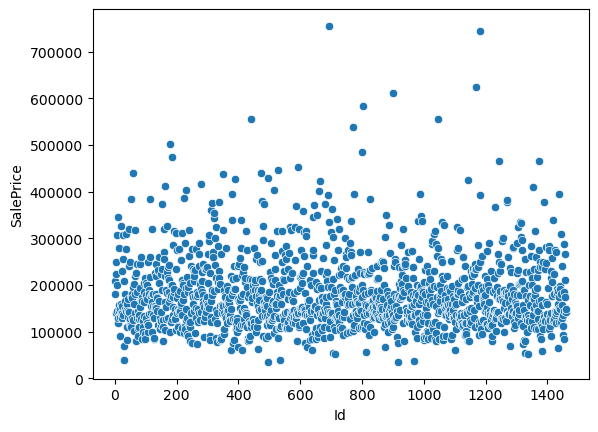

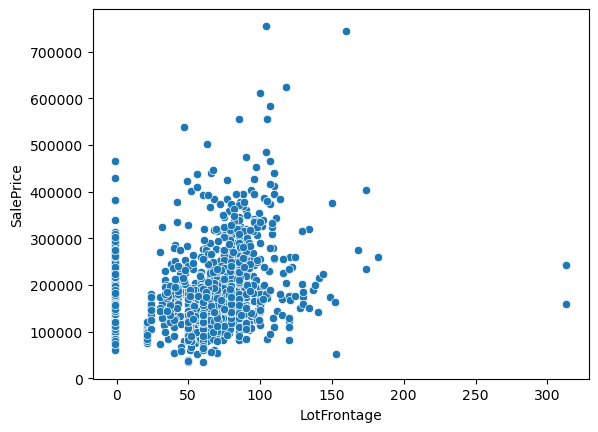

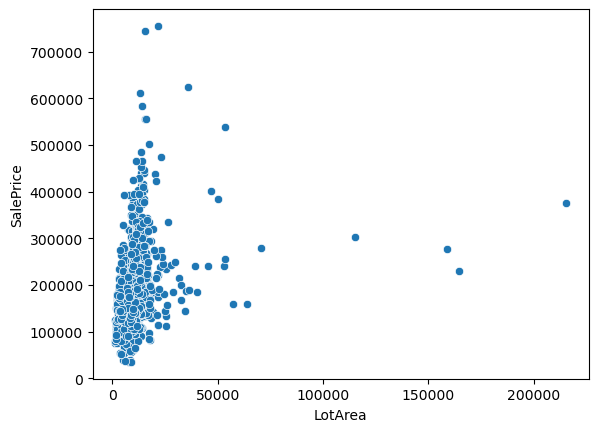

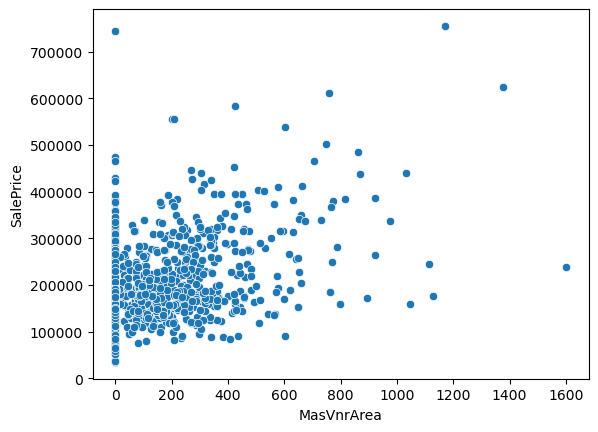

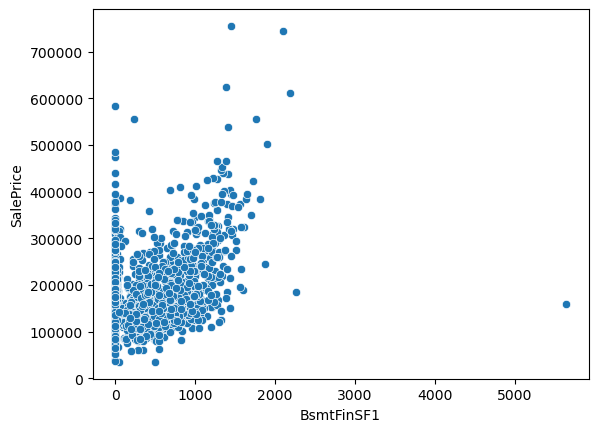

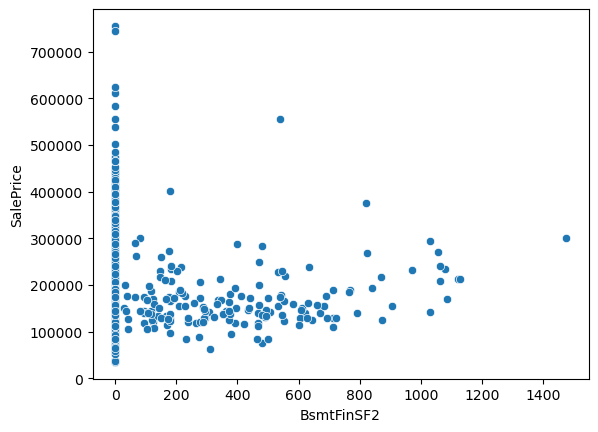

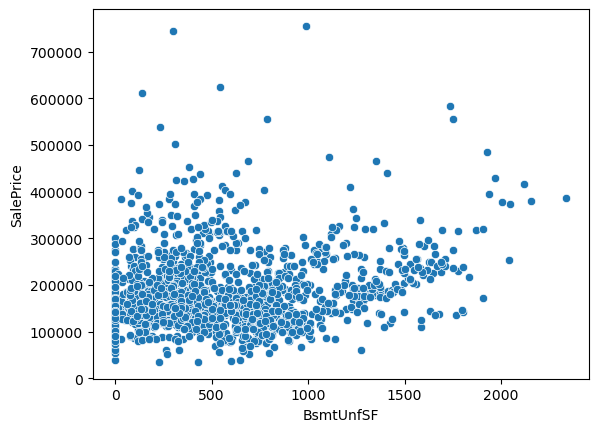

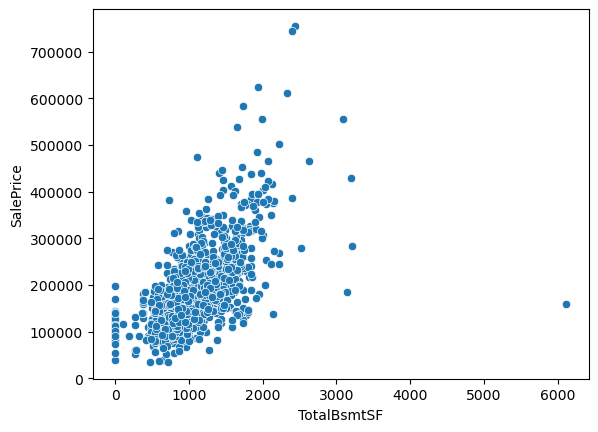

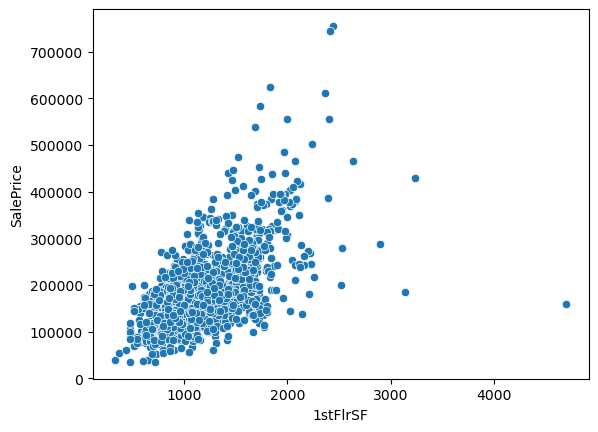

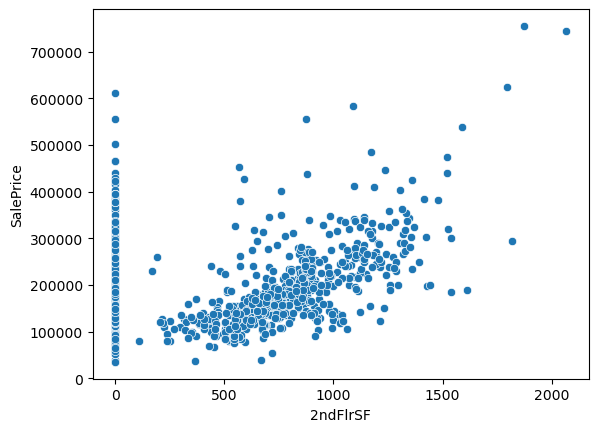

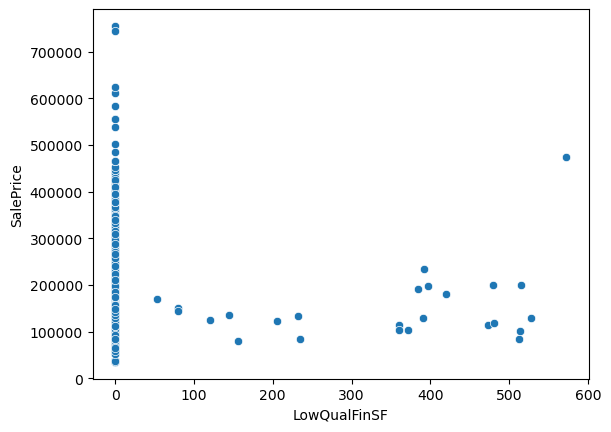

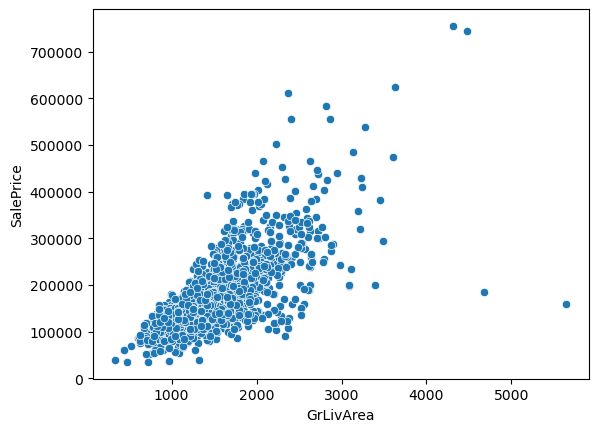

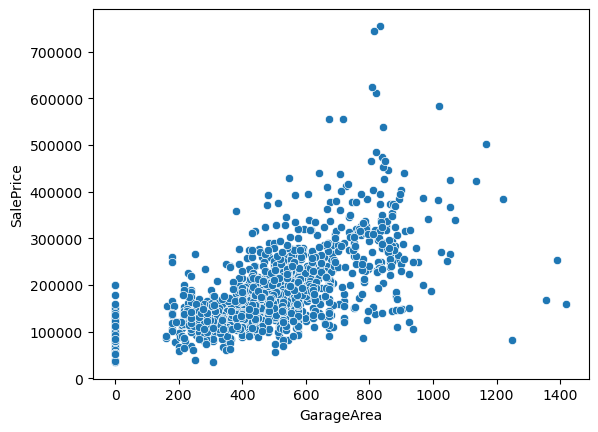

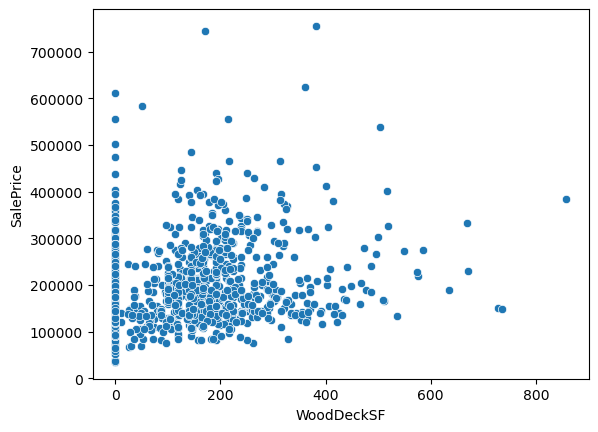

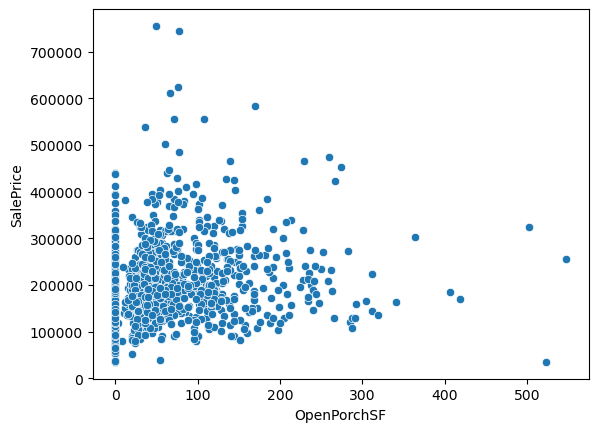

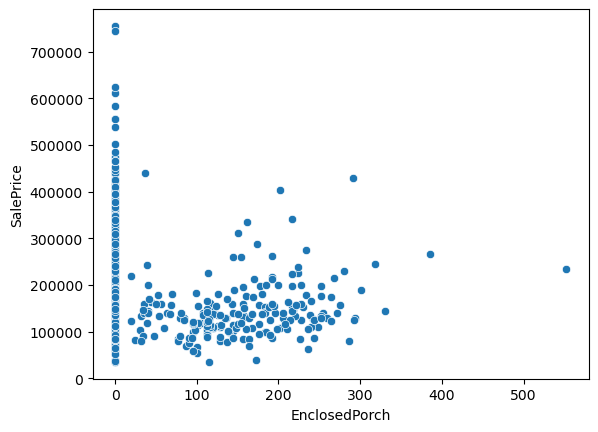

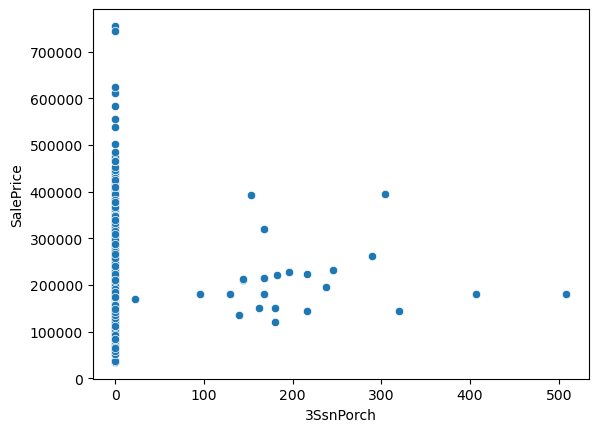

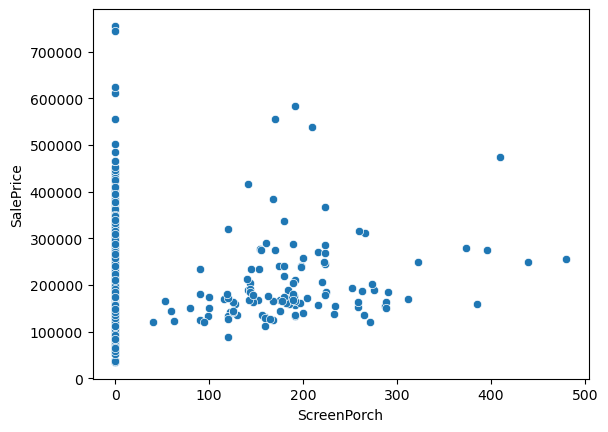

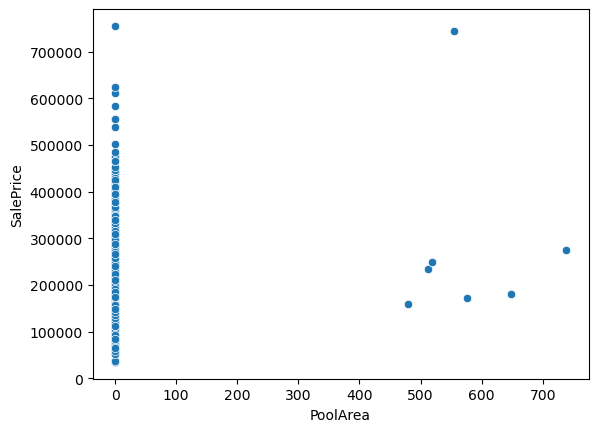

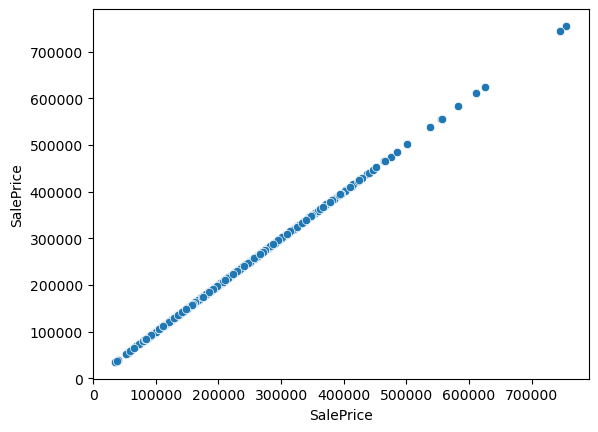

In [12]:
for i in num_cols:
    sns.scatterplot(x=df_price[i],y=df_price["SalePrice"])
    plt.show()

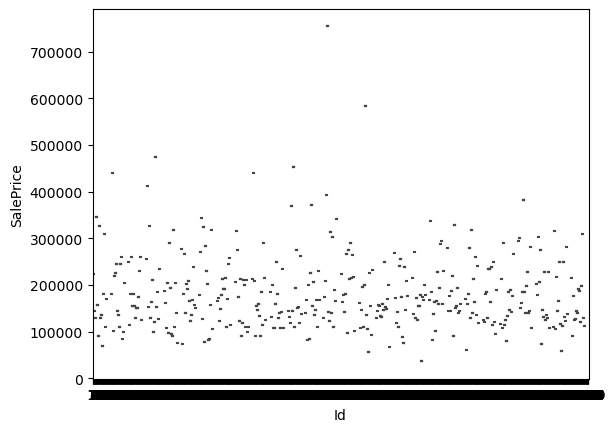

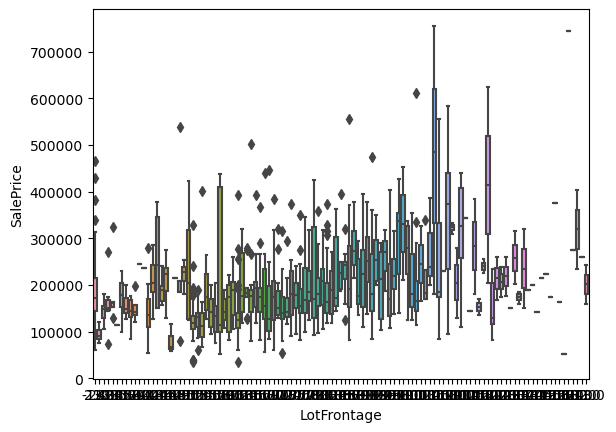

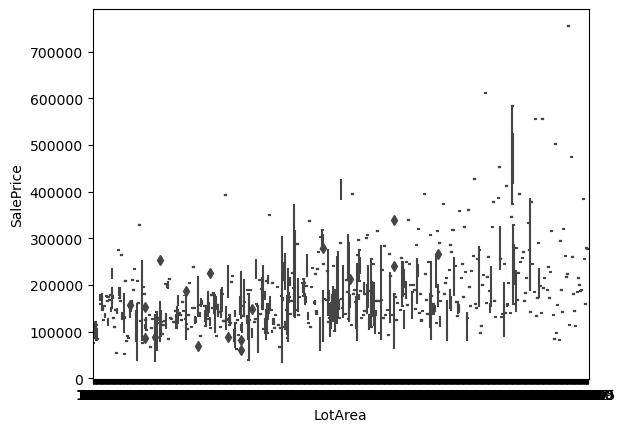

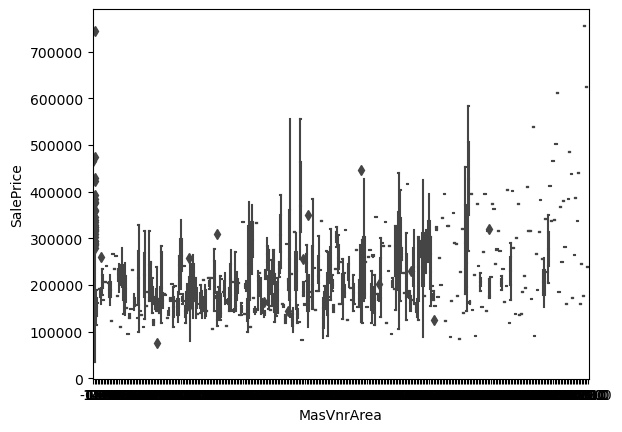

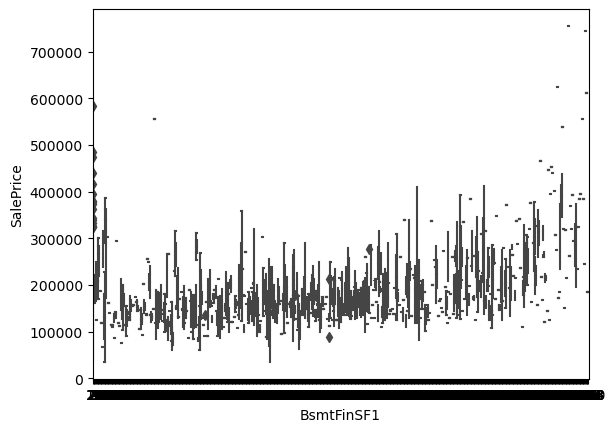

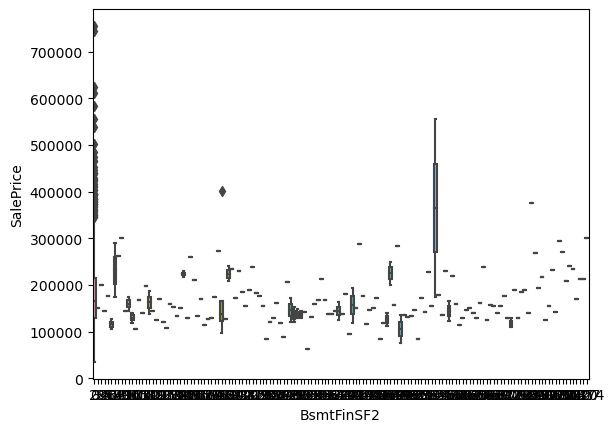

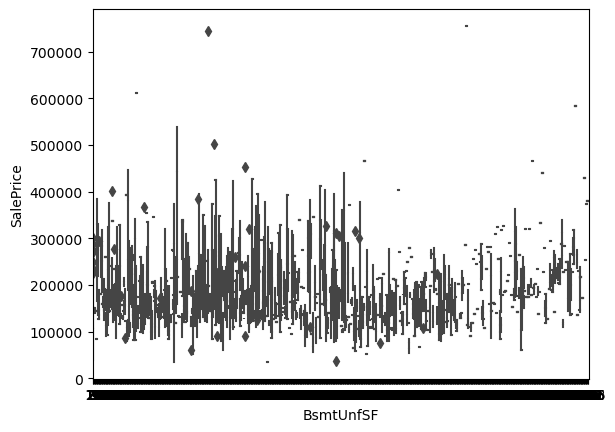

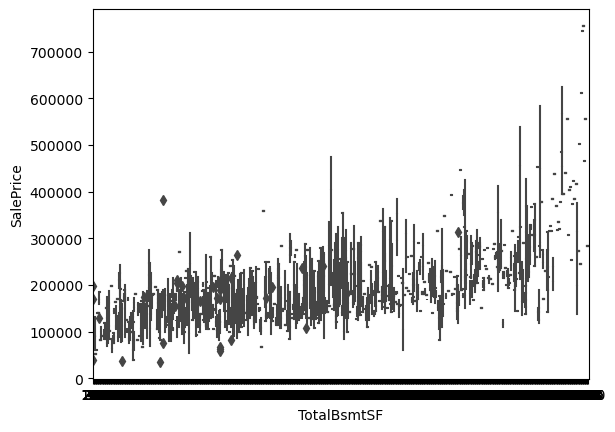

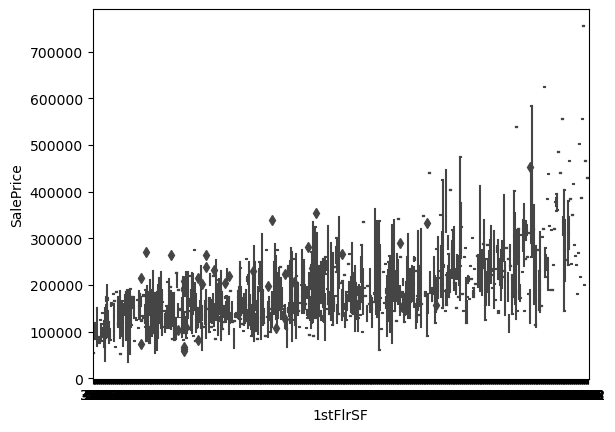

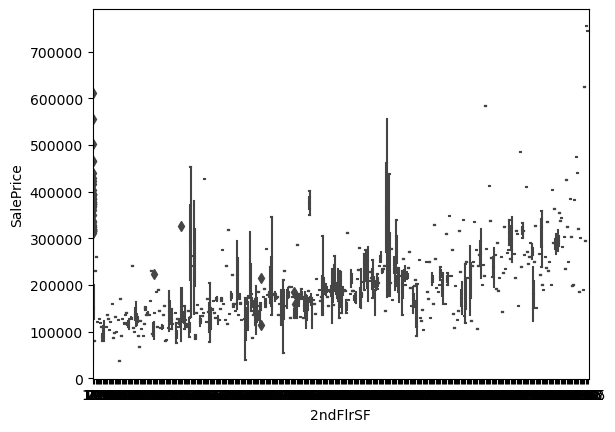

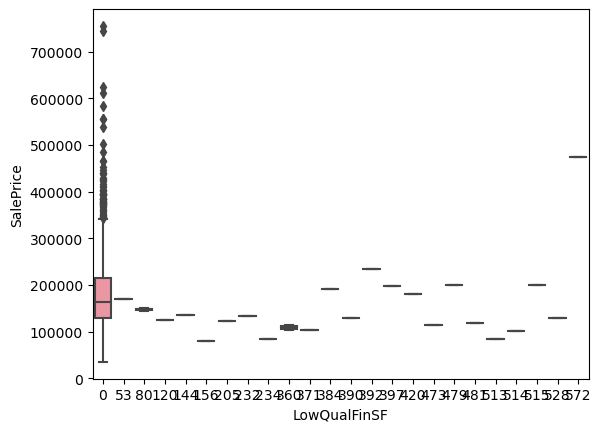

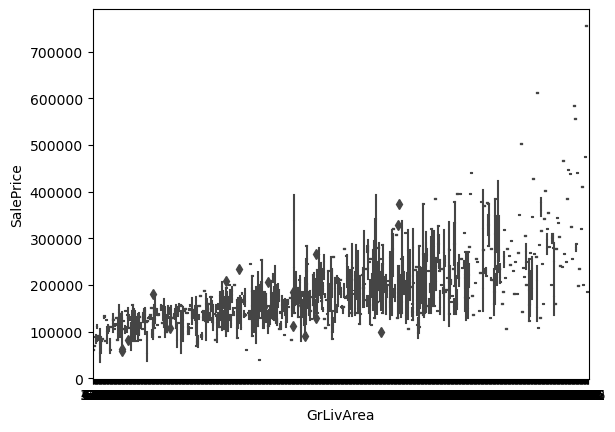

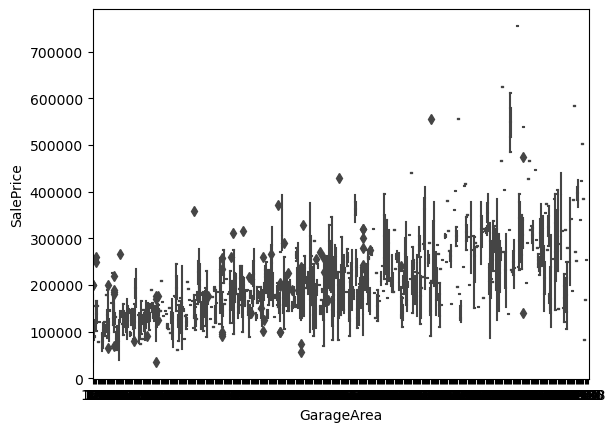

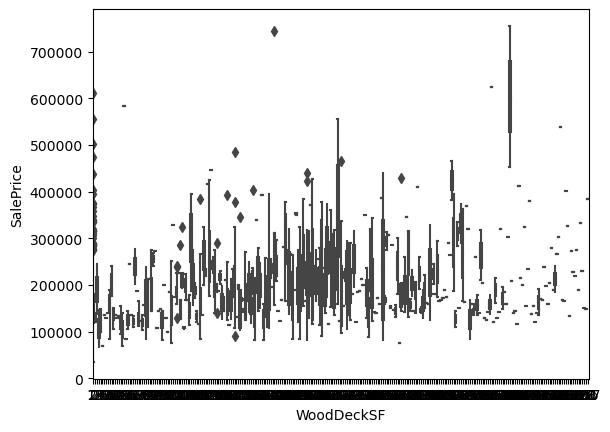

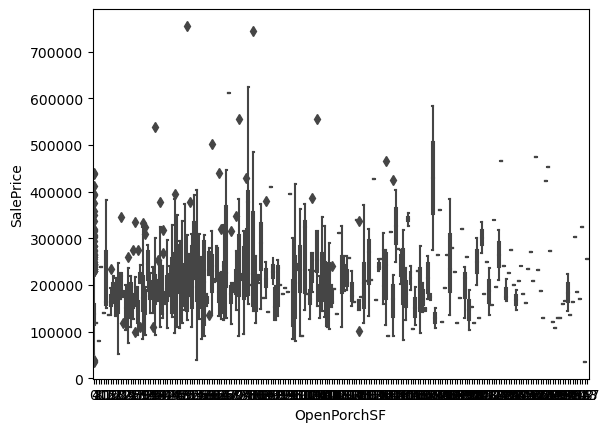

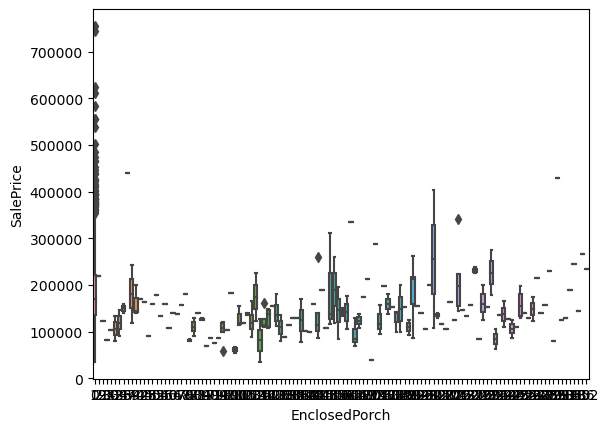

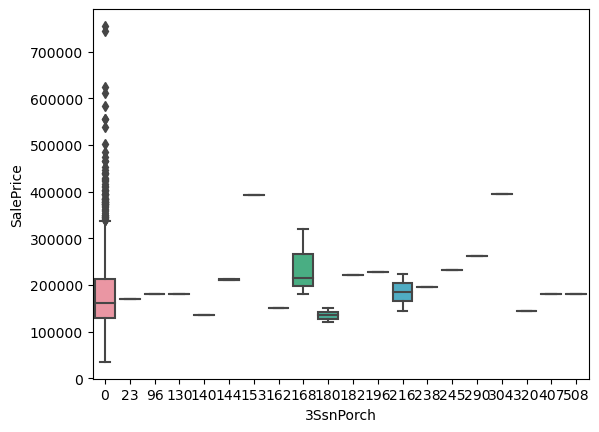

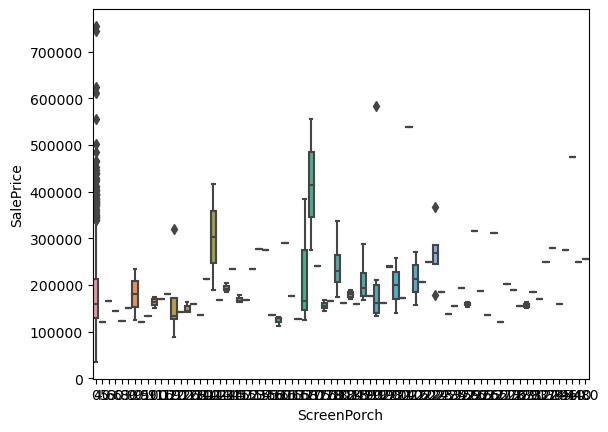

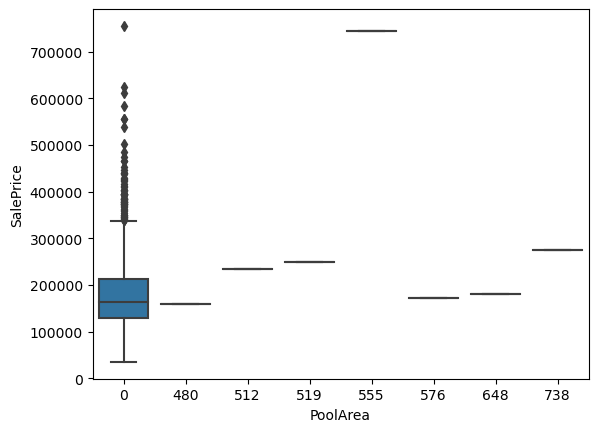

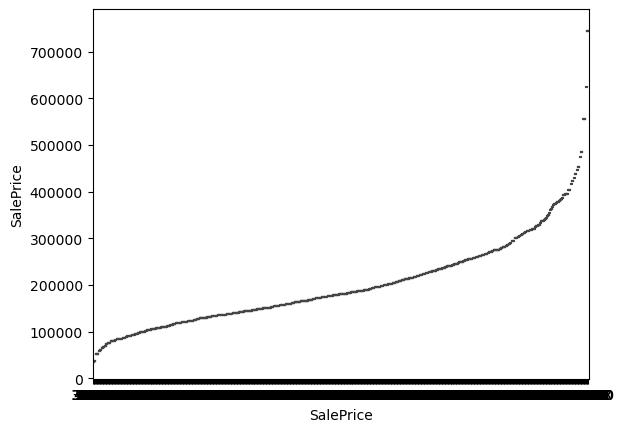

In [13]:
for i in num_cols:
    sns.boxplot(x=df_price[i],y=df_price["SalePrice"])
    plt.show()

### Handling Outliers

In [55]:
for j in num_cols:
    outliers = []
    def detect_outliers_iqr(data):
        data = sorted(data)
        q1 = np.percentile(data, 25)
        q3 = np.percentile(data, 75)
        #print(q1, q3)
        IQR = q3-q1
        lwr_bound = q1-(1.5*IQR)
        upr_bound = q3+(1.5*IQR)
        # print(lwr_bound, upr_bound)
        for i in data: 
            if (i<lwr_bound or i>upr_bound):
                outliers.append(i)
            
        return outliers# Driver code
    data_outliers = detect_outliers_iqr(df_price[j])
    print("Outliers from IQR method: ", data_outliers)

    ##df_price = df_price[~df_price[j].isin(data_outliers)]


Outliers from IQR method:  []
Outliers from IQR method:  []
Outliers from IQR method:  [1596, 1680, 1680, 1680, 1680, 1680, 1680, 1680, 1680, 1869, 1890, 1890, 1920, 1953, 1974, 2001, 2016, 16059, 16158, 16226, 16285, 16560, 16635, 16647, 16770, 16905, 17043, 17104, 17140, 17217, 17400]
Outliers from IQR method:  [328.0, 333.0, 335.0, 335.0, 336.0, 336.0, 336.0, 338.0, 340.0, 342.0, 344.0, 348.0, 350.0, 350.0, 360.0, 360.0, 360.0, 360.0, 361.0, 366.0, 376.0, 381.0, 391.0, 408.0, 410.0]
Outliers from IQR method:  []
Outliers from IQR method:  []
Outliers from IQR method:  []
Outliers from IQR method:  [1844, 1845]
Outliers from IQR method:  []
Outliers from IQR method:  []
Outliers from IQR method:  []
Outliers from IQR method:  [2514, 2520, 2526, 2574]
Outliers from IQR method:  [947]
Outliers from IQR method:  []
Outliers from IQR method:  [144, 144, 144, 146, 148, 150, 150, 150, 150, 151, 152, 152, 155, 155]
Outliers from IQR method:  []
Outliers from IQR method:  []
Outliers from IQ

In [54]:
df_price.shape

(703, 77)

## 3) Data preparation

### Dummy Variable Creation (One Hot Encoding)

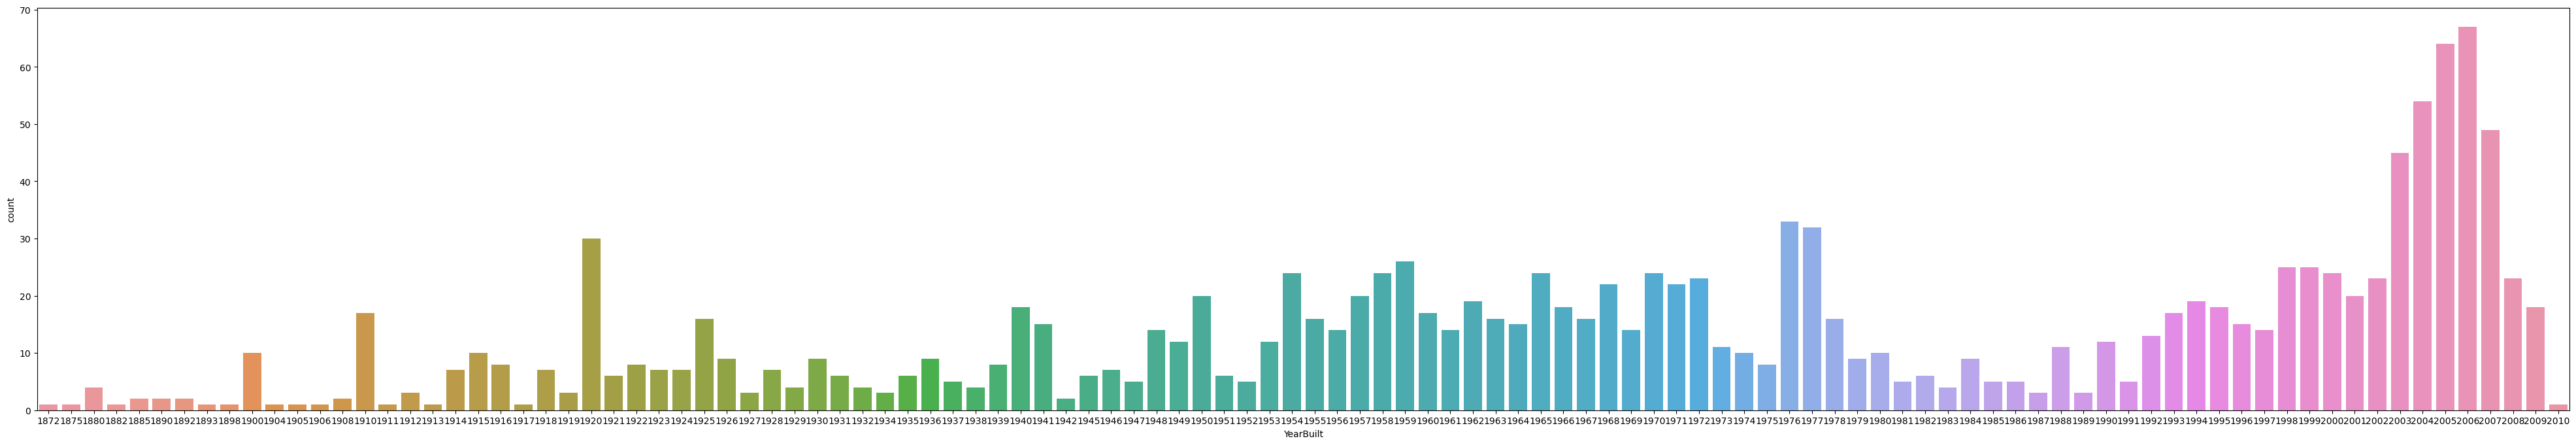

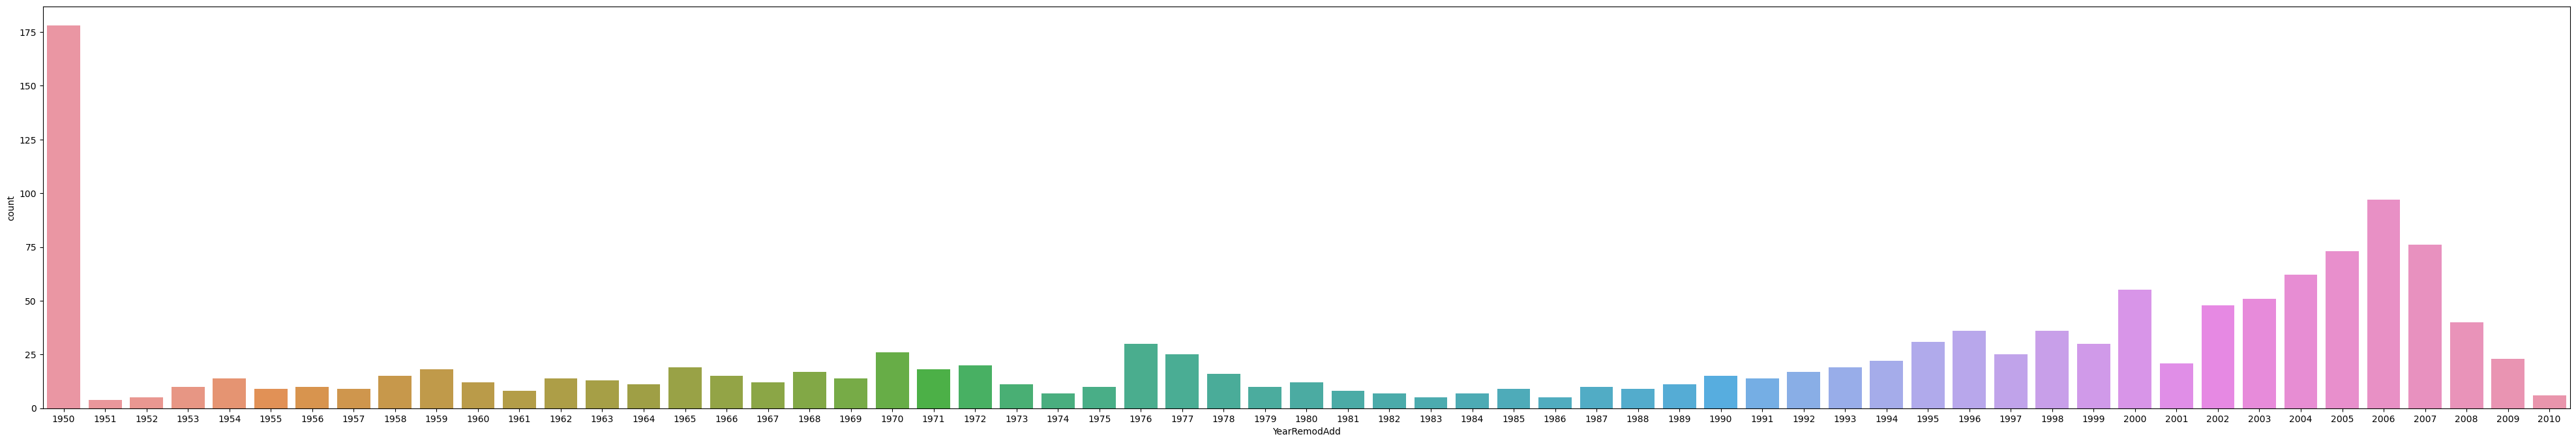

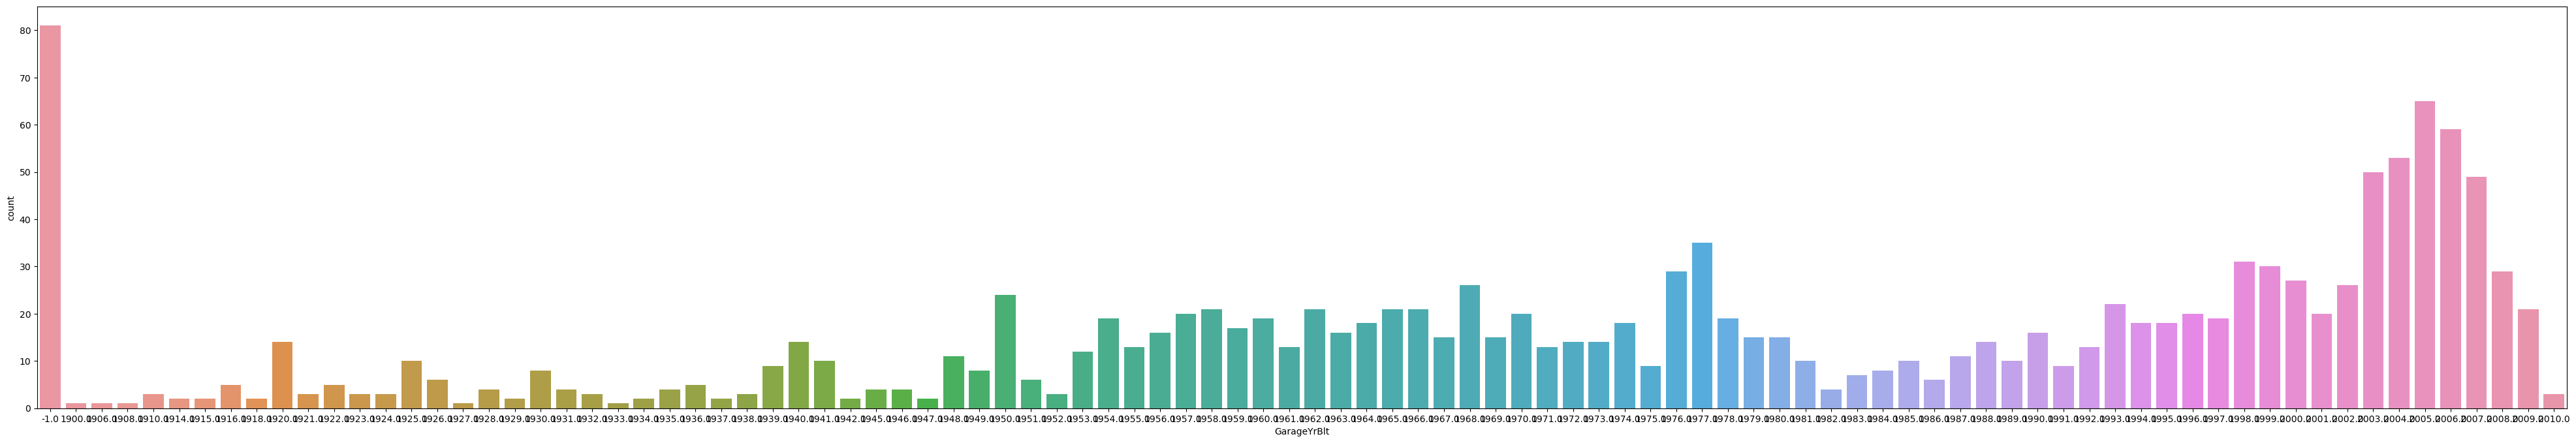

In [15]:
di_dic =   {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul',8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
df_price  = df_price.replace({"MoSold": di_dic})

############################################################################
year_cols=["YearBuilt",
"YearRemodAdd",
"GarageYrBlt"]

for i in year_cols:
    # Set the figure size
    plt.figure(figsize=(50, 8))
    sns.countplot(x=df_price[i])
    plt.show()

In [16]:
##Feature engneering for month and year columns
# Define a function to map original values to a range of years
def map_to_year_range(year):
    if 1850 <= year <= 1899:
        return '1850-1899'
    elif 1900 <= year <= 1919:
        return '1900-1919'
    elif 1920 <= year <= 1939:
        return '1920-1919'
    elif 1940 <= year <= 1959:
        return '1940-1959'
    elif 1960 <= year <= 1979:
        return '1960-1979'
    elif 1980 <= year <= 1984:
        return '1980-1984'
    elif 1985 <= year <= 1989:
        return '1985-1989'
    elif 1990 <= year <= 1994:
        return '1990-1994'
    elif 1995 <= year <= 1999:
        return '1995-1999'
    elif 1900 <= year <= 1919:
        return '1900-1919'
    elif 2000 <= year <= 2004:
        return '2000-2004'
    else:
        return '2005-2010'
    
# Apply the function to create a new 'Year_Range' column
for j in year_cols:
    df_price[j] = df_price[j].apply(map_to_year_range)

# Display the DataFrame
df_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

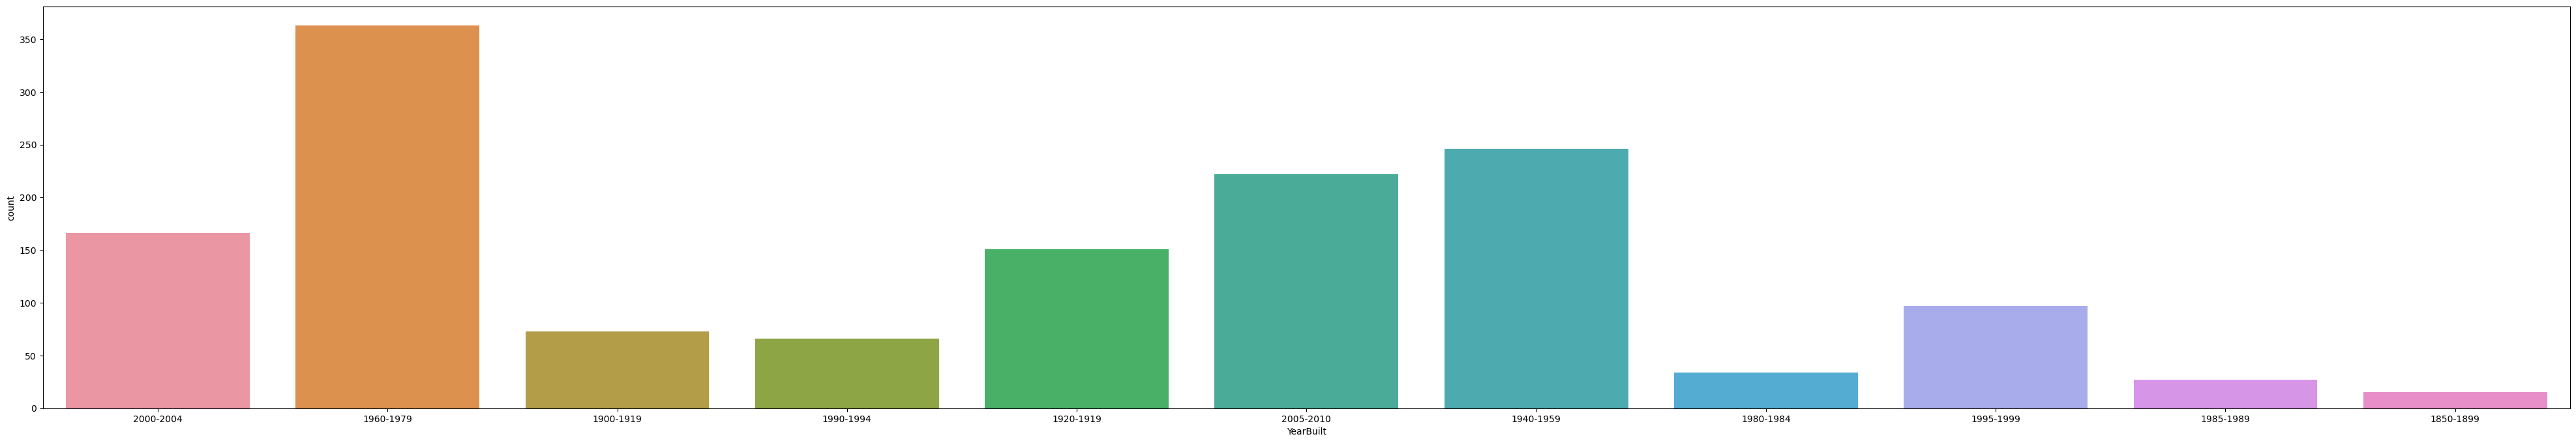

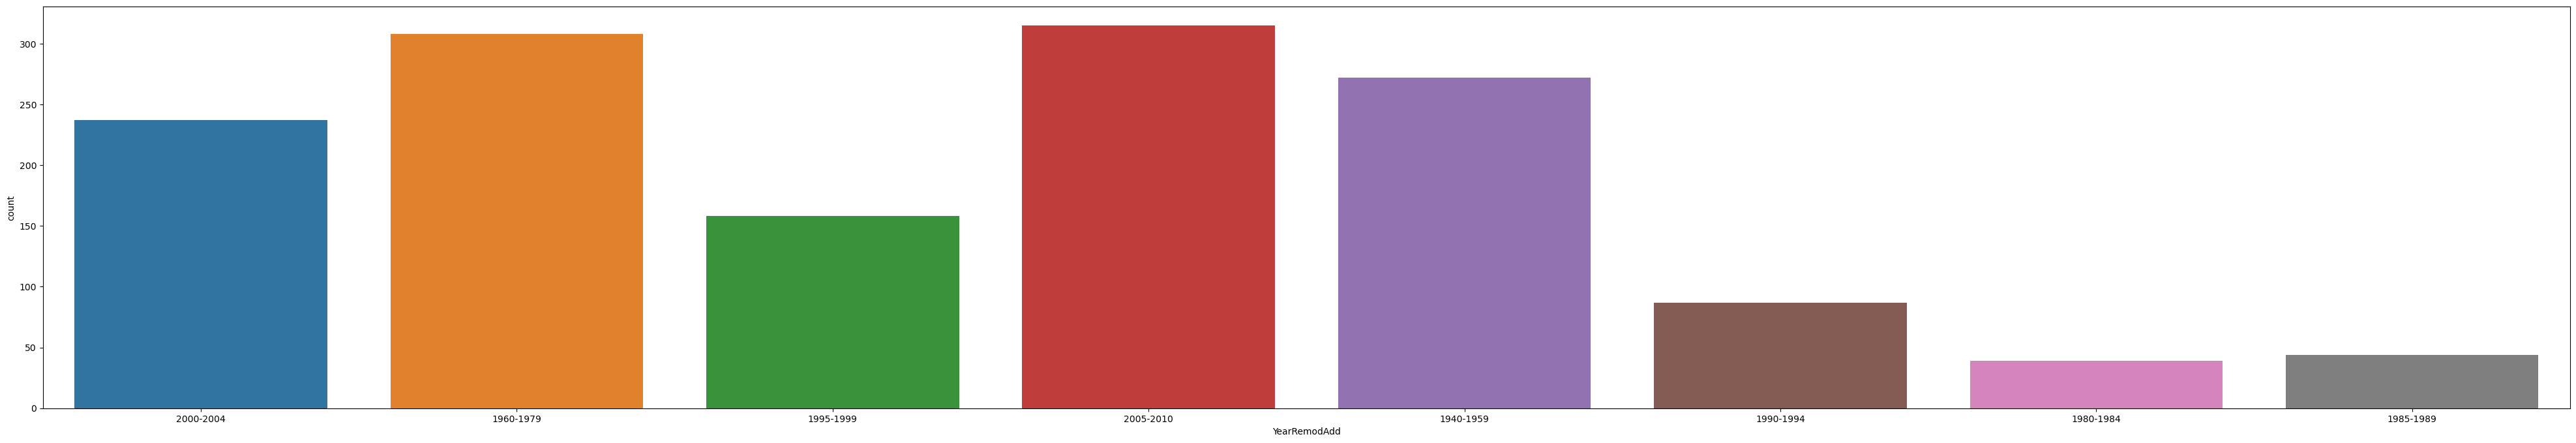

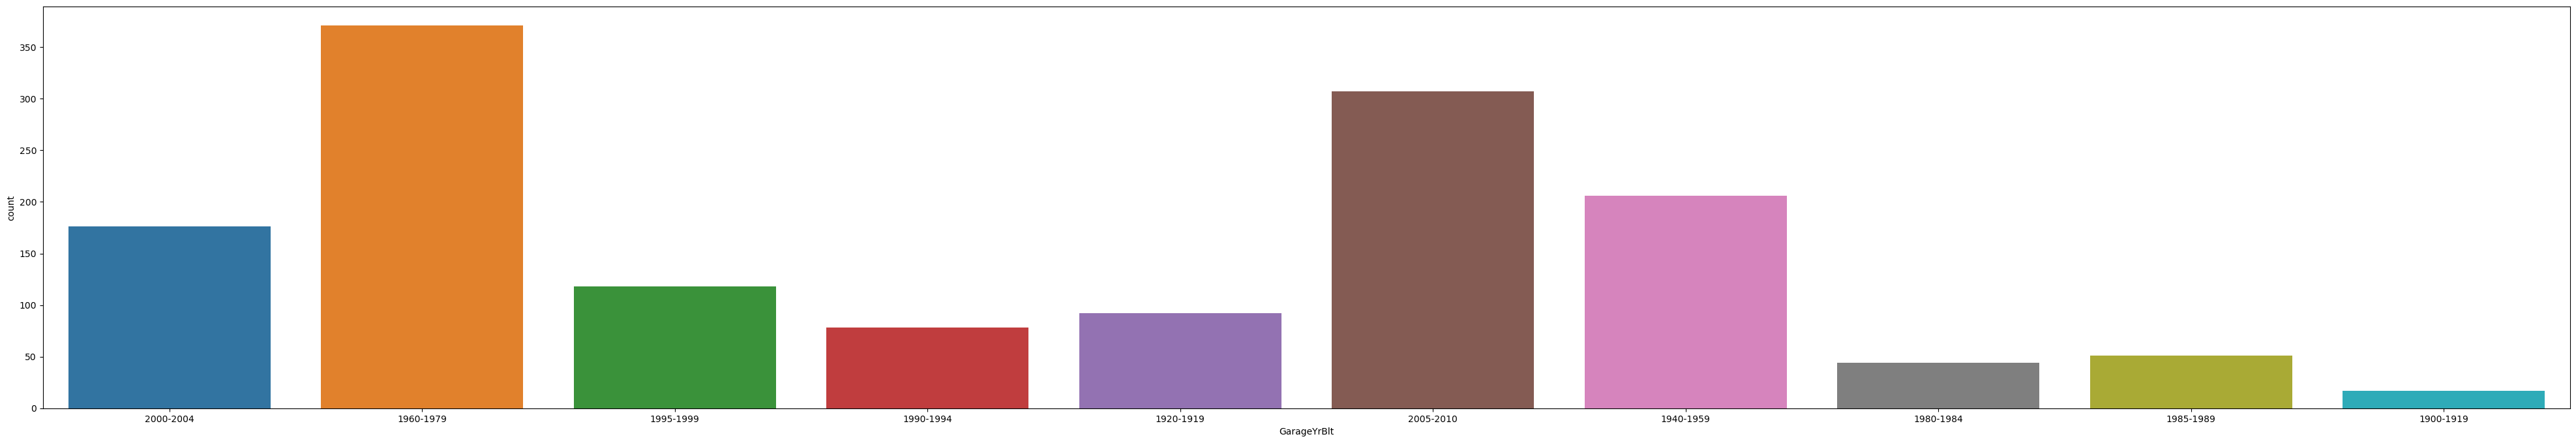

In [17]:
#df_price.to_csv("df_price_cat.csv")
for i in year_cols:
    # Set the figure size
    plt.figure(figsize=(50, 8))
    sns.countplot(x=df_price[i])
    plt.show()

In [18]:
df_price.shape

(1460, 77)

In [19]:
# creating dummy variables for categorical variables

dummy_columns = pd.get_dummies(df_price[cat_cols], columns=[col for col in df_price[cat_cols].columns],drop_first=True,dtype=int)
df_price_encod = pd.concat([df_price[num_cols], dummy_columns], axis=1)
df_price_encod.info()

#df_price_encod.to_csv("result_df_nomiss.csv")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 342 entries, Id to SaleCondition_Partial
dtypes: float64(2), int32(322), int64(18)
memory usage: 2.0 MB


In [20]:
## Dropping ID column which is not relevant for the model

df_price_encod = df_price_encod.drop(['Id'], axis=1)
df_price_encod.columns

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=341)

### Train-Test Split

In [21]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df_price_encod, train_size = 0.7, test_size = 0.3, random_state = 100)

In [22]:
df_train.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
210,67.0,5604,0.0,468,0,396,864,864,0,0,...,0,0,0,0,1,0,0,0,1,0
318,90.0,9900,256.0,987,0,360,1347,1372,1274,0,...,0,0,0,0,1,0,0,0,1,0
239,52.0,8741,0.0,94,0,641,735,798,689,0,...,0,0,0,0,1,0,0,0,1,0
986,59.0,5310,0.0,0,0,485,485,1001,634,0,...,0,0,0,0,1,0,0,0,1,0
1416,60.0,11340,0.0,0,0,777,777,1246,1044,0,...,0,0,0,0,1,0,0,0,1,0


### Scaling for numerical columns

In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [24]:
num_vars = [
"LotFrontage",
"LotArea",
"MasVnrArea",
"BsmtFinSF1",
"BsmtFinSF2",
"BsmtUnfSF",
"TotalBsmtSF",
"1stFlrSF",
"2ndFlrSF",
"LowQualFinSF",
"GrLivArea",
"GarageArea",
"WoodDeckSF",
"OpenPorchSF",
"EnclosedPorch",
"3SsnPorch",
"ScreenPorch",
"PoolArea",
"SalePrice"          
]
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [25]:
df_train.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
210,0.216561,0.019306,0.000625,0.082920,0.0,0.169521,0.141408,0.113889,0.000000,0.0,...,0,0,0,0,1,0,0,0,1,0
318,0.289809,0.039403,0.160525,0.174876,0.0,0.154110,0.220458,0.231481,0.616949,0.0,...,0,0,0,0,1,0,0,0,1,0
239,0.168790,0.033981,0.000625,0.016655,0.0,0.274401,0.120295,0.098611,0.333656,0.0,...,0,0,0,0,1,0,0,0,1,0
986,0.191083,0.017931,0.000625,0.000000,0.0,0.207620,0.079378,0.145602,0.307022,0.0,...,0,0,0,0,1,0,0,0,1,0
1416,0.194268,0.046139,0.000625,0.000000,0.0,0.332620,0.127169,0.202315,0.505569,0.0,...,0,0,0,0,1,0,0,0,1,0


In [26]:
df_train.describe()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,...,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000
mean,0.186017,0.042143,0.065887,0.079337,0.033980,0.241388,0.173773,0.184341,0.165943,0.011649,...,0.002938,0.003918,0.078355,0.002938,0.870715,0.002938,0.007835,0.013712,0.825661,0.078355
std,0.110488,0.048226,0.117016,0.082377,0.115907,0.192066,0.075145,0.092132,0.210799,0.093608,...,0.054153,0.062500,0.268860,0.054153,0.335680,0.054153,0.088214,0.116350,0.379587,0.268860
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.140127,0.027923,0.000625,0.000000,0.000000,0.092466,0.129787,0.116435,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.194268,0.037531,0.000625,0.069454,0.000000,0.197774,0.162357,0.165278,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.251592,0.046943,0.099313,0.126152,0.000000,0.345034,0.215057,0.243056,0.352058,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Dividing into X and Y sets for the model building

In [27]:
y_train = df_train.pop('SalePrice')
X_train = df_train

In [28]:
X_train.columns=X_train.columns.astype(str)
X_train.head()


,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
210,0.216561,0.019306,0.000625,0.082920,0.0,0.169521,0.141408,0.113889,0.000000,0.0,...,0,0,0,0,1,0,0,0,1,0
318,0.289809,0.039403,0.160525,0.174876,0.0,0.154110,0.220458,0.231481,0.616949,0.0,...,0,0,0,0,1,0,0,0,1,0
239,0.168790,0.033981,0.000625,0.016655,0.0,0.274401,0.120295,0.098611,0.333656,0.0,...,0,0,0,0,1,0,0,0,1,0
986,0.191083,0.017931,0.000625,0.000000,0.0,0.207620,0.079378,0.145602,0.307022,0.0,...,0,0,0,0,1,0,0,0,1,0
1416,0.194268,0.046139,0.000625,0.000000,0.0,0.332620,0.127169,0.202315,0.505569,0.0,...,0,0,0,0,1,0,0,0,1,0


## 4) Model Building  

### Ridge model

In [38]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.000001,0.00001,0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.05, 0.1,
                                   0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                                   2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0,
                                   20, 50, 100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [39]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 20}


In [40]:
#Fitting Ridge model for alpha = 10 and printing coefficients which have been penalised
alpha = 20
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 3.15986451e-03  1.17320990e-02  1.53062927e-02  1.16336656e-02
  7.74072505e-03  1.65979281e-02  1.89595740e-02  2.80767936e-02
  2.65896884e-02 -7.64426593e-04  3.37828162e-02  1.73911663e-02
  1.43369313e-02  6.06451824e-03  9.88216771e-04  7.51992285e-03
  6.25194904e-03  4.15920435e-03 -1.16487072e-02 -9.15658095e-04
  1.24554730e-03  2.52721614e-03 -2.31851165e-03  5.21885652e-03
  1.85302909e-03 -3.56432161e-03 -3.46627395e-03 -3.30826441e-03
 -1.08182534e-02 -8.34789081e-03 -4.37535950e-03 -3.03448262e-03
  6.20044148e-03  3.39281285e-03  8.12821326e-03 -2.03103729e-03
  1.88034942e-03  3.20406378e-03 -2.19857923e-03 -1.42854017e-03
  3.97986014e-03  8.33628438e-03  8.60671116e-03 -1.55211168e-03
  1.09099902e-02 -9.98070161e-03 -1.74520222e-03 -2.83124260e-03
  7.21948471e-03  2.99576852e-03 -5.91774275e-04 -8.94881686e-04
  7.37041107e-04  5.48093683e-03 -5.57712295e-03  2.01062140e-02
 -1.97614116e-02 -8.44955105e-03 -9.01227040e-03 -7.29721009e-03
 -1.07866789e-02 -7.09629

In [41]:
df_test[num_vars] = scaler.transform(df_test[num_vars])

KeyError: "['SalePrice'] not in index"

In [ ]:
y_test = df_test.pop('SalePrice')
X_test = df_test

In [42]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)



0.8917359311304243
0.852868044284437
1.3321924483567065
0.7997830062493754
0.0013047918201338946
0.0018259885987428662


### Lasso

In [43]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.05, 0.1,
                                   0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                                   2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0,
                                   20, 50, 100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [44]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0001}


In [45]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised

alpha =0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0001)

In [46]:
lasso.coef_

array([-0.00000000e+00,  5.69366955e-02,  3.32262755e-03,  0.00000000e+00,
        1.36706343e-03,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -1.72012902e-02,  3.38775054e-01,  0.00000000e+00,
        9.75444155e-03,  0.00000000e+00, -0.00000000e+00,  2.06151470e-02,
        9.37694761e-03, -0.00000000e+00, -7.16856599e-03,  0.00000000e+00,
        0.00000000e+00,  1.92466516e-03, -0.00000000e+00,  0.00000000e+00,
       -1.14774394e-03, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -5.00249165e-03, -0.00000000e+00, -0.00000000e+00, -2.70089689e-03,
        0.00000000e+00,  0.00000000e+00,  7.43150837e-03,  0.00000000e+00,
        0.00000000e+00,  1.58527463e-03, -6.10932800e-03,  0.00000000e+00,
        3.45423623e-03,  1.10483314e-02,  1.27450882e-02, -0.00000000e+00,
        1.35527883e-02, -7.29316742e-03, -0.00000000e+00,  0.00000000e+00,
        3.52435482e-03,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

In [47]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9233710701318594
0.8560670437045478
0.942921162689465
0.782393817335497
0.0009235270937213173
0.0017862872541906324


In [48]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)']
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric'] )
lr_metric
rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.891736,0.923371
1,R2 Score (Test),0.852868,0.856067
2,RSS (Train),1.332192,0.942921
3,RSS (Test),0.799783,0.782394
4,MSE (Train),0.036122,0.030390
5,MSE (Test),0.042732,0.042264


In [51]:
betas = pd.DataFrame(index=X_train.columns)
betas.rows = X_train.columns
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

pd.set_option('display.max_rows', None)
betas.head(500)

,Ridge,Lasso
LotFrontage,0.003160,-0.000000
LotArea,0.011732,0.056937
MasVnrArea,0.015306,0.003323
BsmtFinSF1,0.011634,0.000000
BsmtFinSF2,0.007741,0.001367
BsmtUnfSF,0.016598,0.000000
TotalBsmtSF,0.018960,0.000000
1stFlrSF,0.028077,0.000000
2ndFlrSF,0.026590,0.000000
LowQualFinSF,-0.000764,-0.017201


In [52]:
sorted_df = betas.sort_values(by='Lasso')
sorted_df

,Ridge,Lasso
Condition2_PosN,-0.013559,-0.324099
Fireplaces_3,-0.007287,-0.057941
KitchenQual_TA,-0.022111,-0.023342
TotRmsAbvGrd_11,-0.009001,-0.023126
KitchenQual_Gd,-0.019276,-0.022646
KitchenQual_Fa,-0.014382,-0.019631
Neighborhood_Edwards,-0.019761,-0.019259
BldgType_Twnhs,-0.010756,-0.017779
LowQualFinSF,-0.000764,-0.017201
BldgType_TwnhsE,-0.011164,-0.014086


## 5) Model Evaluation 

#### Variables are significant in predicting the price of a house are :
•	GrLivArea: Above grade (ground) living area square feet, 
•	OverallQual: Rating as very excellent(10) and excellent(9) for the overall material and finish of the house as very excellent and excellent, 
•	RoofMatl_WdShngl: Roof marterial as wood shingles, 
•	FullBath_3: full bathroom as 3, 
•	LotArea: Lot area in square feet, 
•	Condition2_PosN: Proximity to various condition as PosN, 
•	Fireplaces_3 : Number of fireplaces as 3, 
•	KitchenQual_TA: Kitchen Quality as TA, 
•	TotRmsAbvGrd_11: Total rooms above ground. 


#### How well those variables describe the price of a house:
Predictor variables GrLivArea, OverallQual_10, RoofMatl_WdShngl impacts housing price positively while predictor variables Condition2_PosN, Fireplaces_3, KitchenQual_TA, TotRmsAbvGrd_11 impacts housing price negatively.

#### The optimal value of lambda for ridge and lasso regression is 20 and for lasso is 0.0001 respectively 